
# Detecção de Pacientes com Potencial Diagnóstico de Depressão
# 📌 Introdução
A depressão é uma condição de saúde mental que afeta milhões de pessoas no mundo, muitas vezes sem diagnóstico ou tratamento adequado. Este projeto de Ciência de Dados tem como objetivo identificar pacientes com maior probabilidade de estarem enfrentando depressão, utilizando técnicas de Machine Learning.

# 🎯 Objetivo
Desenvolver um modelo preditivo que possa auxiliar profissionais de saúde a identificar pacientes com potencial risco de depressão, baseando-se em dados clínicos e comportamentais.

# 📊 Metodologia
Coleta e Pré-processamento de Dados:

1. Coleta e Pré-processamento de Dados:
     - Uso de dados anônimos de pacientes, contendo informações como idade, sintomas, histórico médico e respostas a questionários psicológicos.
     - Tratamento de valores ausentes, padronização e seleção de variáveis relevantes.
   
2. Exploração e Análise dos Dados:
     - Visualização de padrões e correlações entre fatores de risco.
     - Identificação de características mais relevantes para a depressão.

3. Modelagem Preditiva:
     - Teste de diferentes algoritmos de Machine Learning para encontrar o modelo mais preciso.
     - Ajuste de hiperparâmetros (tune_model) para melhorar a performance.

4. Avaliação do Modelo:
     - Uso de métricas como Acurácia, Precisão, Recall e F1-Score para validar o desempenho.
     - Análise de possíveis vieses e interpretação dos resultados.

5. Implantação e Aplicação:
     - Salvamento do modelo (save_model) para uso futuro.
     - Possível integração com sistemas de triagem médica.

# 🛠 Tecnologias Utilizadas
🔹 Python | 🔹 PyCaret | 🔹 Pandas | 🔹 Scipy | 🔹 Matplotlib | 🔹 Seaborn

# 🔎 Resultados Esperados
A ideia é que este modelo possa ser usado para auxiliar profissionais de saúde, fornecendo insights rápidos e confiáveis sobre pacientes com risco de depressão. Isso pode permitir uma triagem mais eficiente, facilitando encaminhamentos para avaliação psicológica detalhada.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
from pycaret.classification import *

# 1. Análise Exploratoria

###  Entendimento geral dos dados

In [3]:
df = pd.read_csv('./Input/train.csv')
df.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
metadados = pd.DataFrame({'dtypes': df.dtypes})
metadados['missing'] = df.isna().sum()
metadados['perc_missing'] = round((metadados['missing']/df.shape[0])*100)
metadados['valores_unicos'] = df.nunique()
metadados

,dtypes,missing,perc_missing,valores_unicos
id,int64,0,0.0,140700
Name,object,0,0.0,422
Gender,object,0,0.0,2
Age,float64,0,0.0,43
City,object,0,0.0,98
Working Professional or Student,object,0,0.0,2
Profession,object,36630,26.0,64
Academic Pressure,float64,112803,80.0,5
Work Pressure,float64,27918,20.0,5
CGPA,float64,112802,80.0,331


In [5]:
print(f'A quantidade de linhas é de: {df.shape[0]} linhas,  e a quantidade de coluna é: {df.shape[1]} colunas')

A quantidade de linhas é de: 140700 linhas,  e a quantidade de coluna é: 20 colunas


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

### Análise Estatística Descritiva

In [7]:
variaveis_quantitativas = df.select_dtypes(include=('float64', 'int64'))
descritiva_quantitativa = variaveis_quantitativas.describe()
print(descritiva_quantitativa)

                  id            Age  Academic Pressure  Work Pressure  \
count  140700.000000  140700.000000       27897.000000  112782.000000   
mean    70349.500000      40.388621           3.142273       2.998998   
std     40616.735775      12.384099           1.380457       1.405771   
min         0.000000      18.000000           1.000000       1.000000   
25%     35174.750000      29.000000           2.000000       2.000000   
50%     70349.500000      42.000000           3.000000       3.000000   
75%    105524.250000      51.000000           4.000000       4.000000   
max    140699.000000      60.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27898.000000        27897.000000     112790.000000     140700.000000   
mean       7.658636            2.944940          2.974404          6.252679   
std        1.464466            1.360197          1.416078          3.853615   
min        5.030000       

In [8]:
variaveis_qualitativas = df.select_dtypes(include=('object', 'category')).drop(columns='Name')

for coluna in variaveis_qualitativas.columns:
    print(f'Frequência de categoria para a variável {coluna}:')
    frequencias = variaveis_qualitativas[coluna].value_counts()
    porcentagens = variaveis_qualitativas[coluna].value_counts(normalize=True) * 100
    print(f'Frenquência: {frequencias}')
    print(f'Porcentagem: {porcentagens}')
    print('\n')

Frequência de categoria para a variável Gender:
Frenquência: Gender
Male      77464
Female    63236
Name: count, dtype: int64
Porcentagem: Gender
Male      55.056148
Female    44.943852
Name: proportion, dtype: float64


Frequência de categoria para a variável City:
Frenquência: City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64
Porcentagem: City
Kalyan         4.684435
Patna          4.210377
Vasai-Virar    4.097370
Kolkata        4.043355
Ahmedabad      3.989339
                 ...   
Shrey          0.000711
Ivaan          0.000711
Vaanya         0.000711
Gaurav         0.000711
Unirar         0.000711
Name: proportion, Length: 98, dtype: float64


Frequência de categoria para a variável Working Professional or Student:
Frenquência: Working Professional or Student
Working Pr

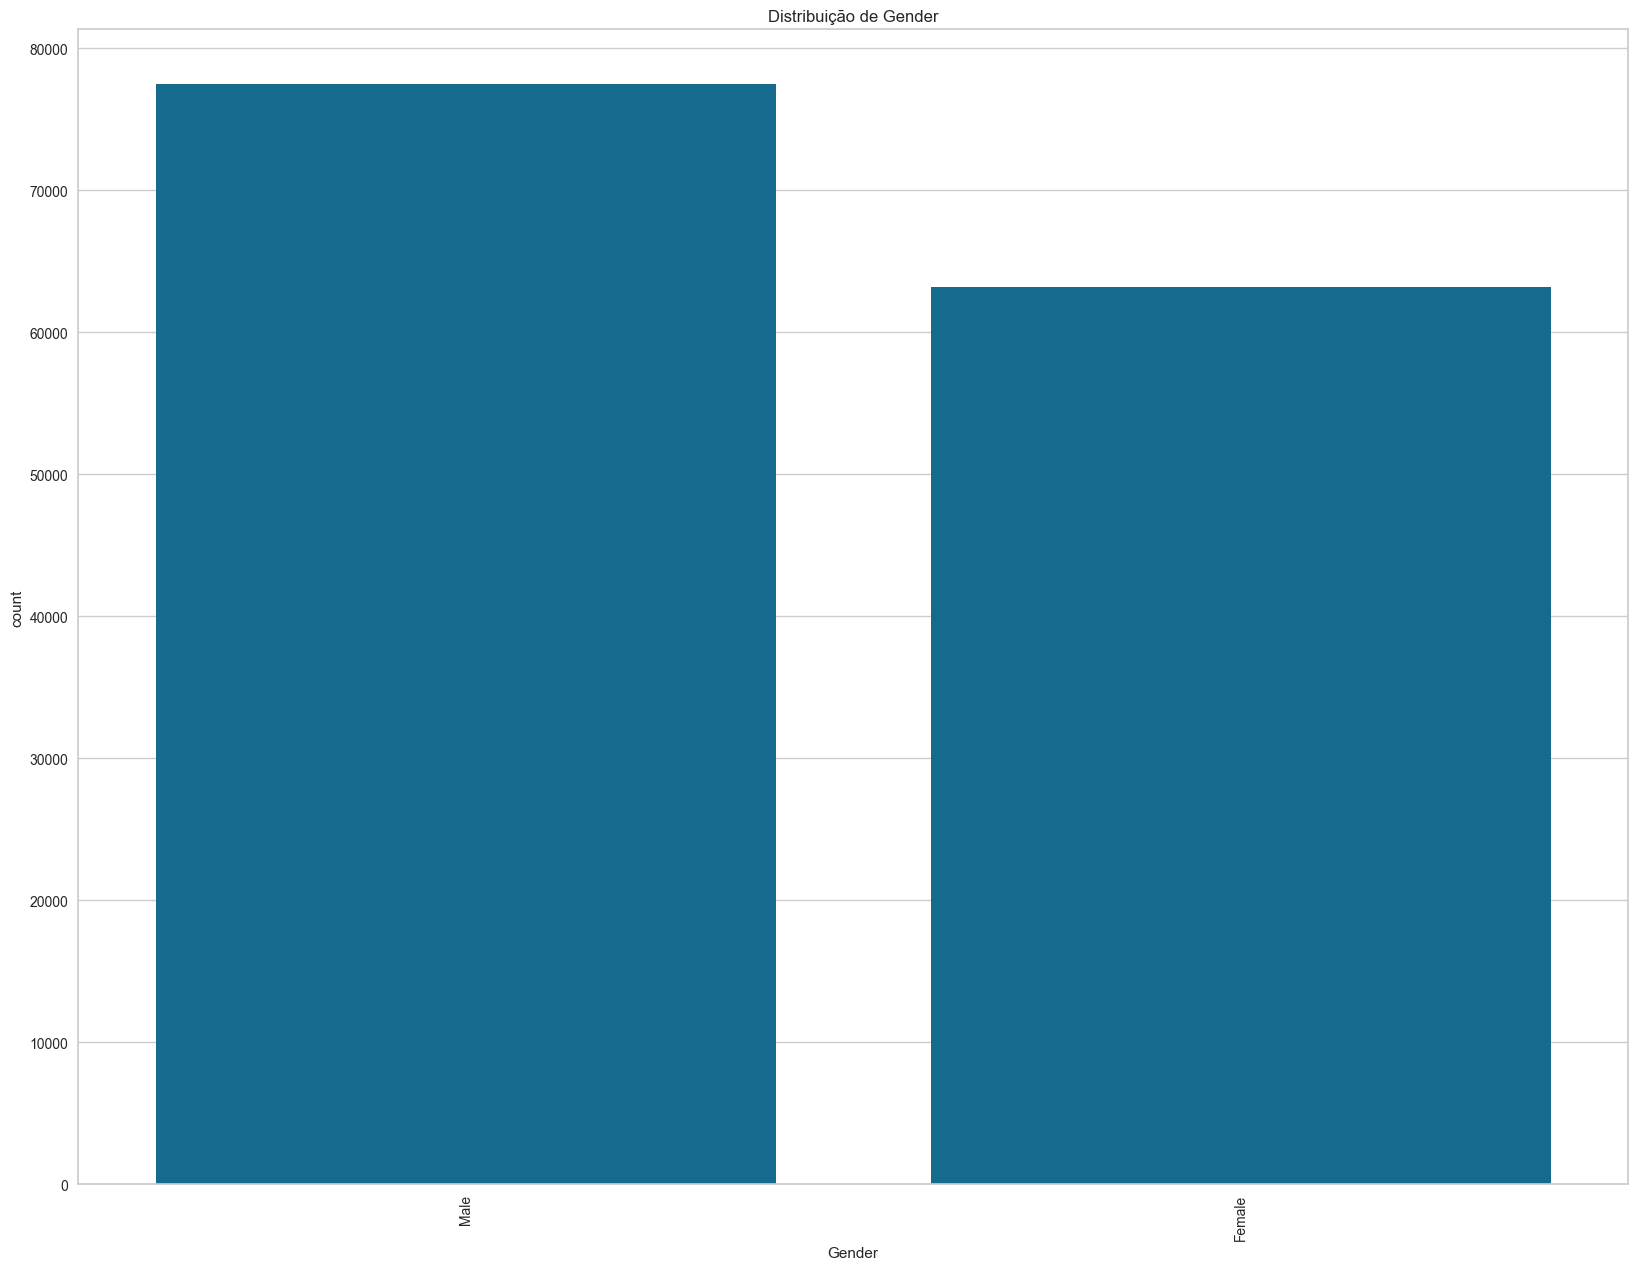

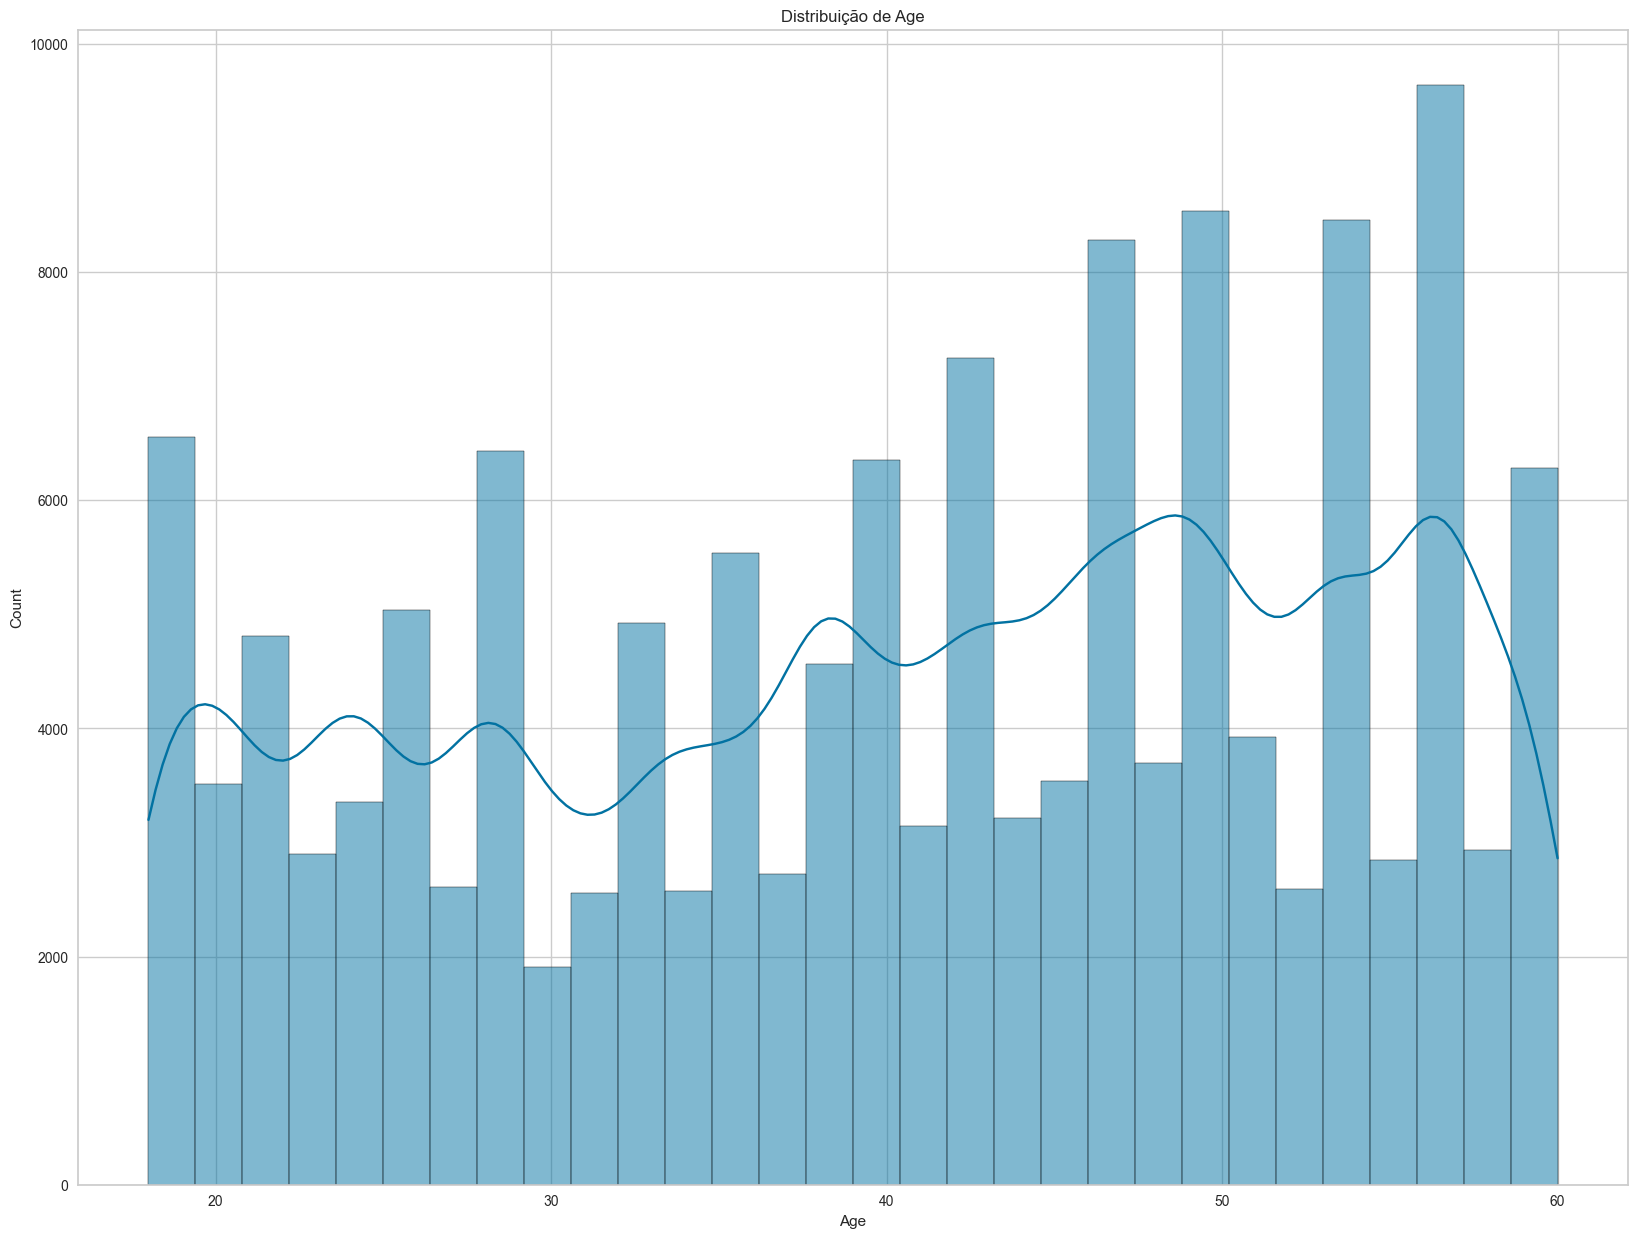

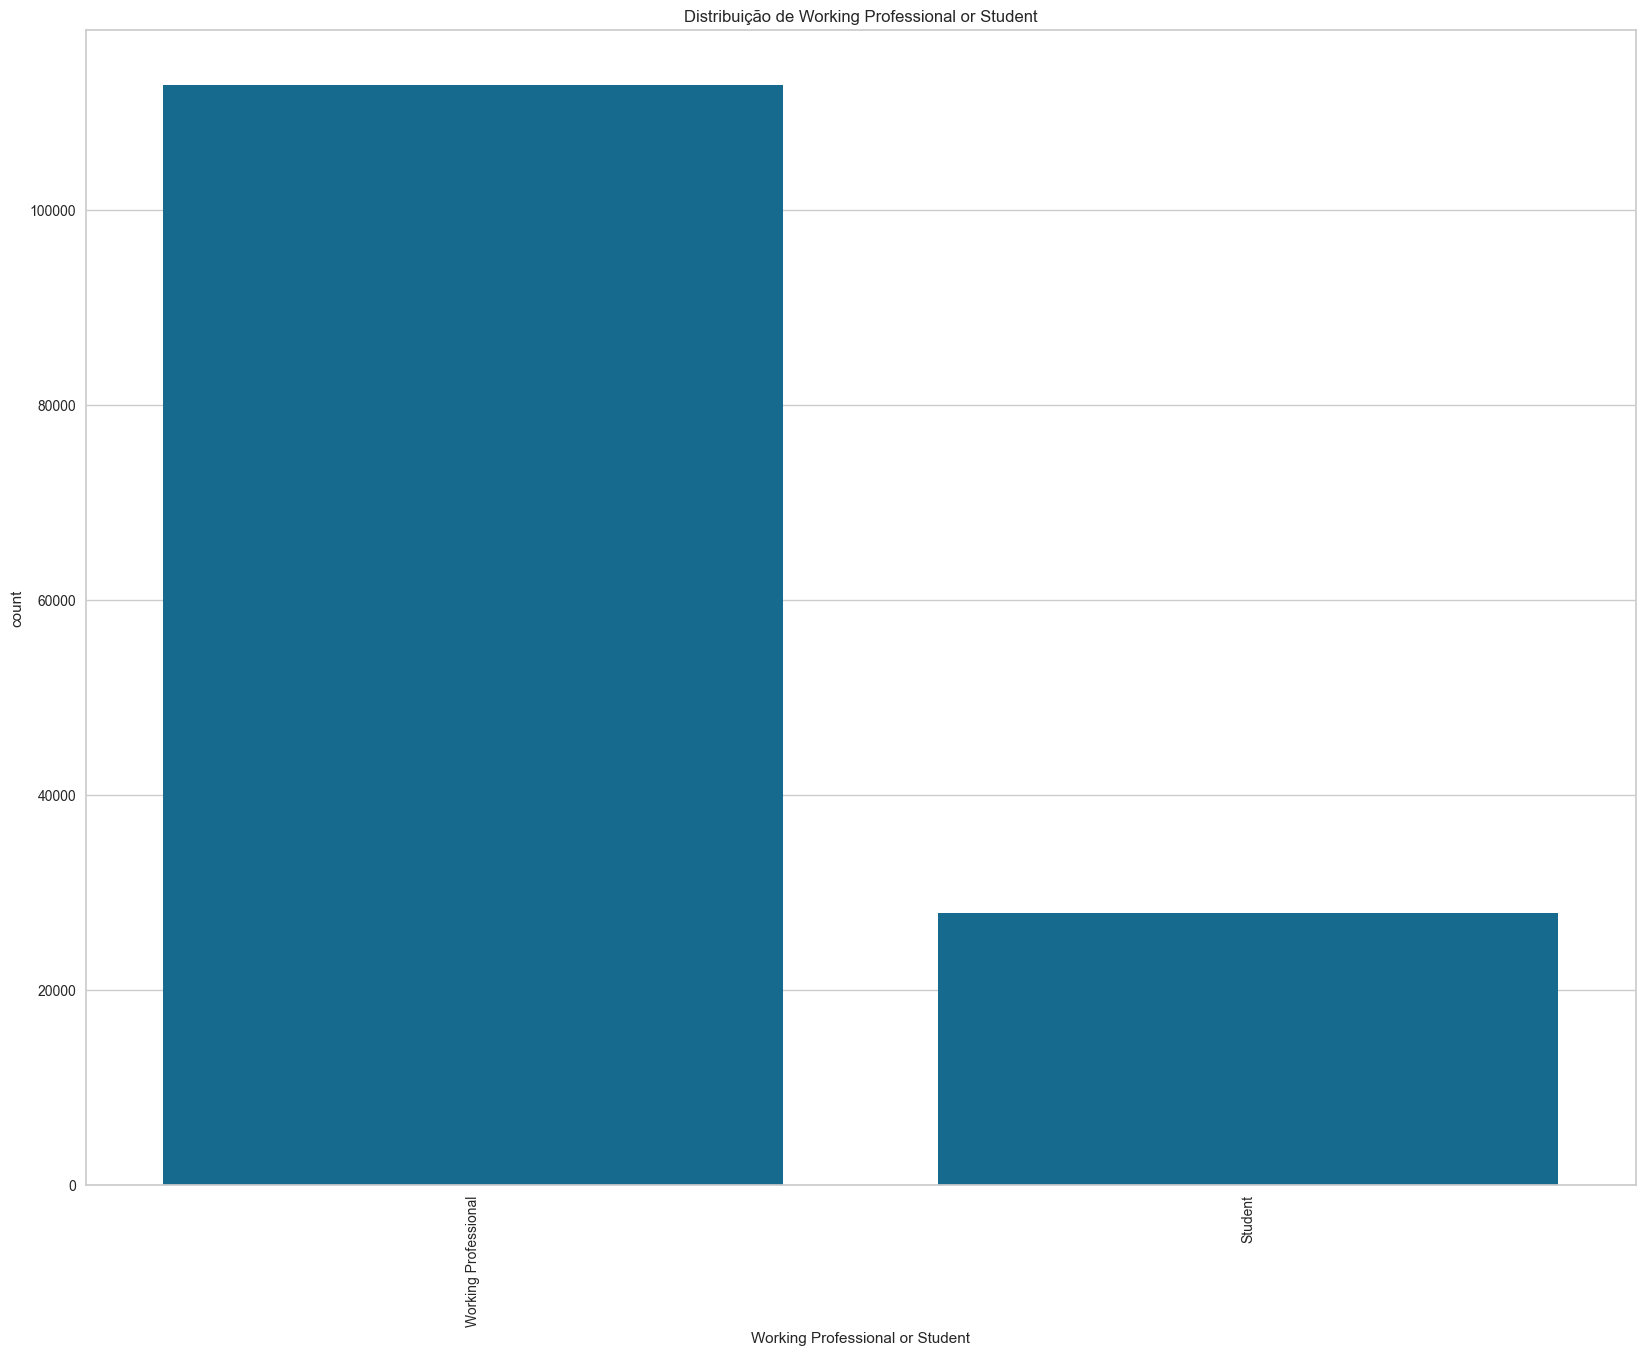

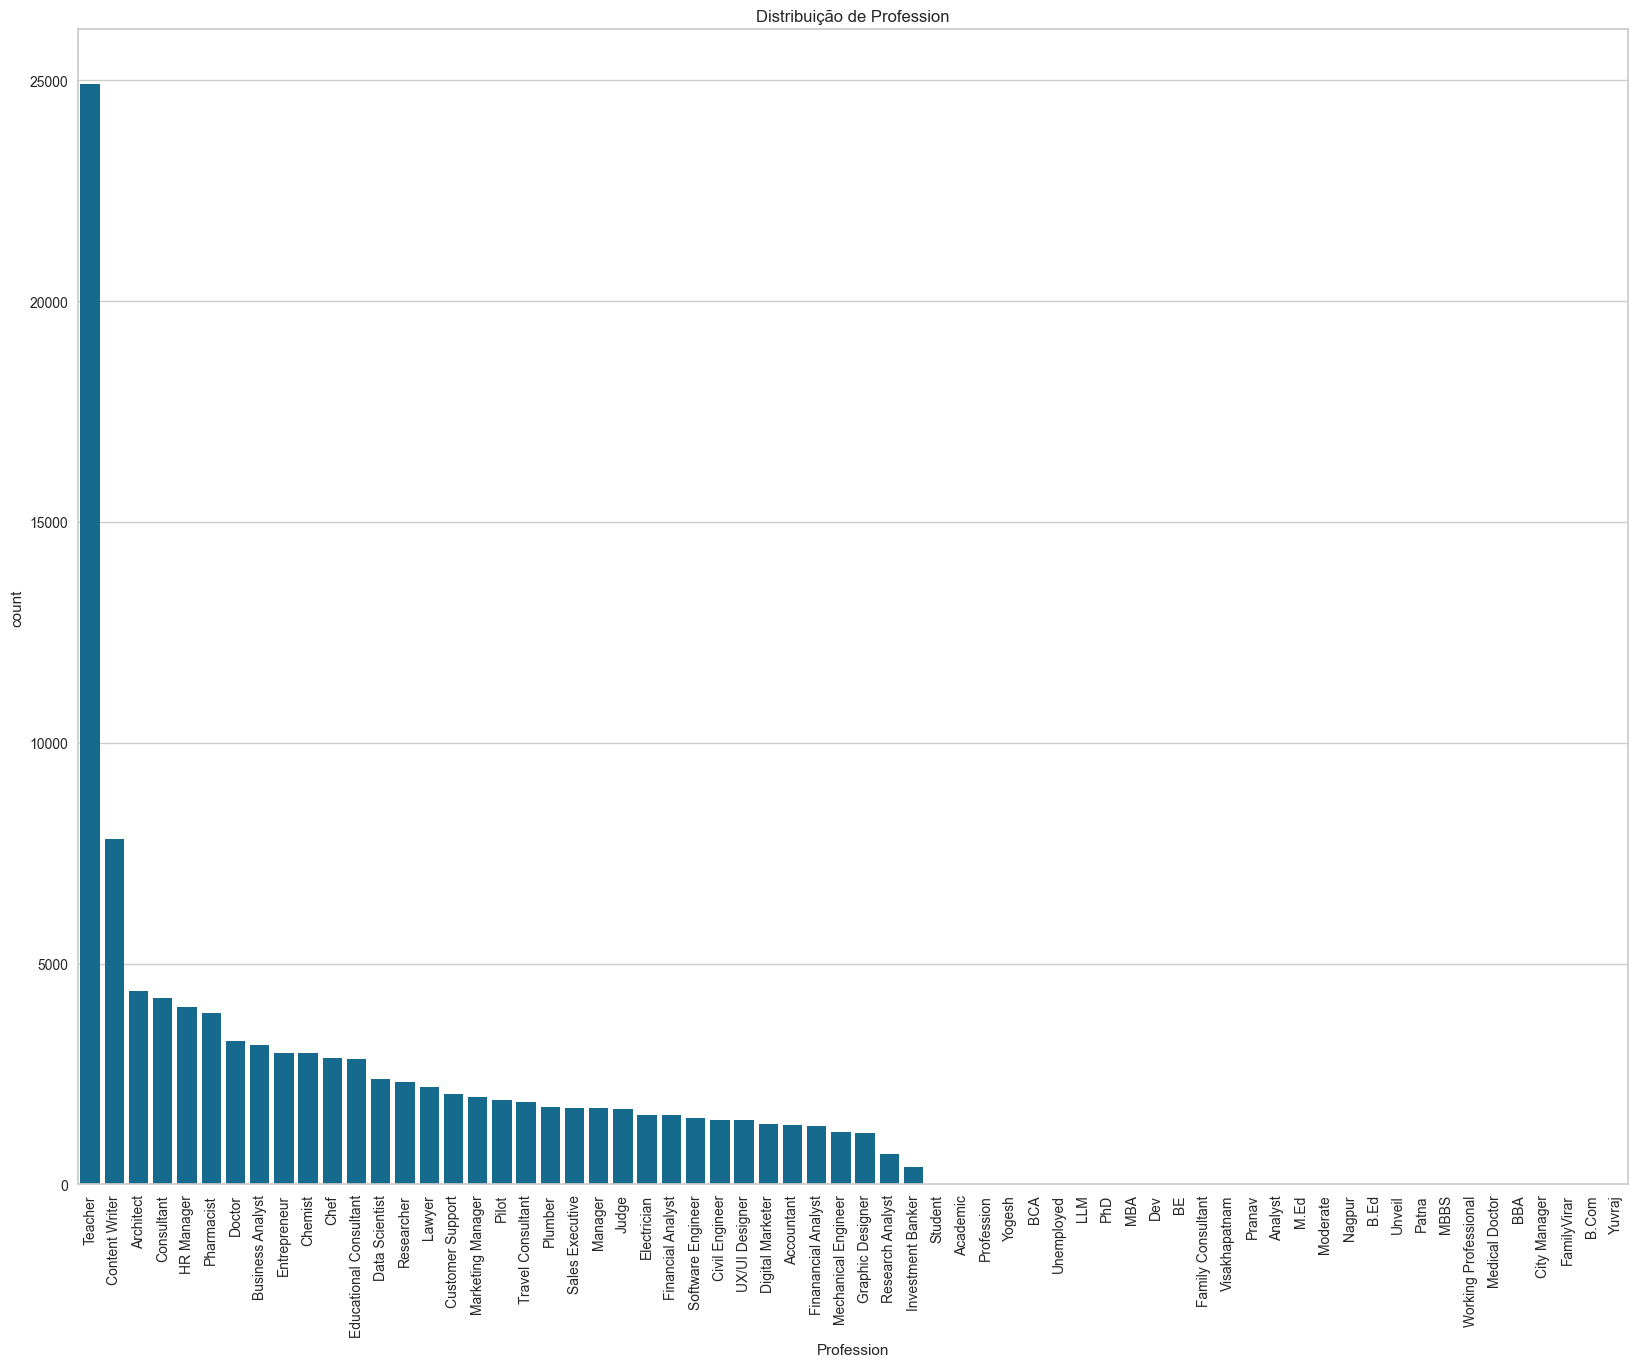

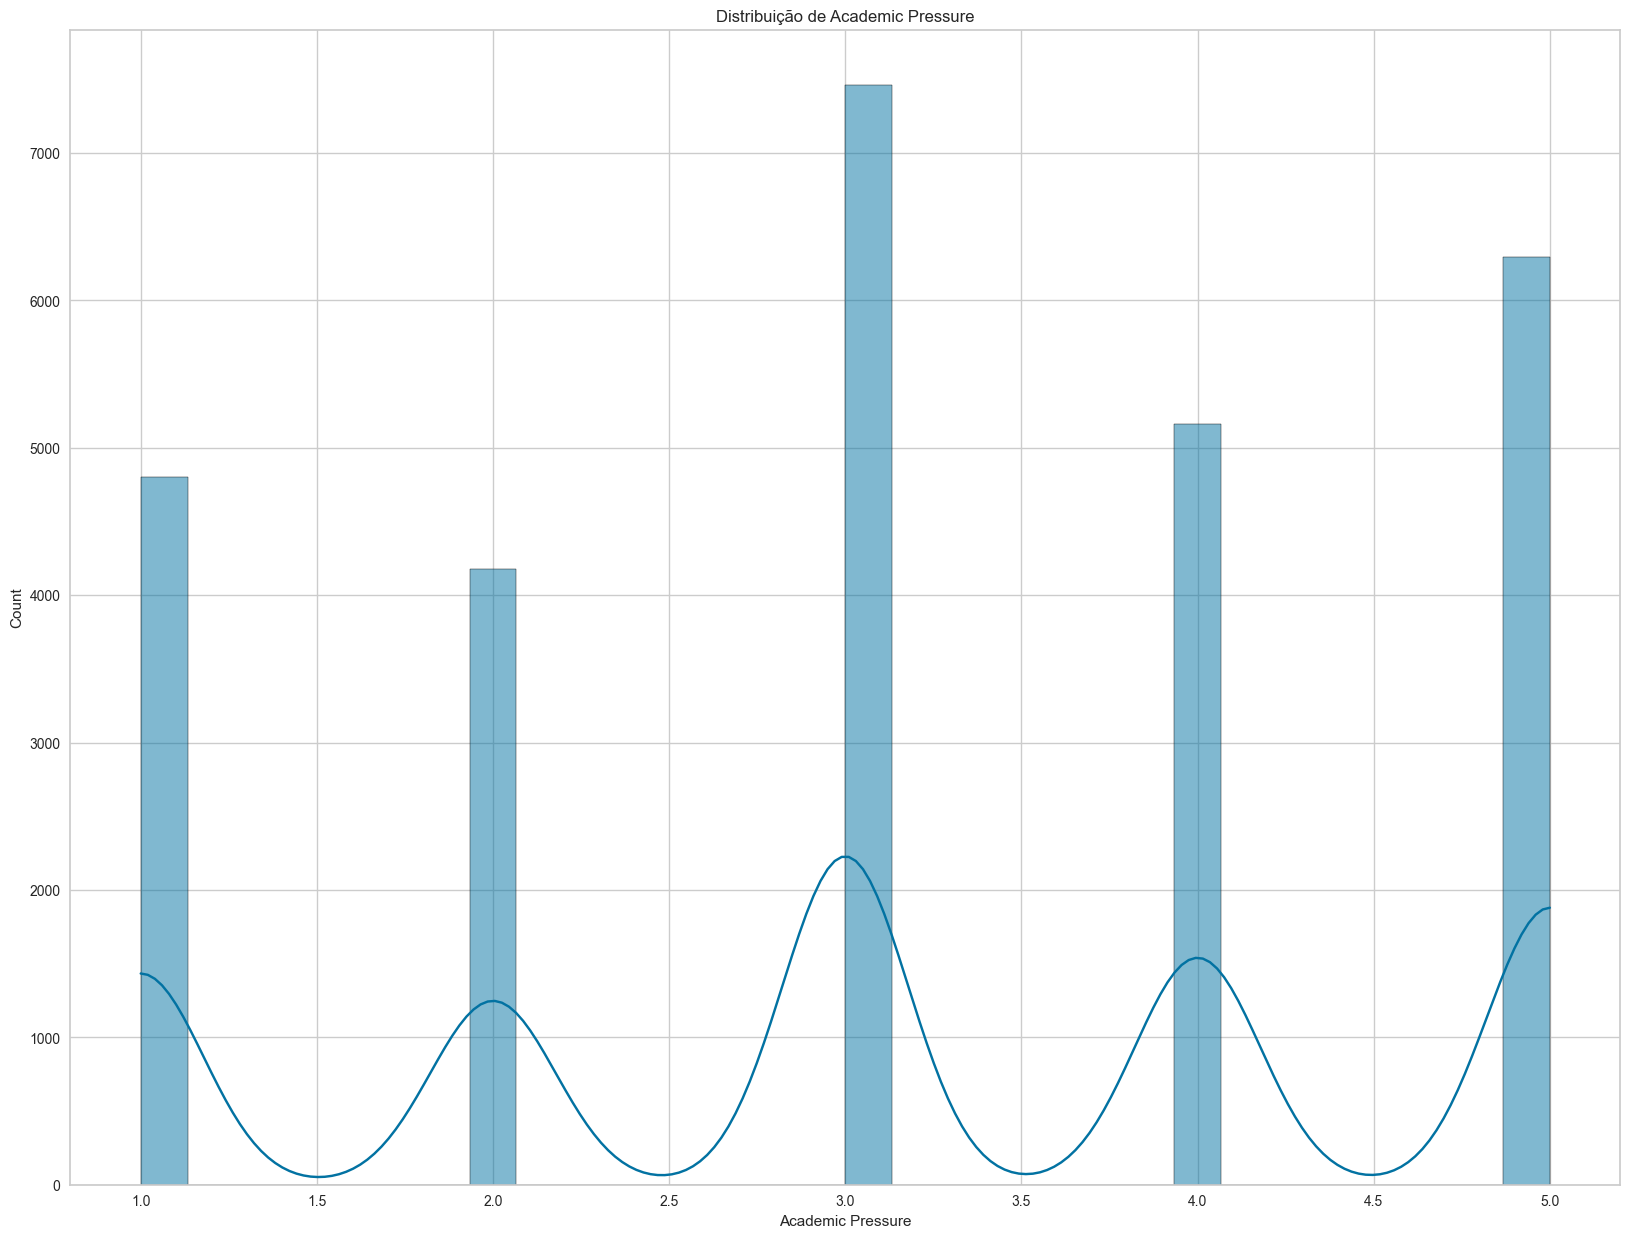

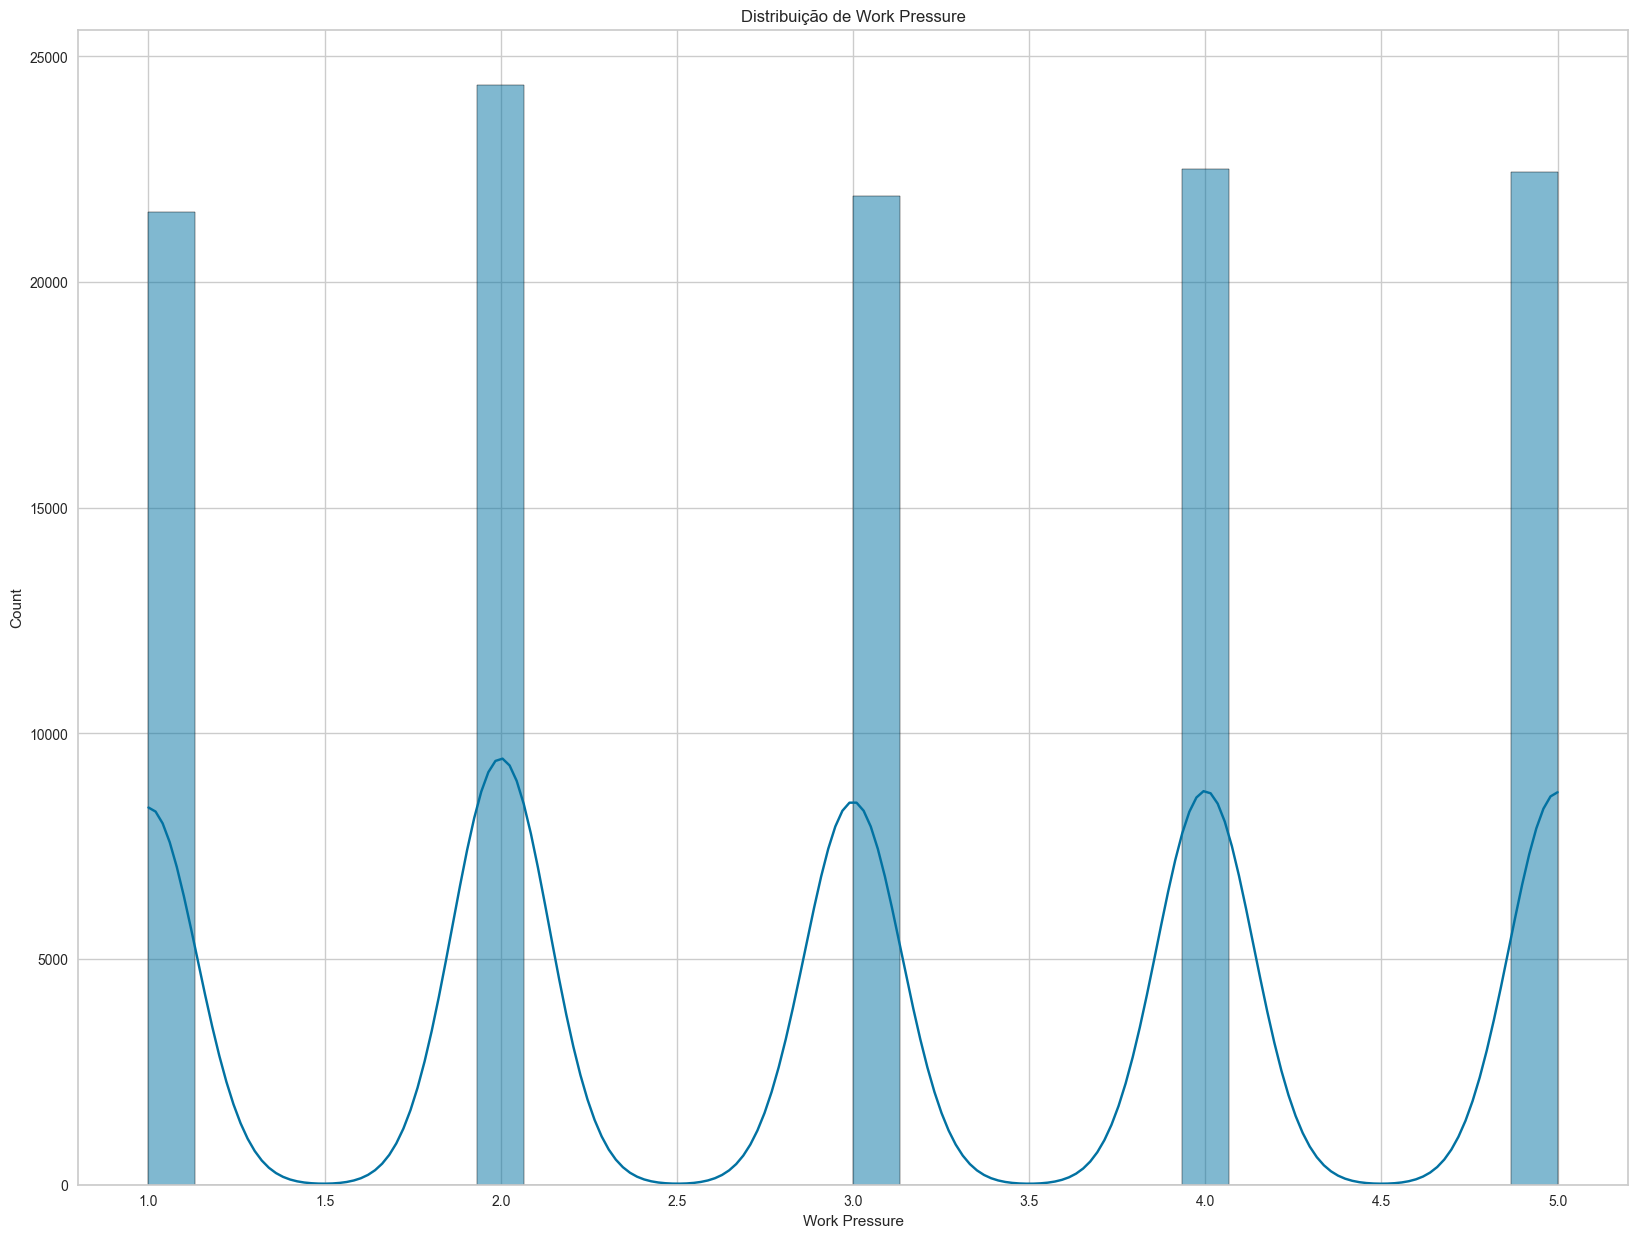

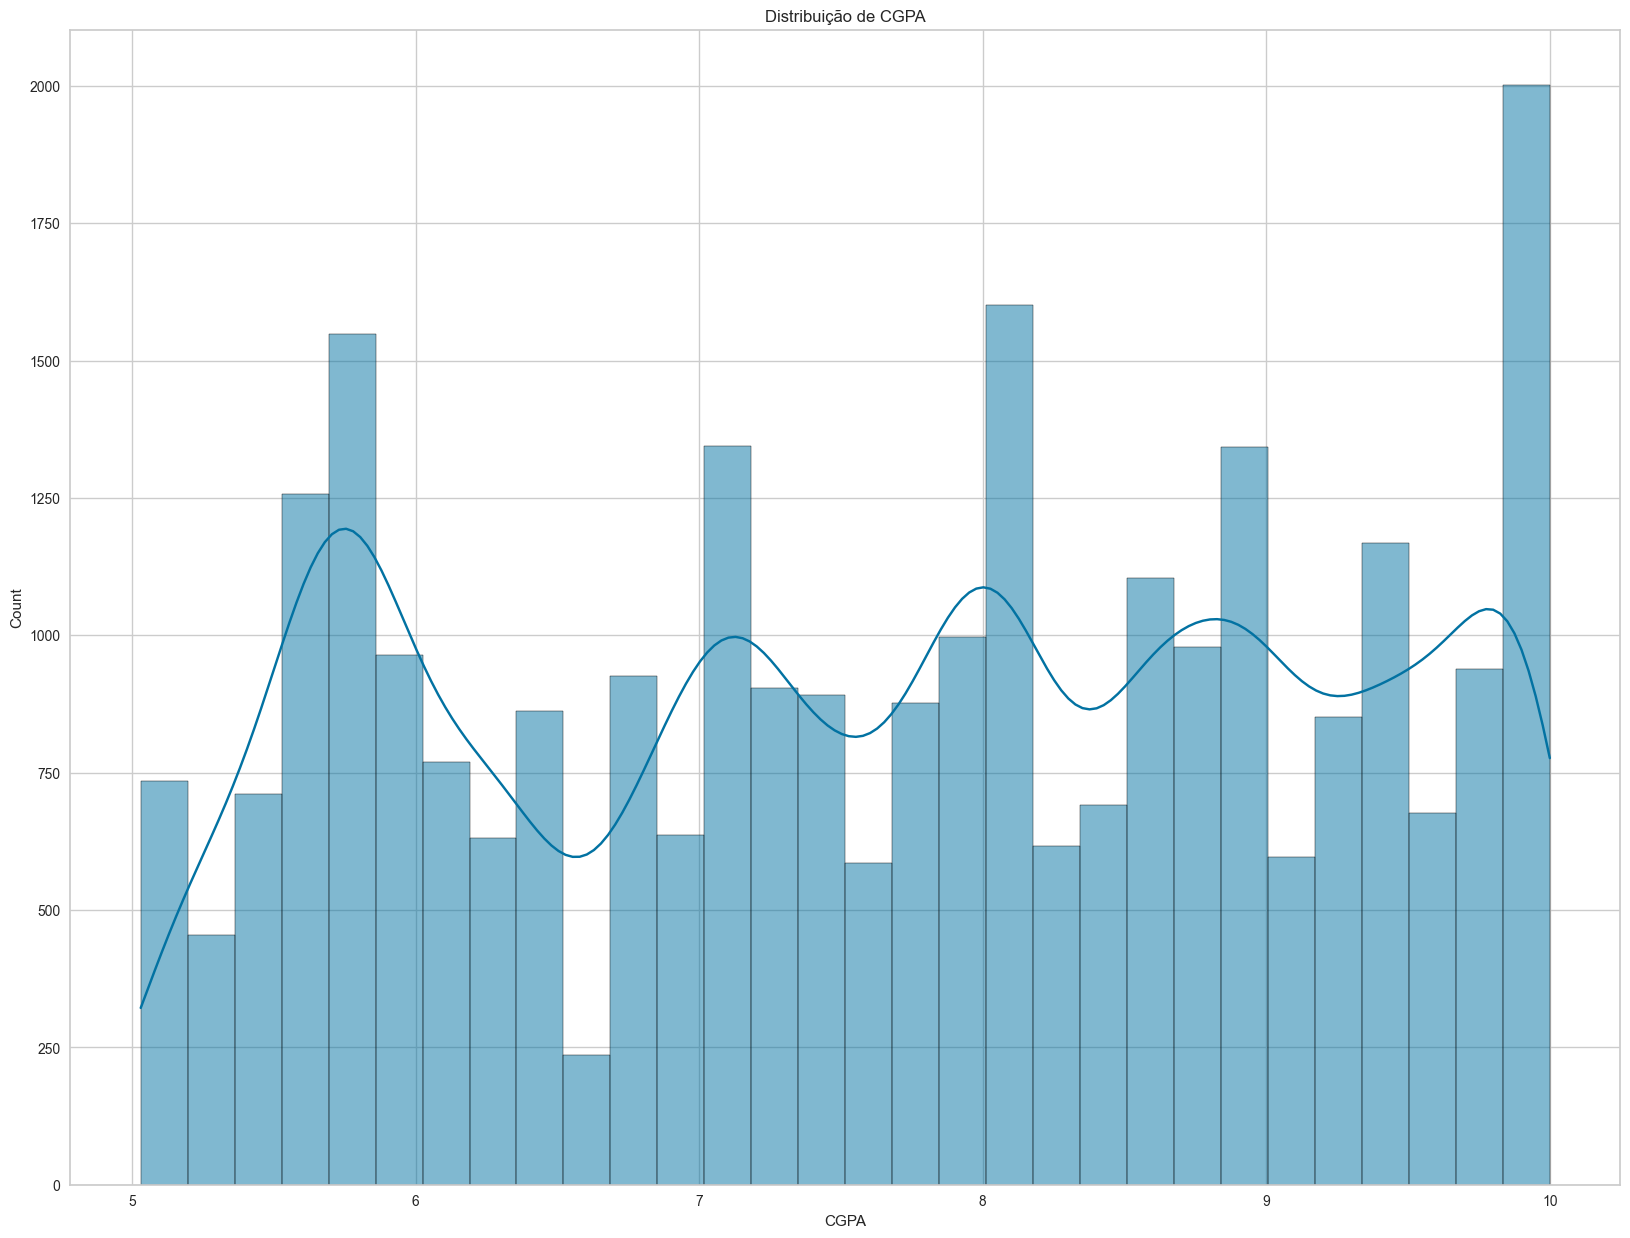

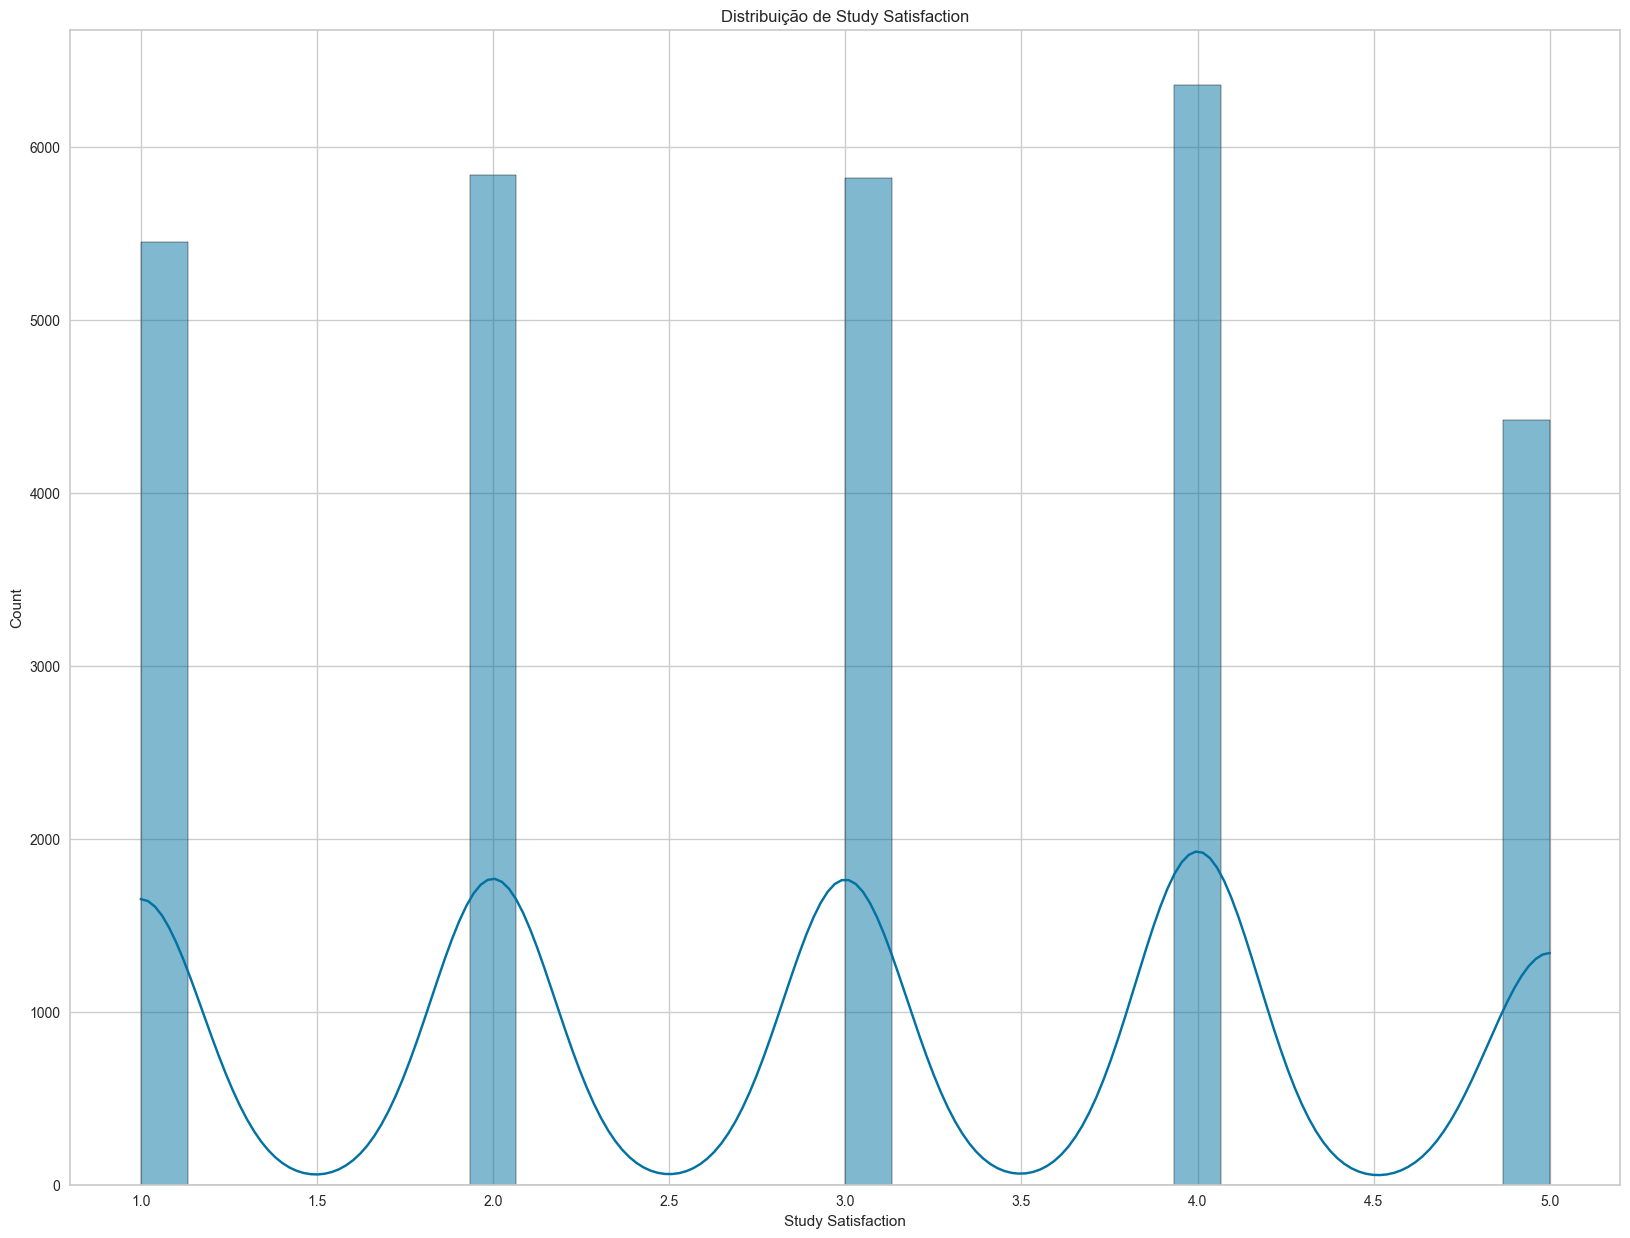

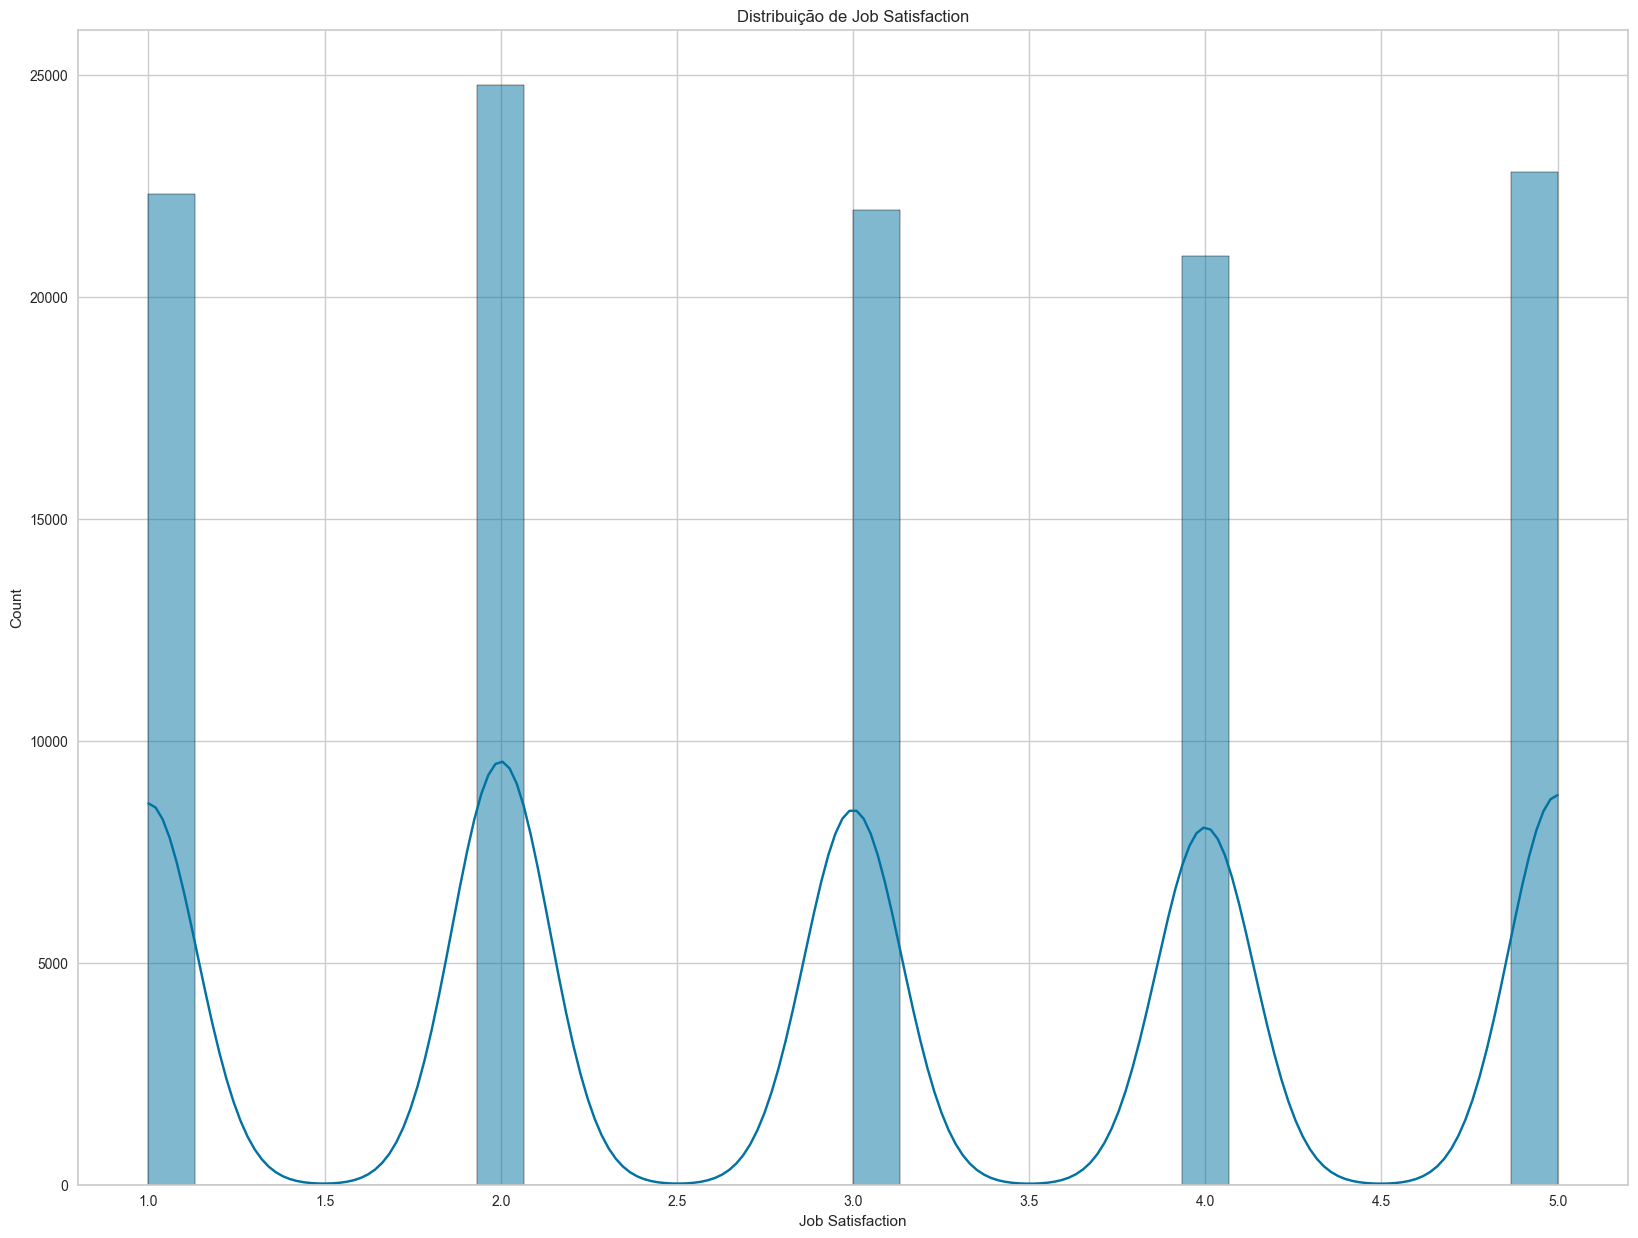

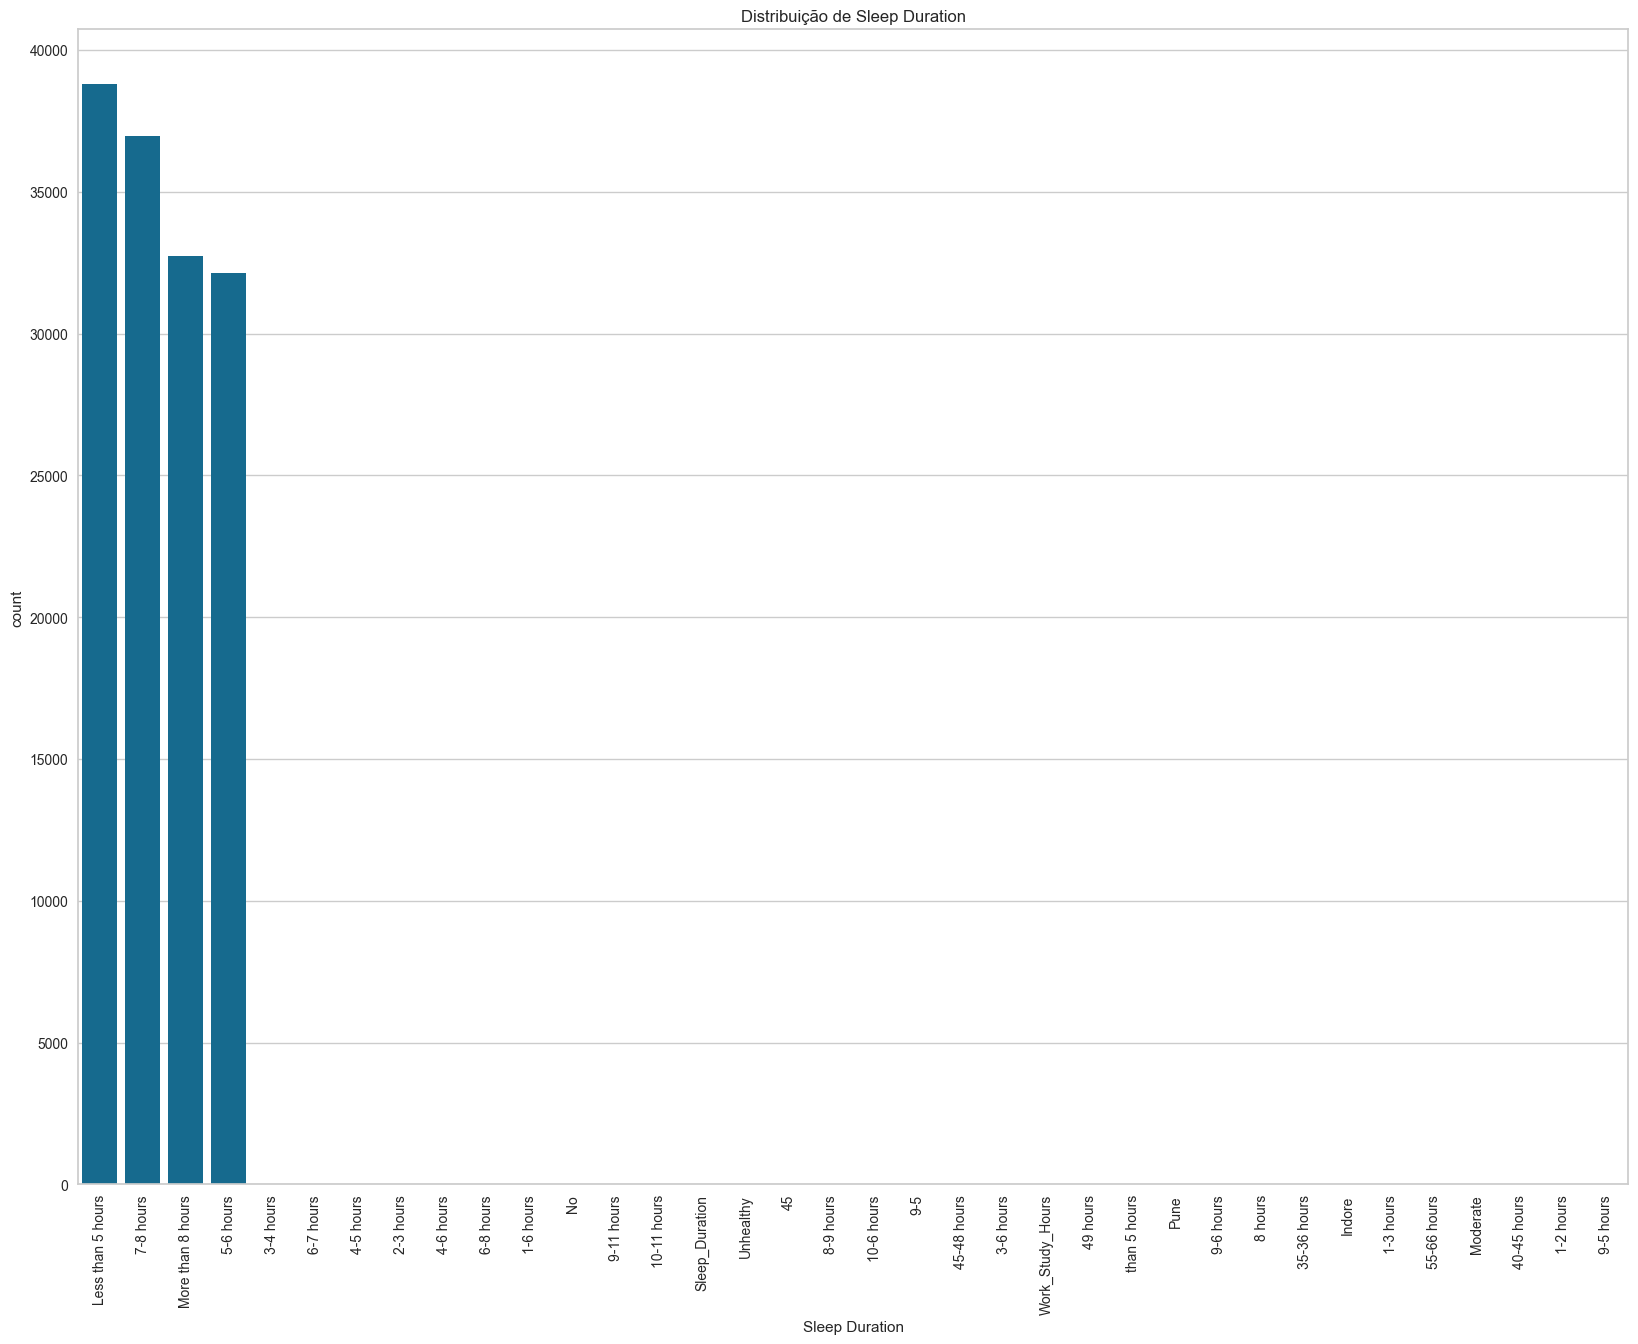

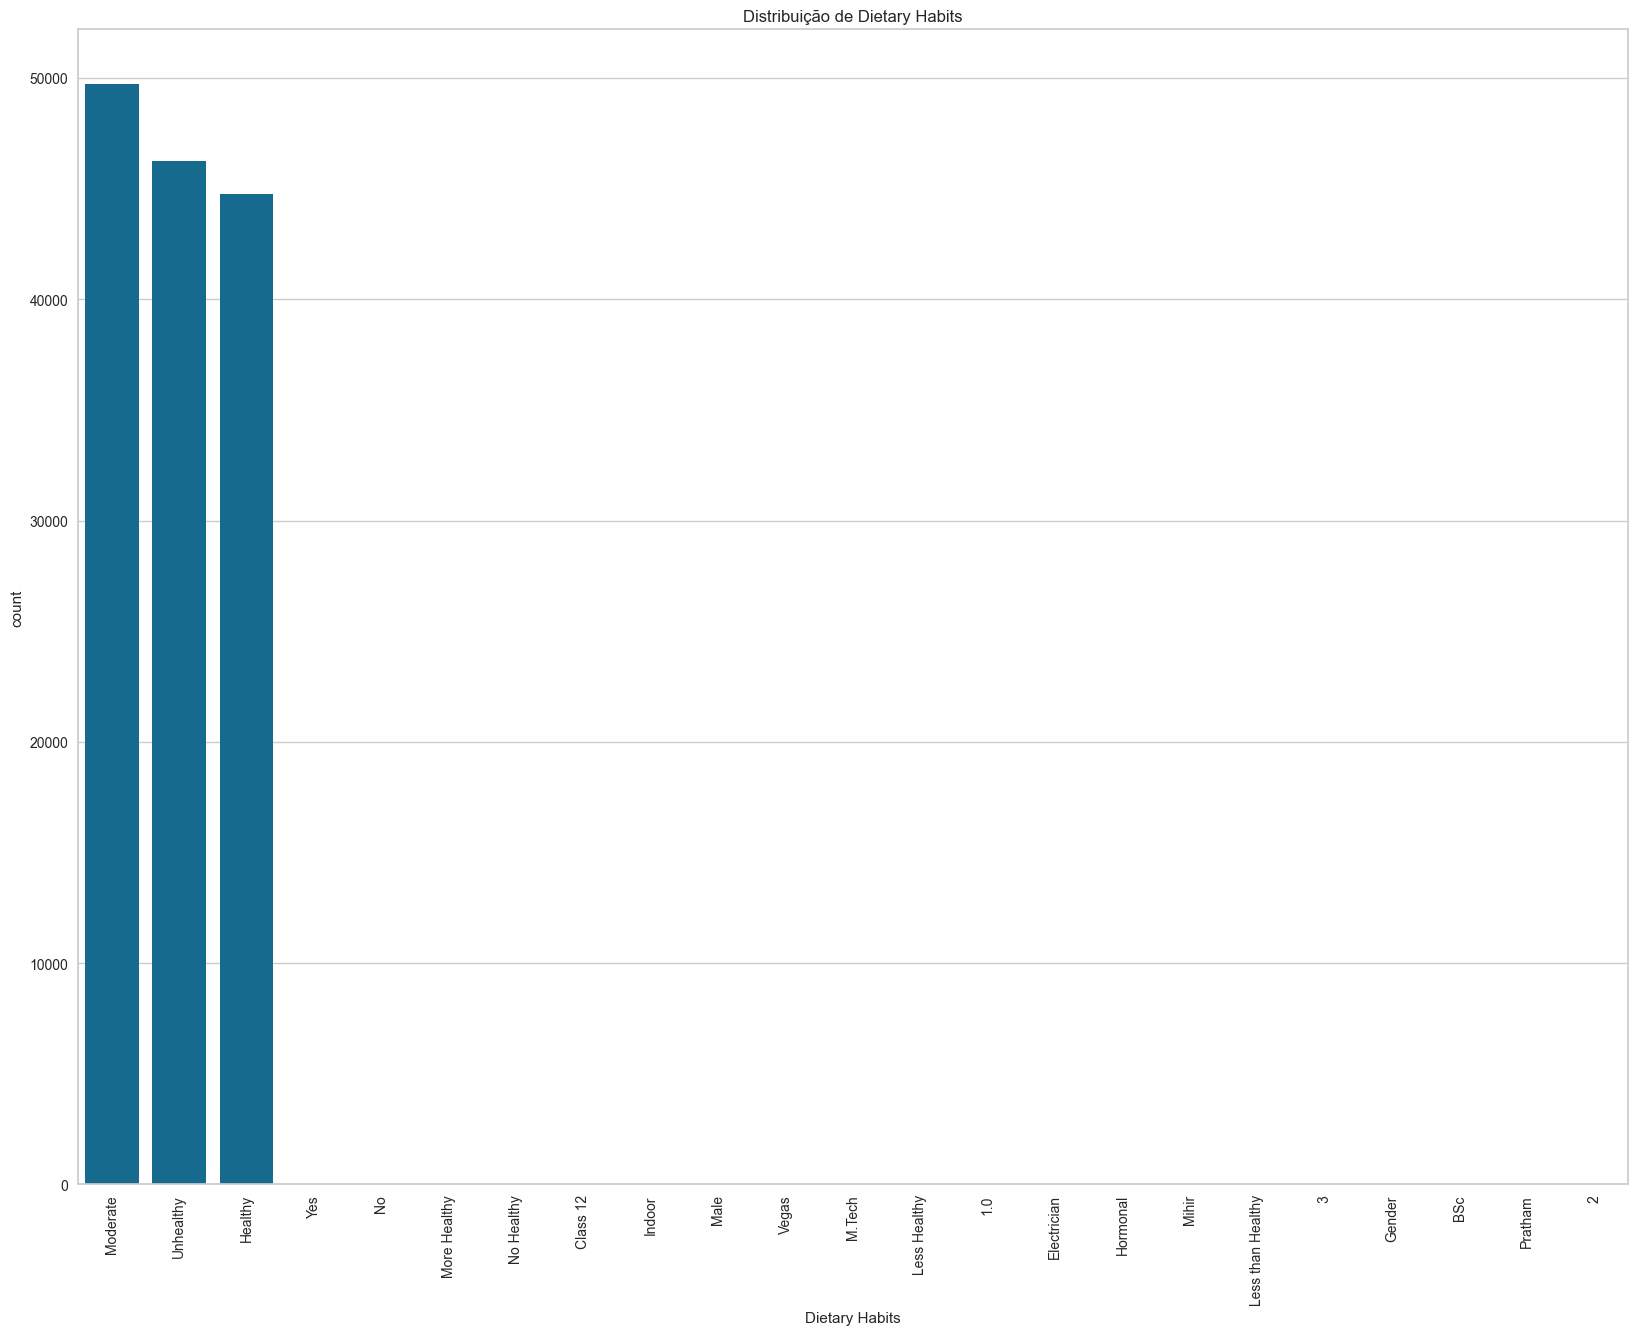

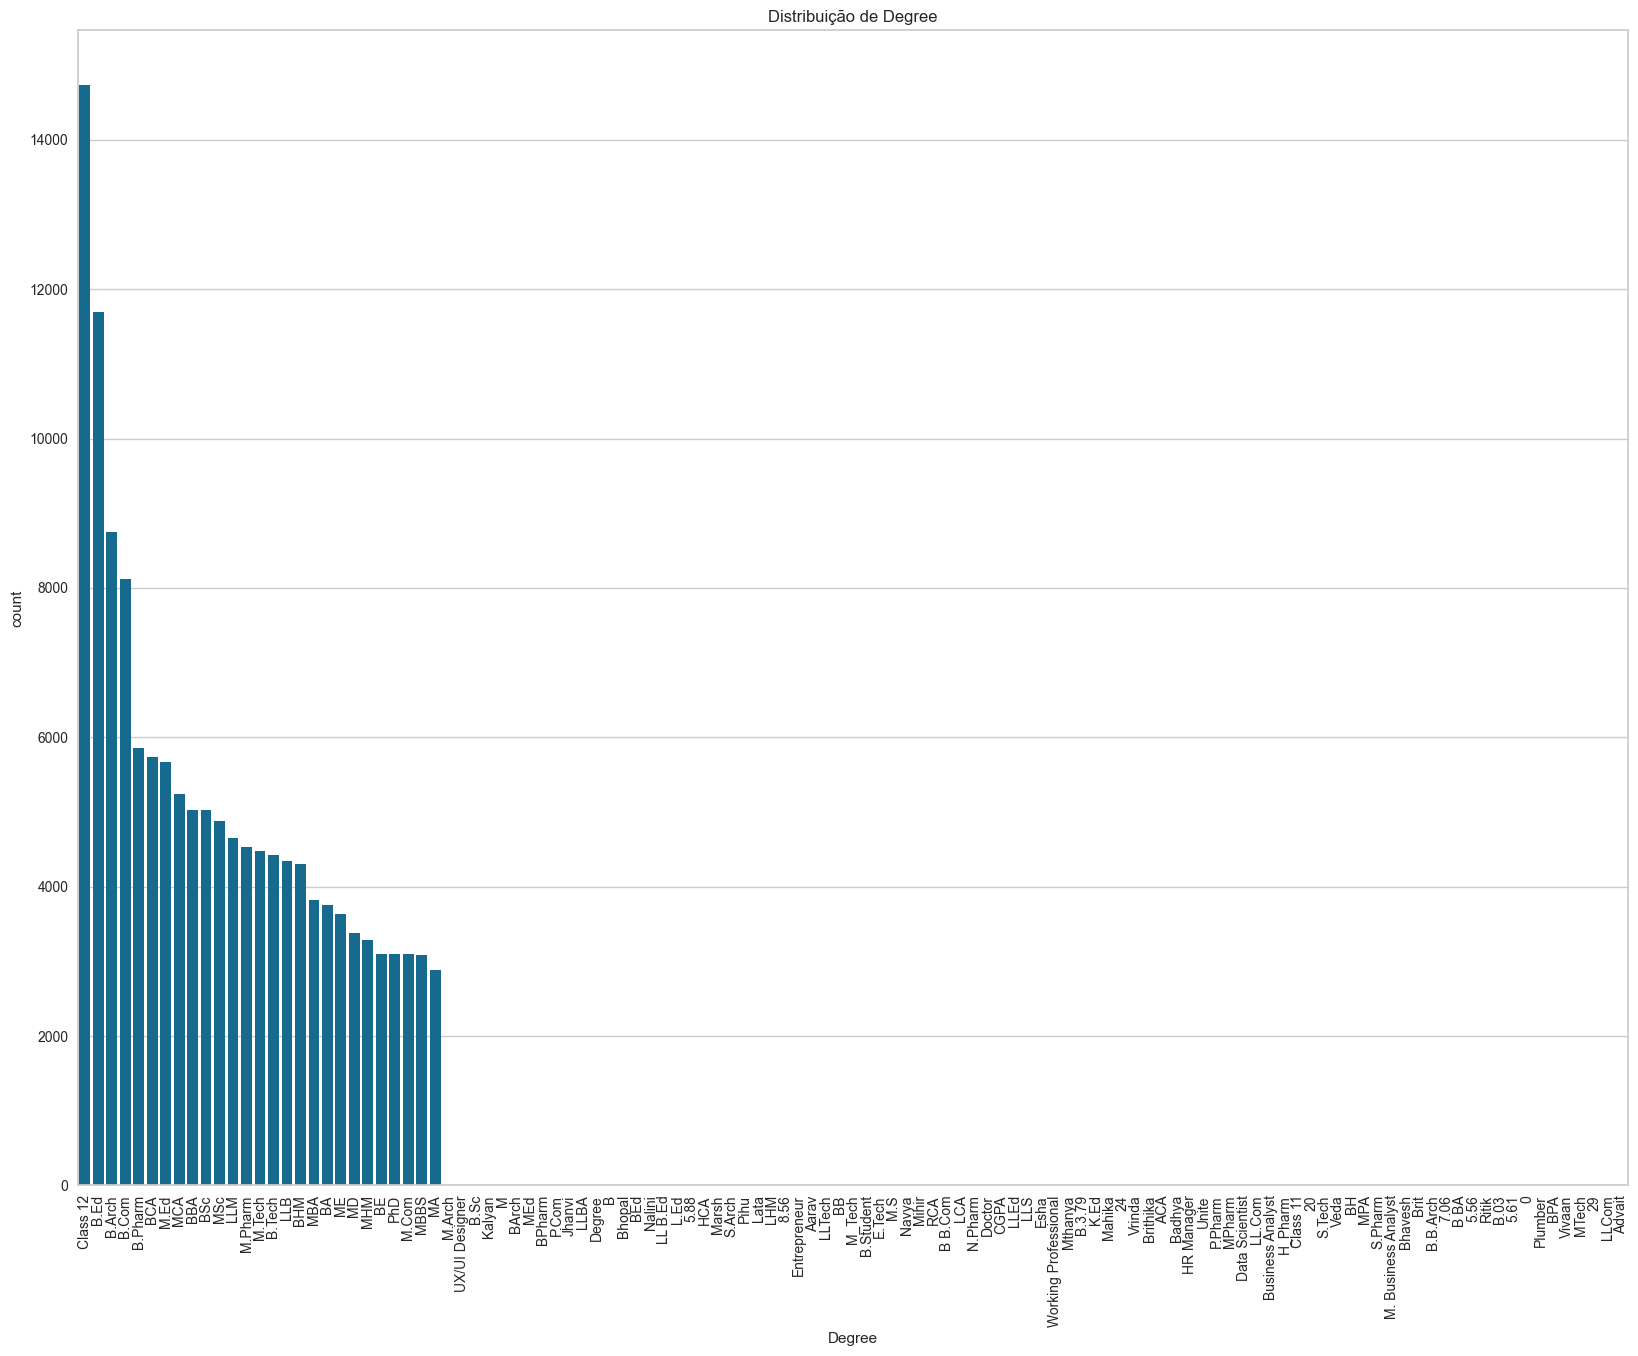

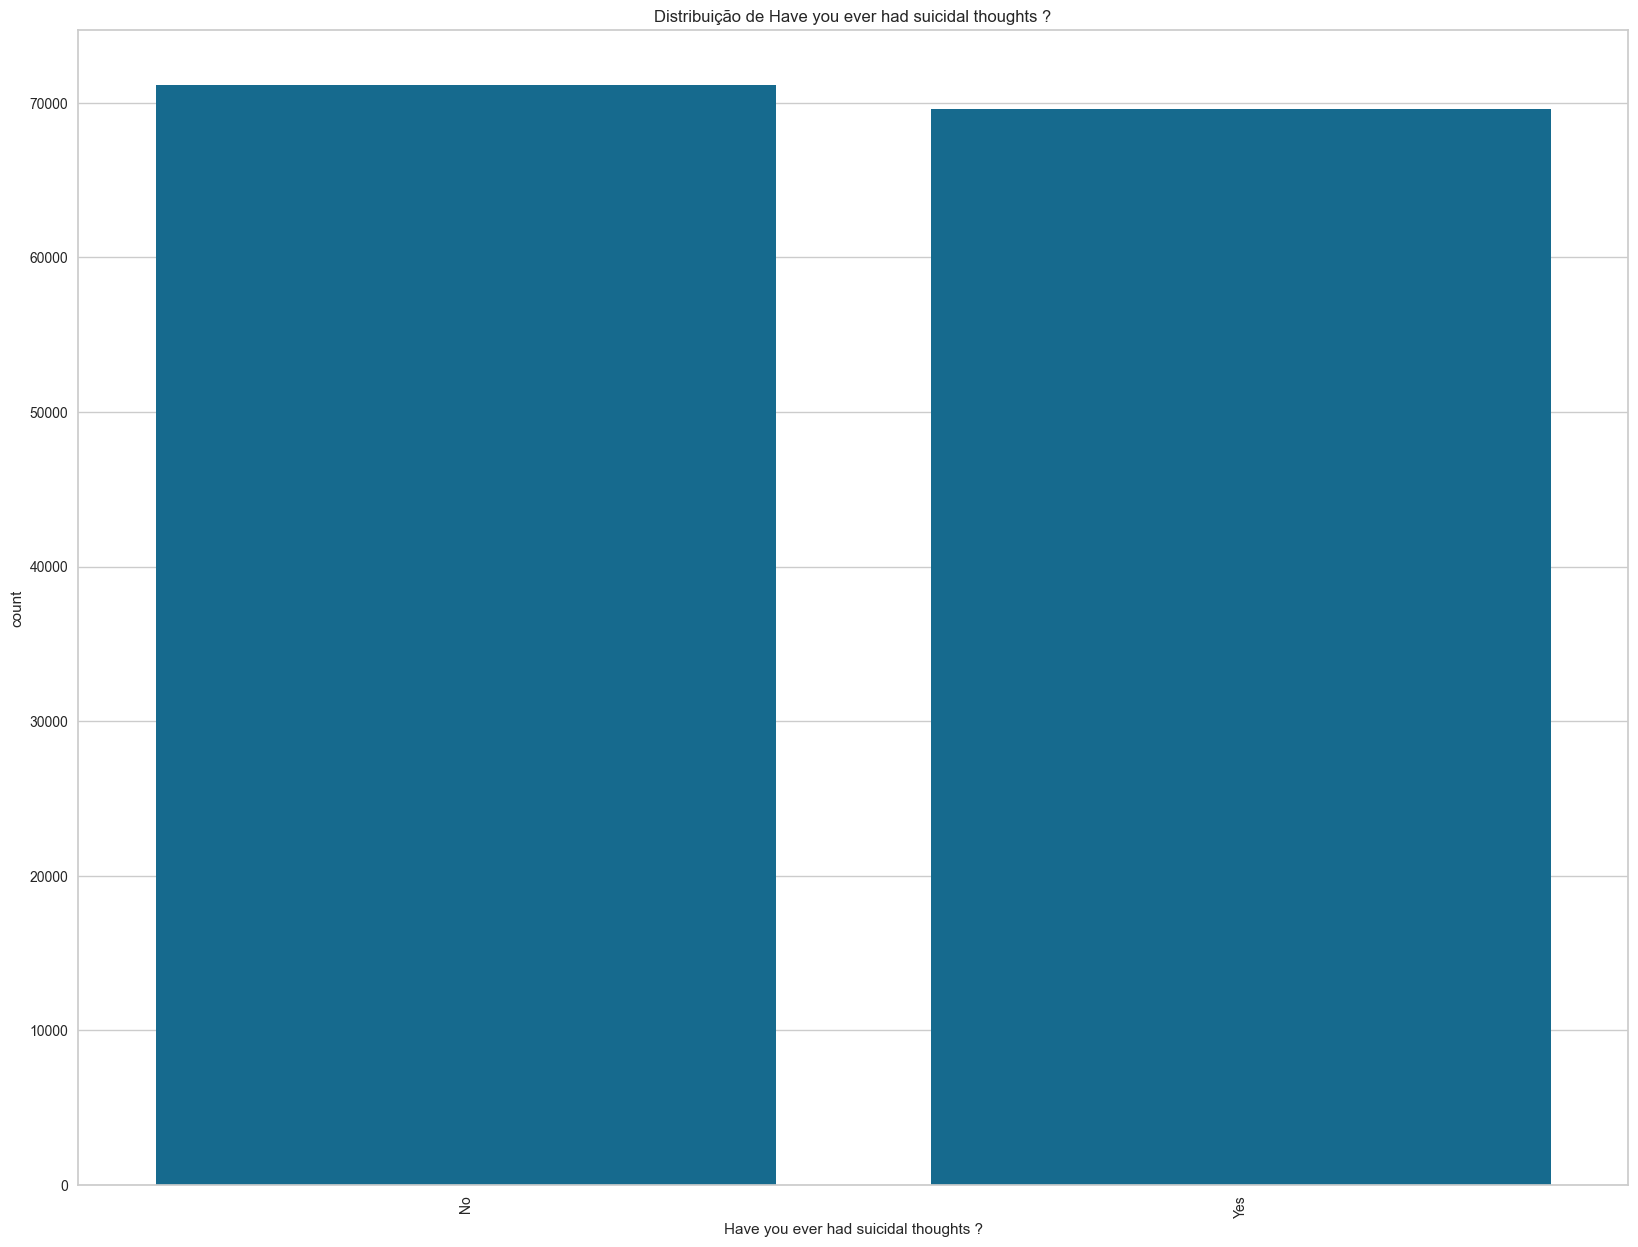

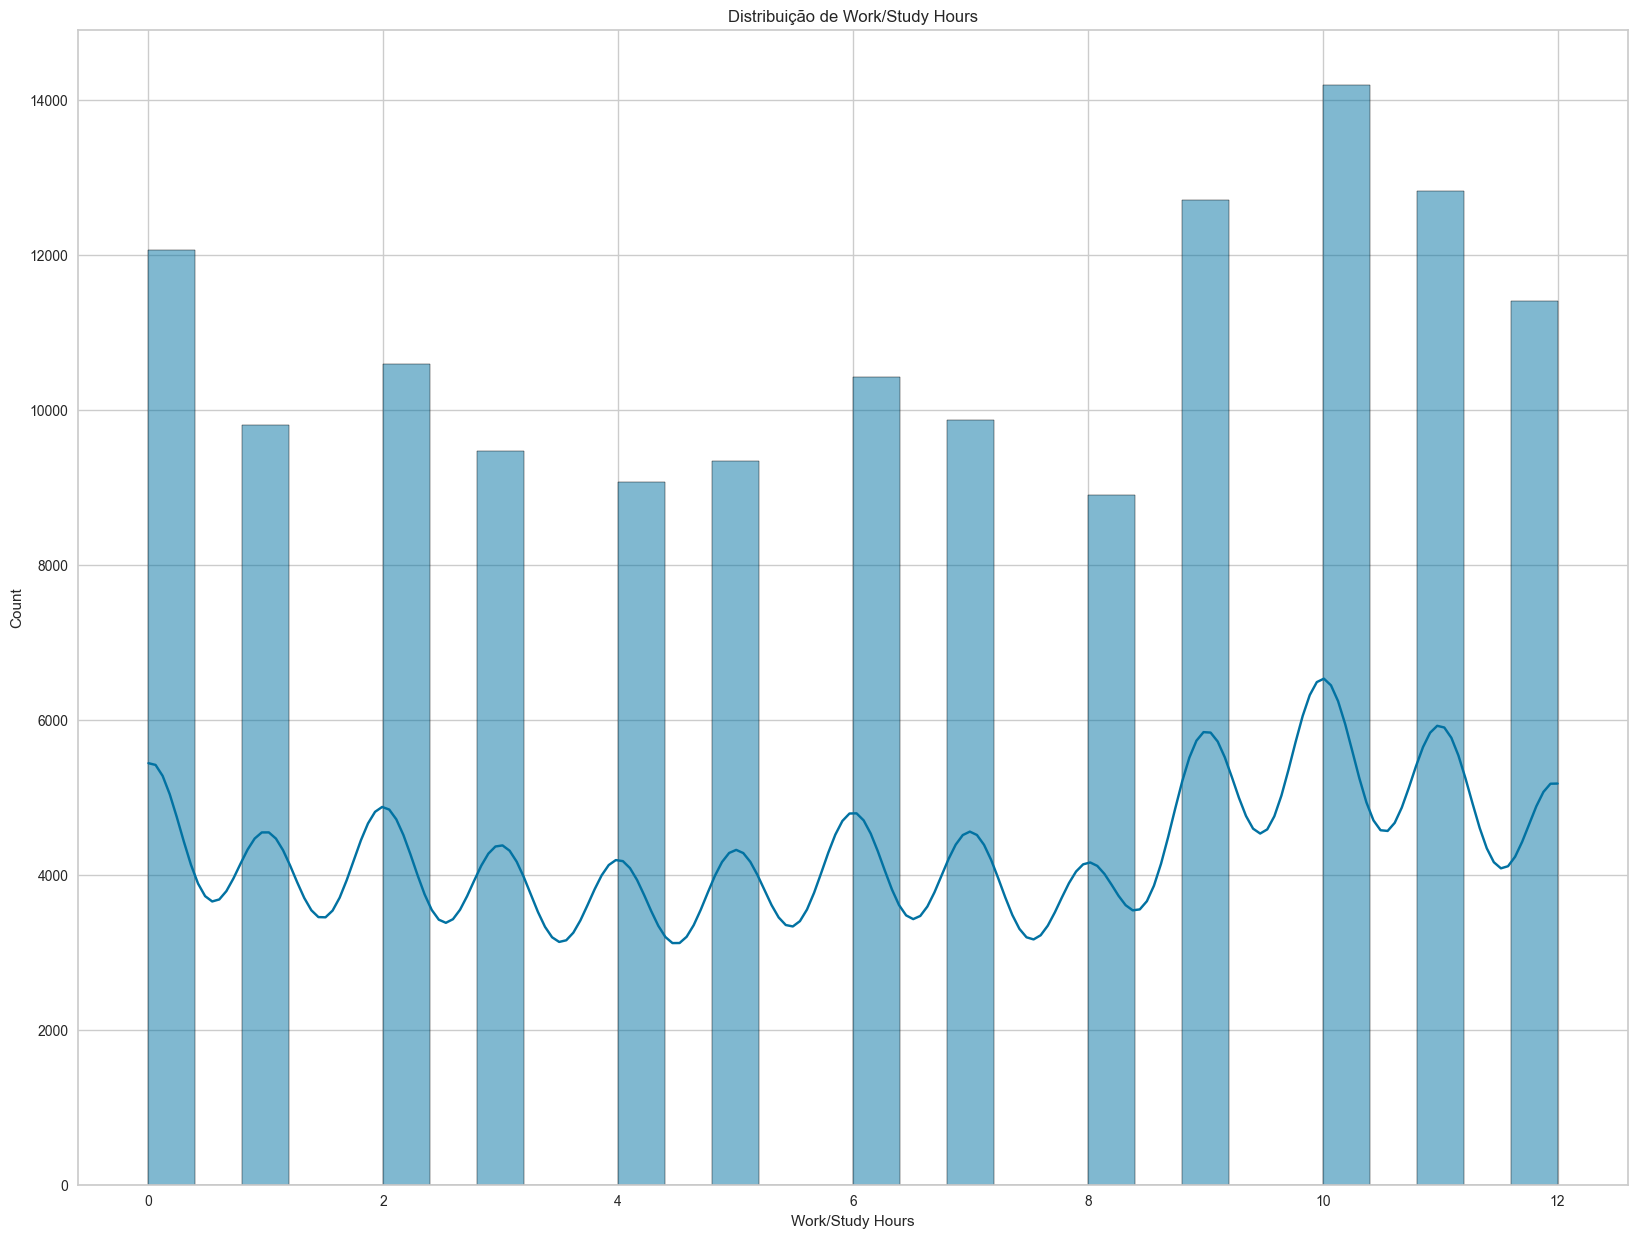

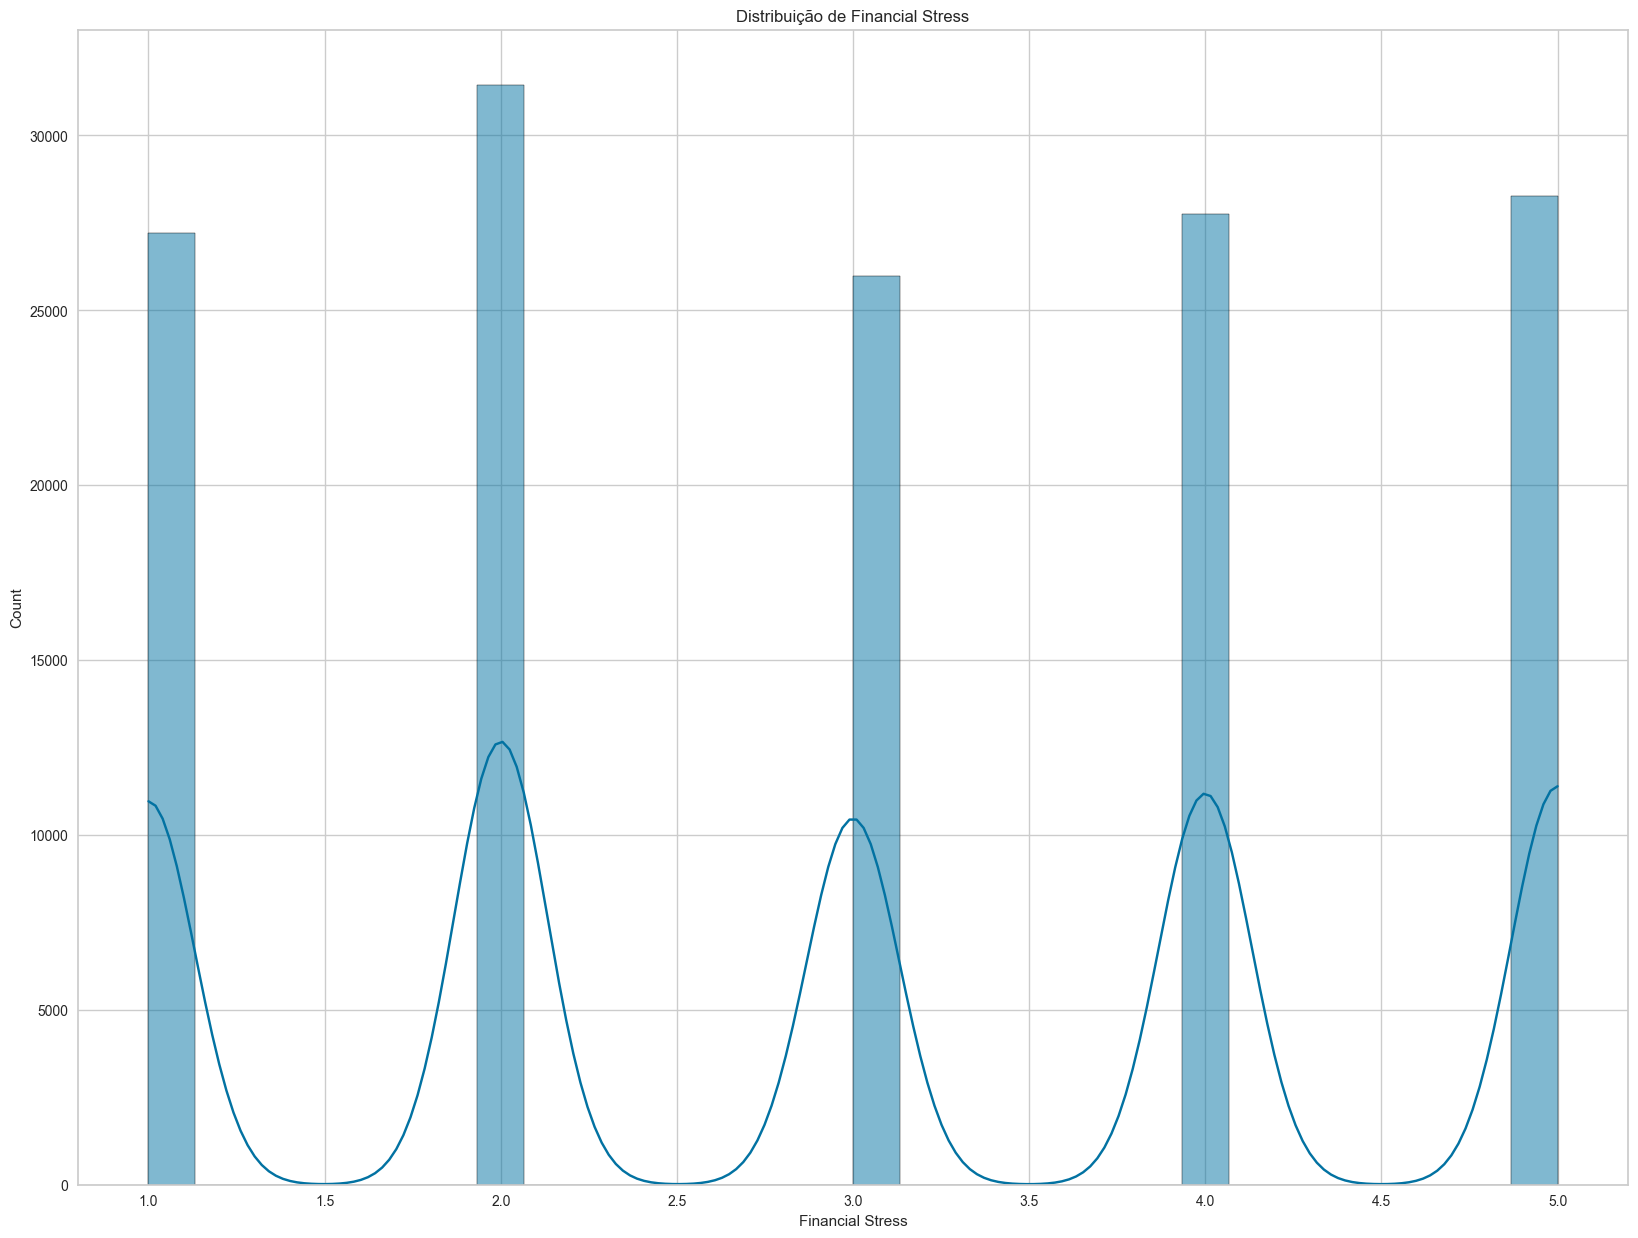

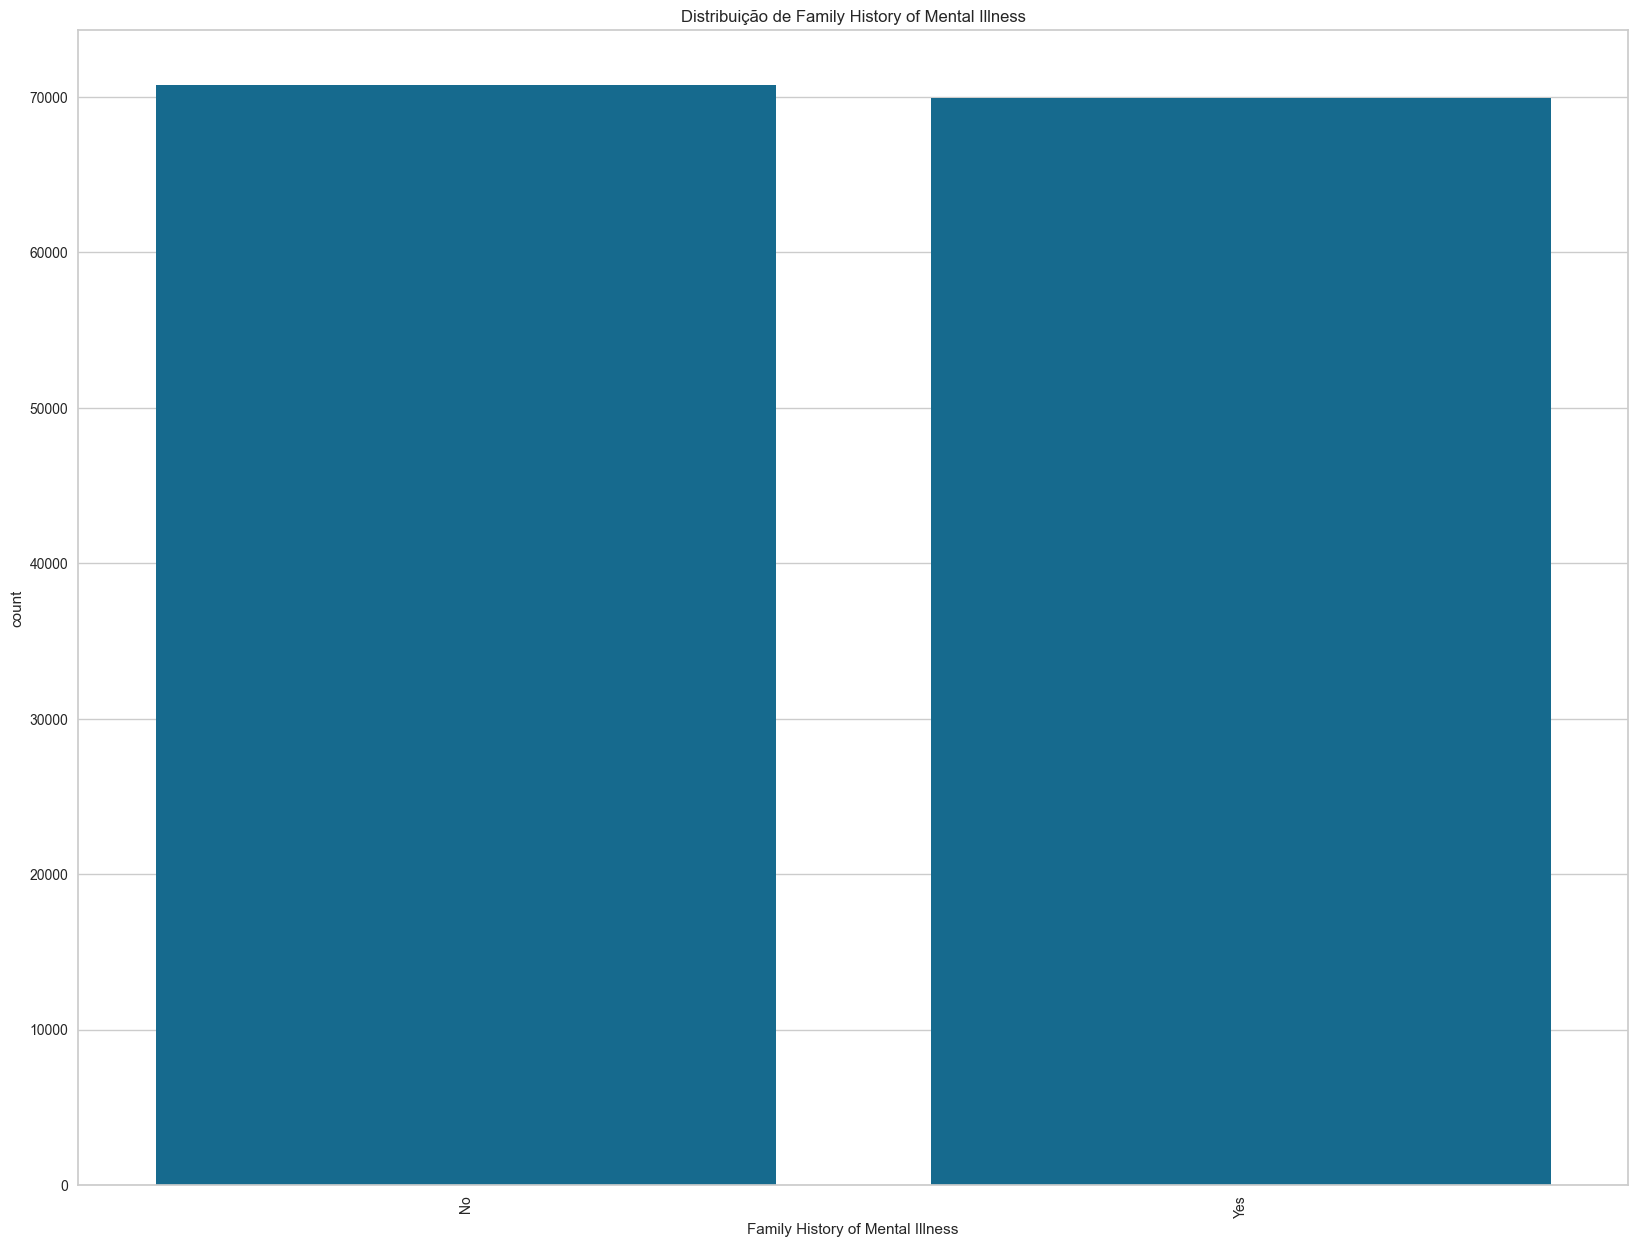

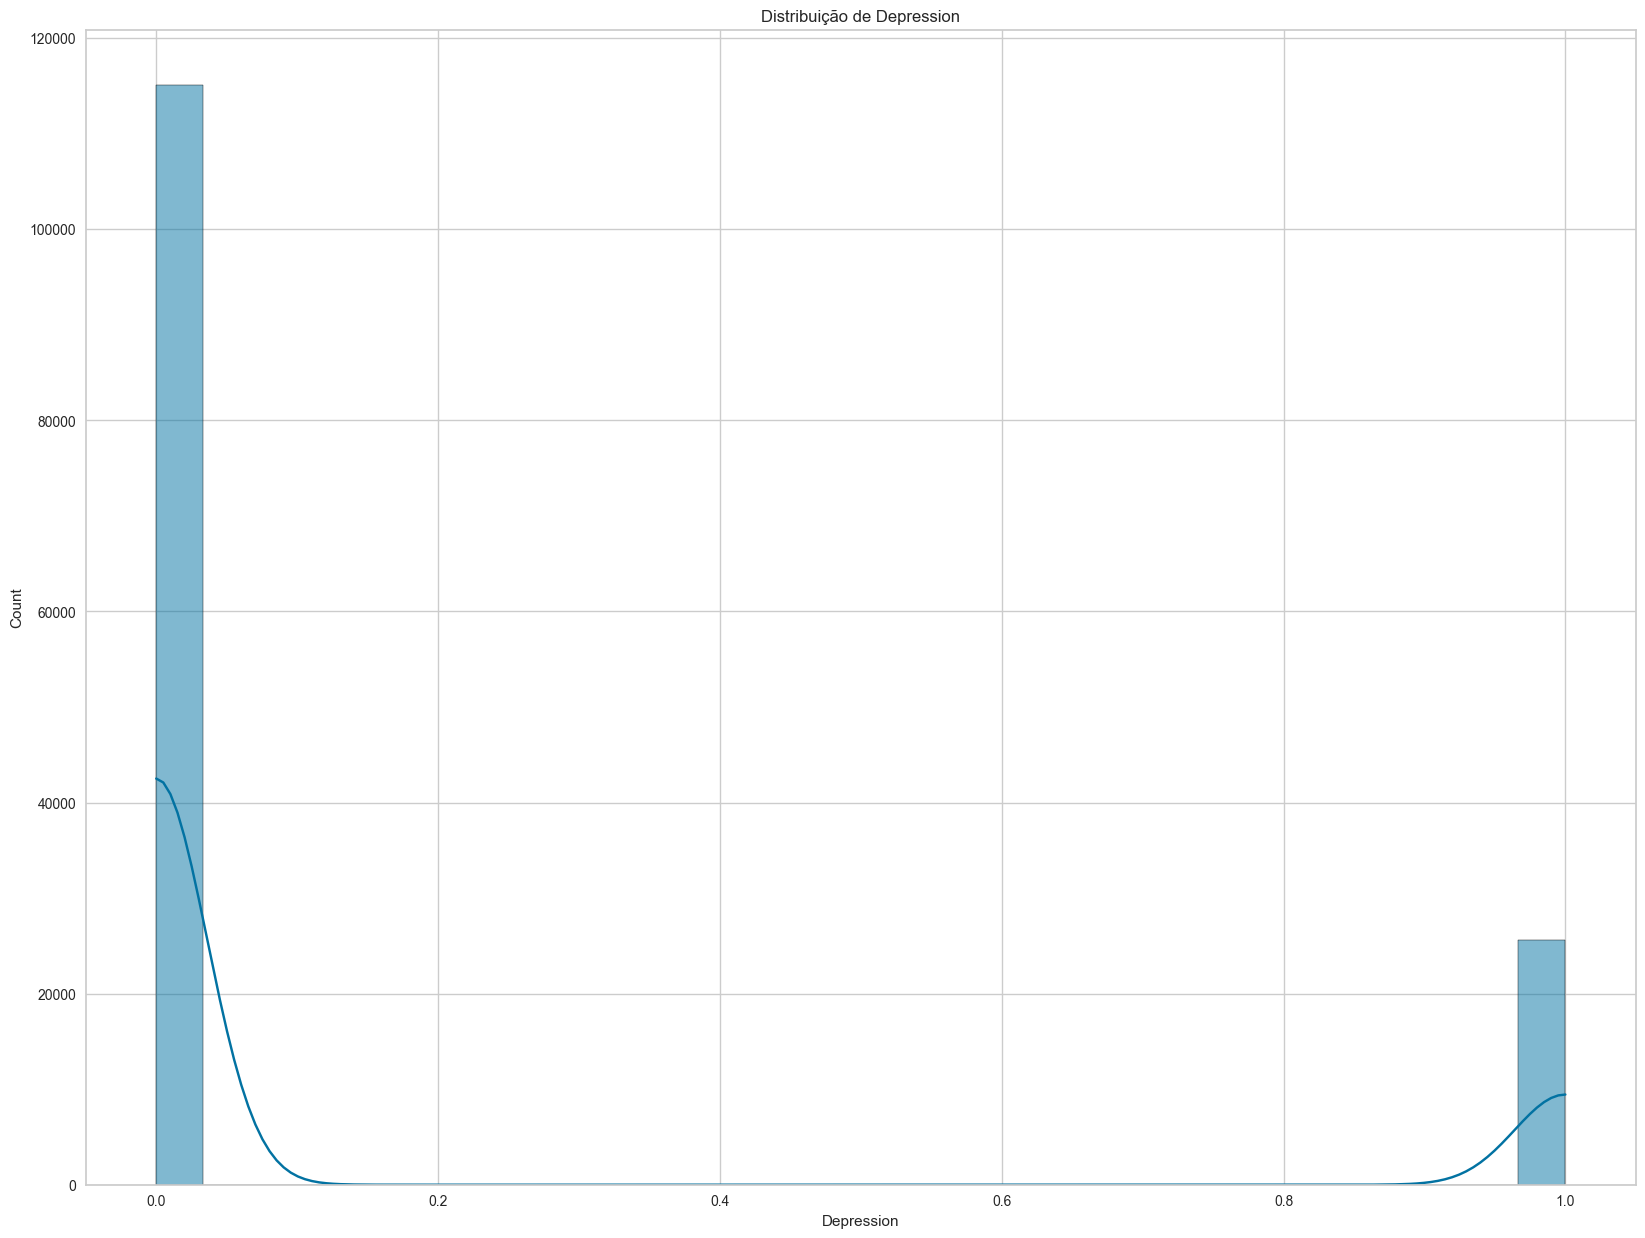

In [9]:
for coluna in df.drop(columns=['id', 'Name', 'City']).columns:
    plt.figure(figsize=(20, 15))
    
    if df[coluna].dtype in ['int64', 'float64']:
        sns.histplot(df[coluna], bins=30, kde=True)
        plt.title(f'Distribuição de {coluna}')
    
    else: 
        sns.countplot(x=df[coluna], order=df[coluna].value_counts().index)
        plt.xticks(rotation=90) 
        plt.title(f'Distribuição de {coluna}')
    
    plt.show()

<Figure size 2000x1500 with 0 Axes>

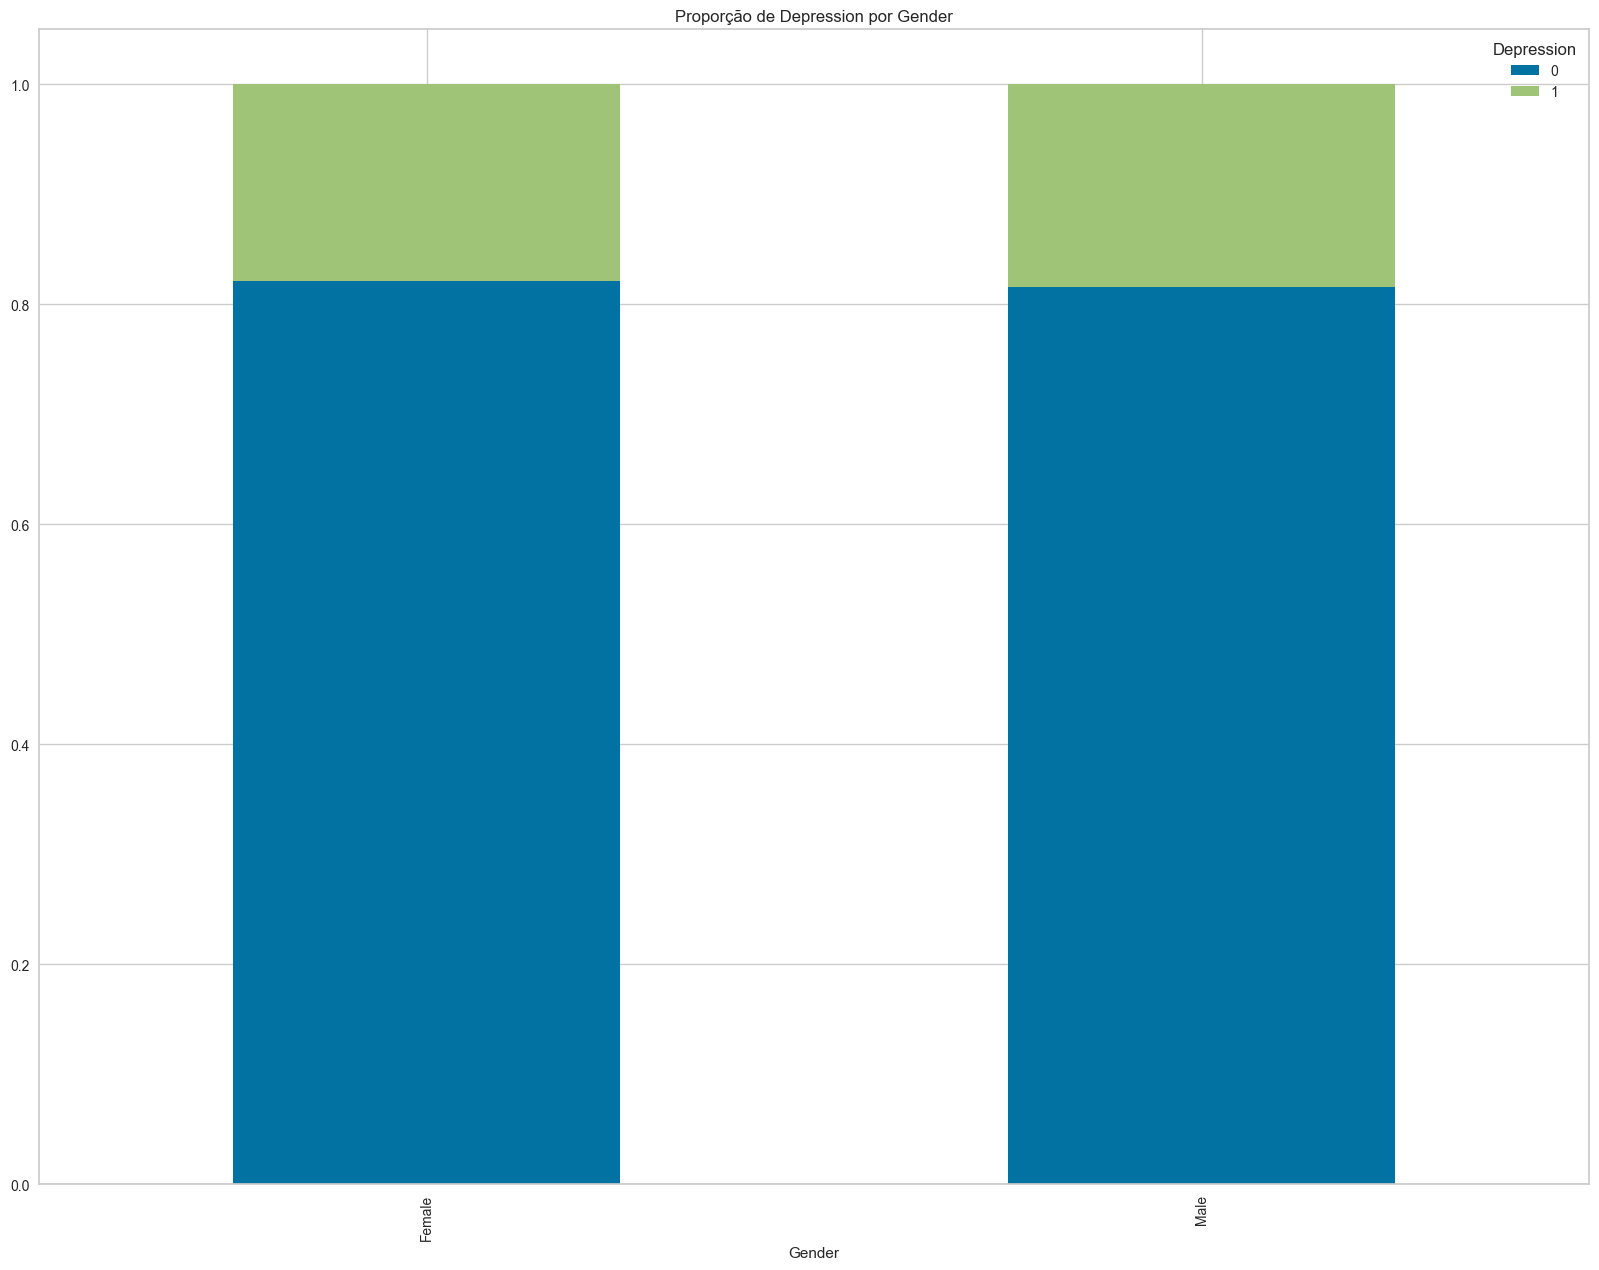

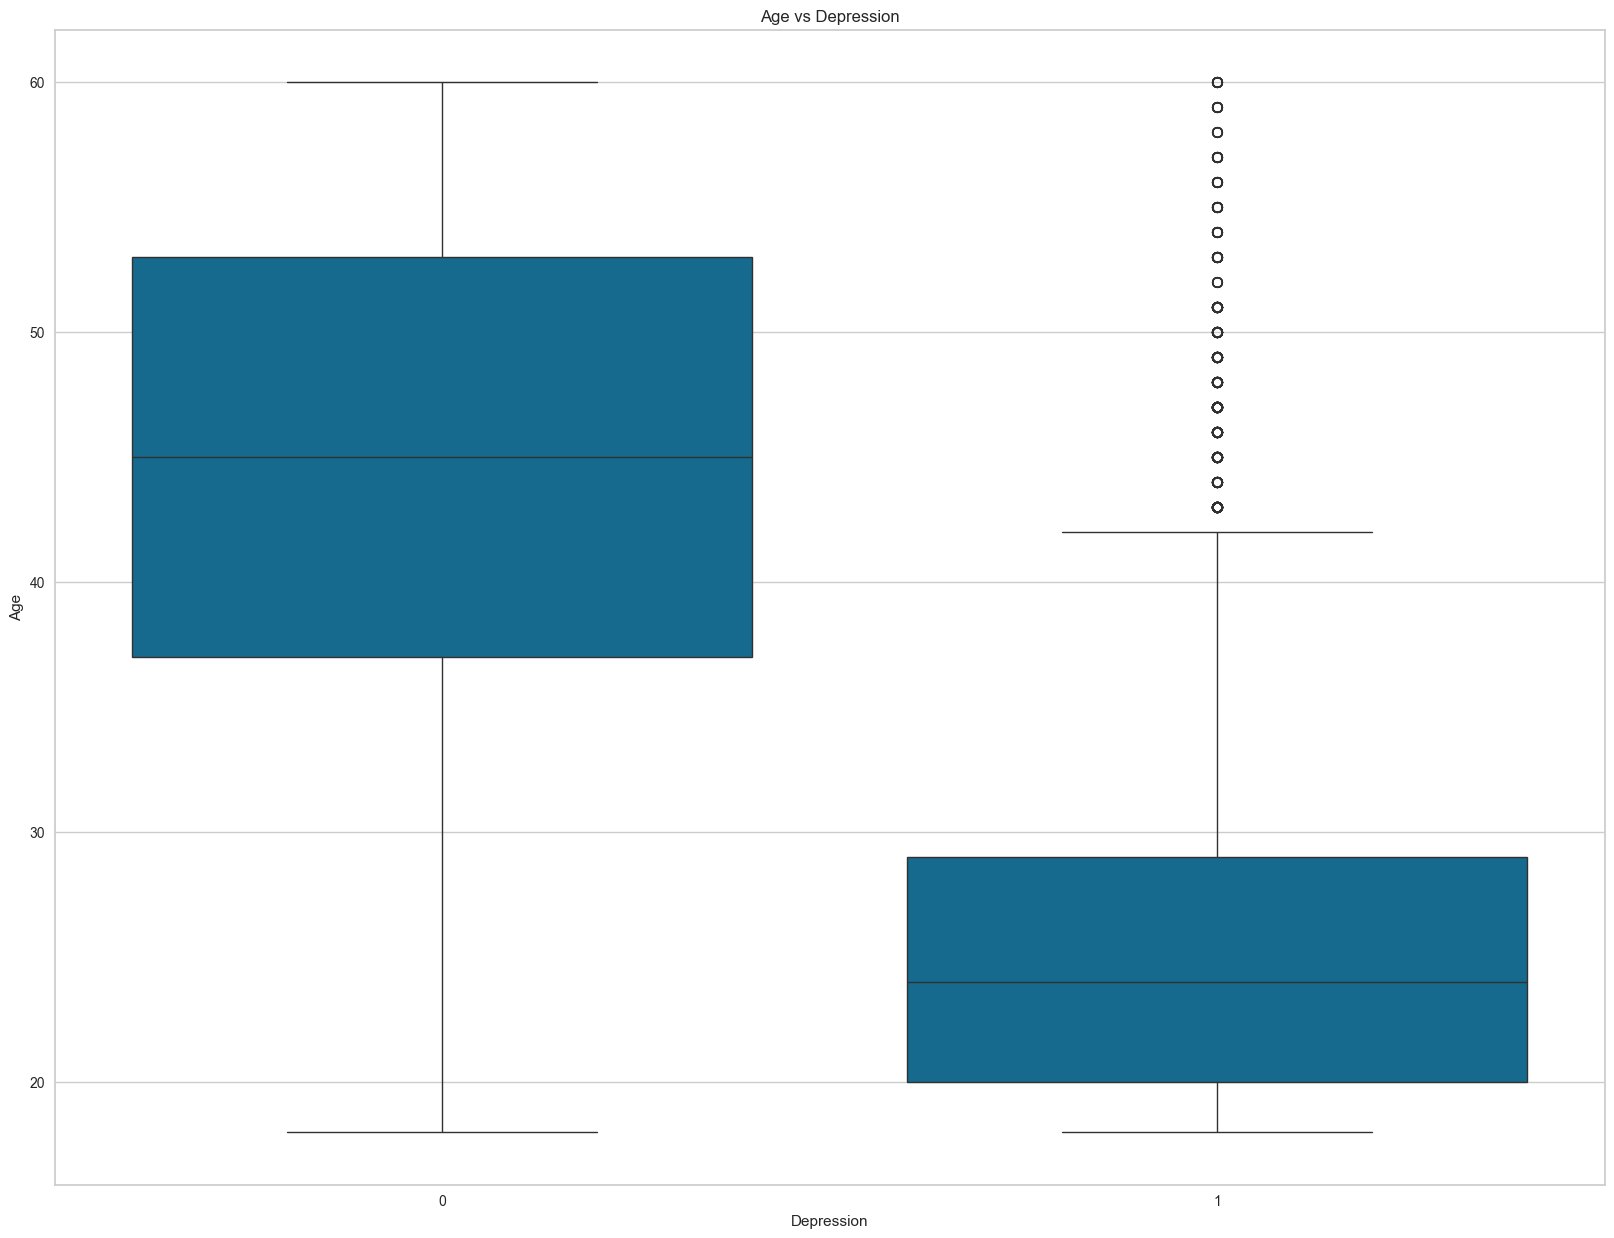

<Figure size 2000x1500 with 0 Axes>

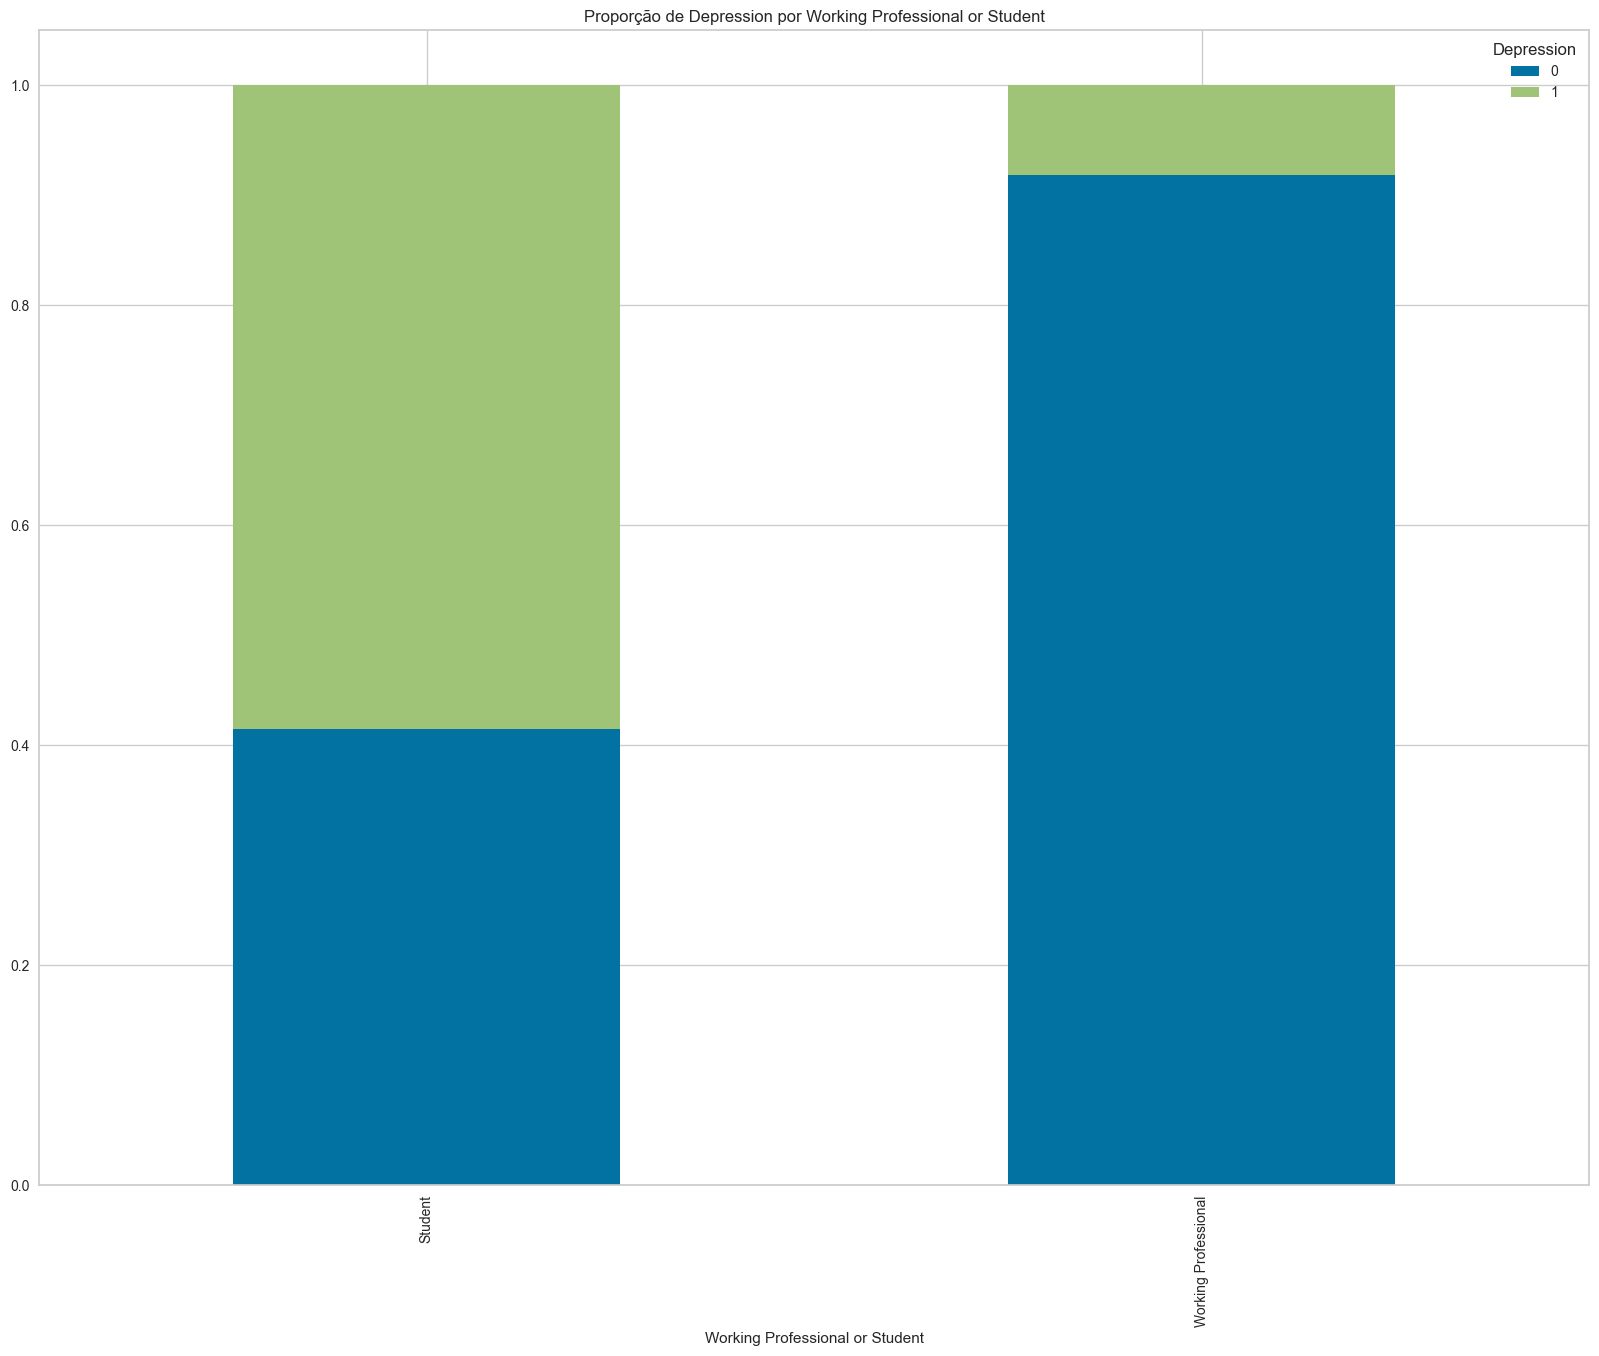

<Figure size 2000x1500 with 0 Axes>

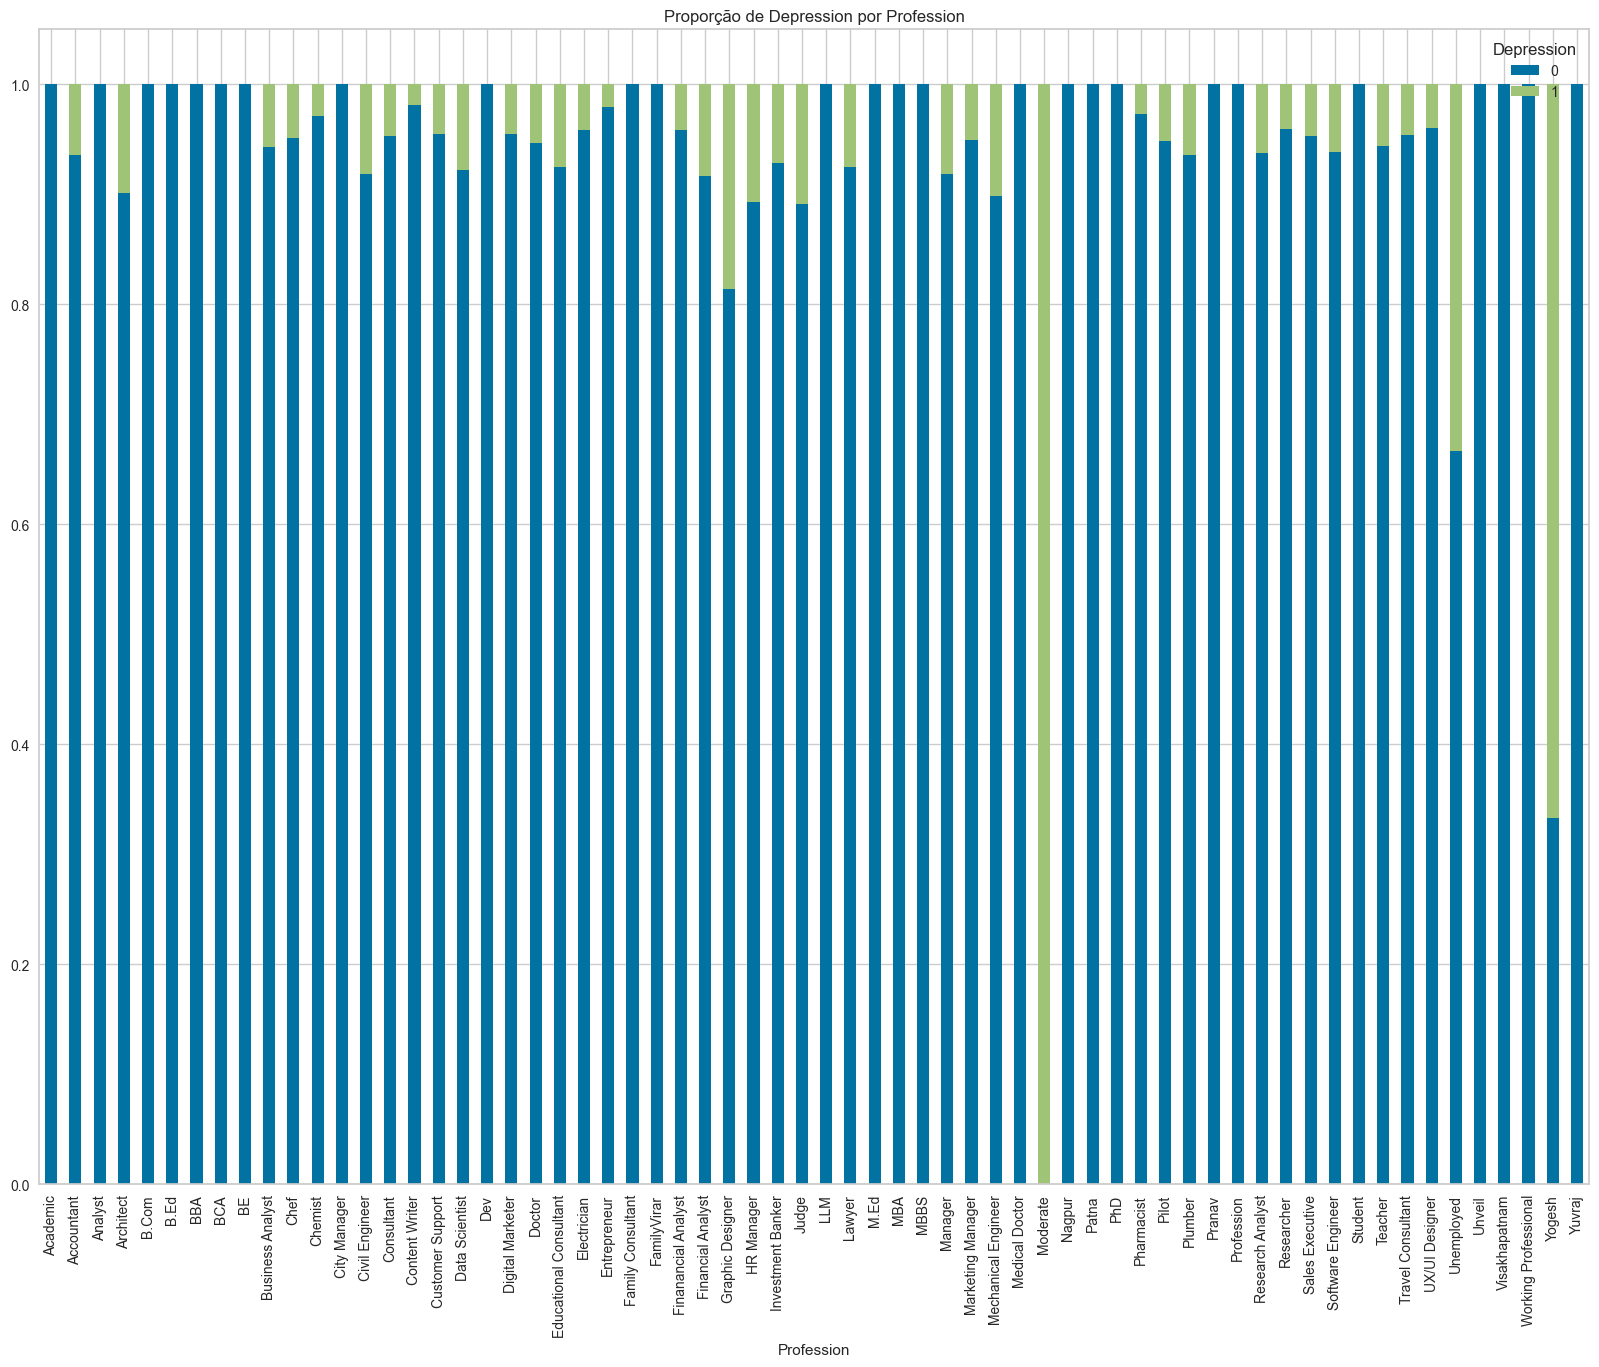

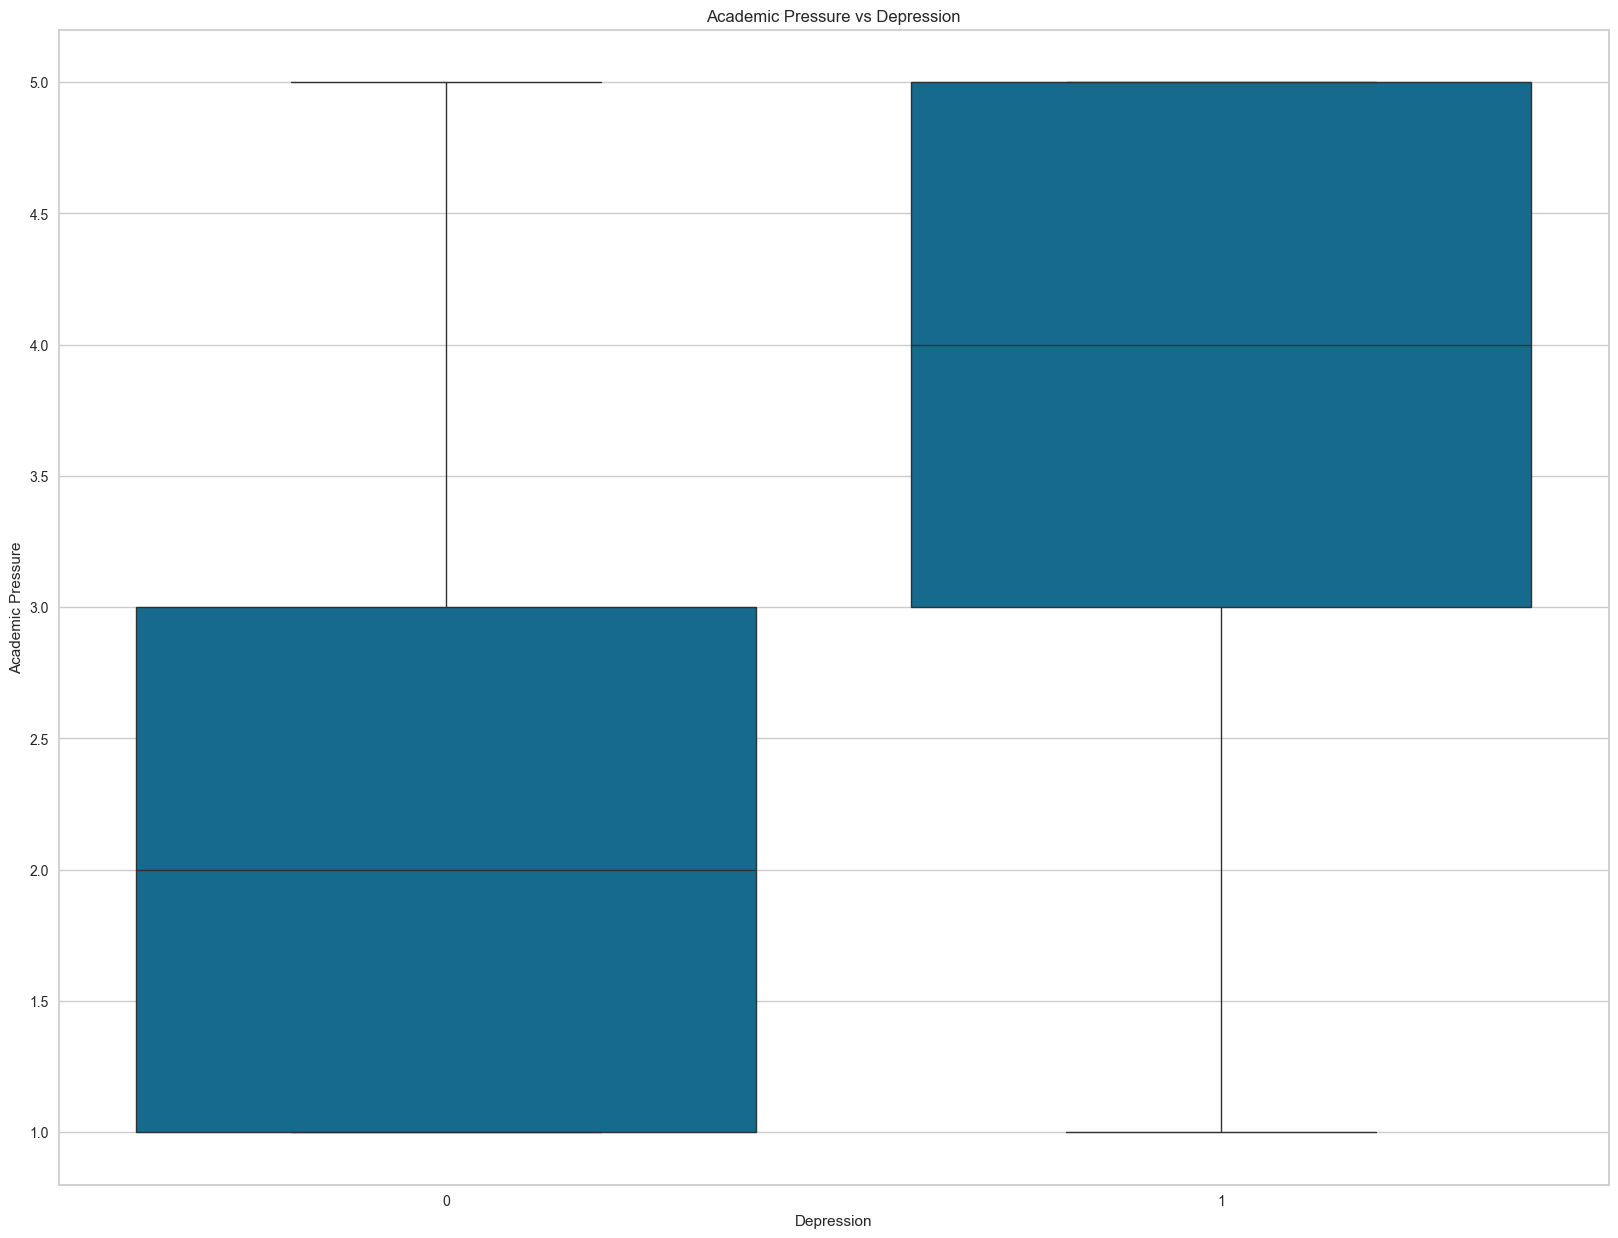

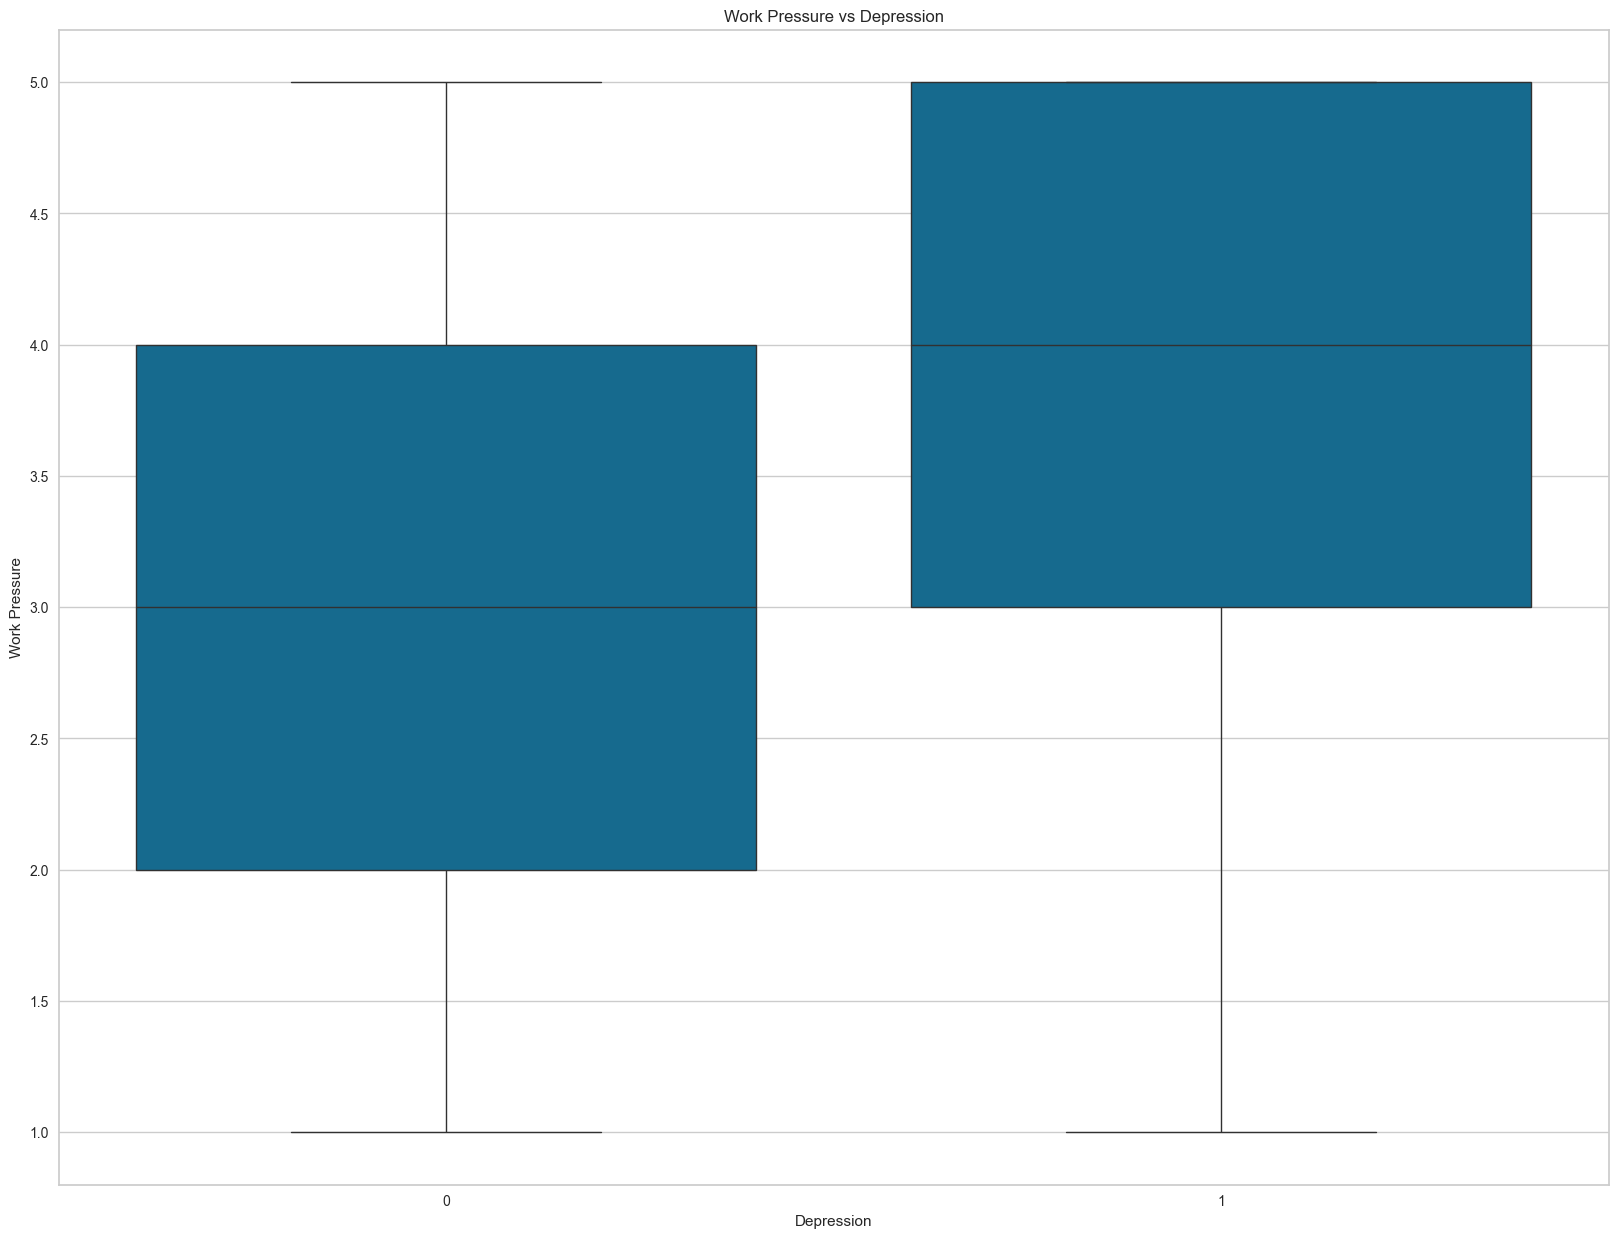

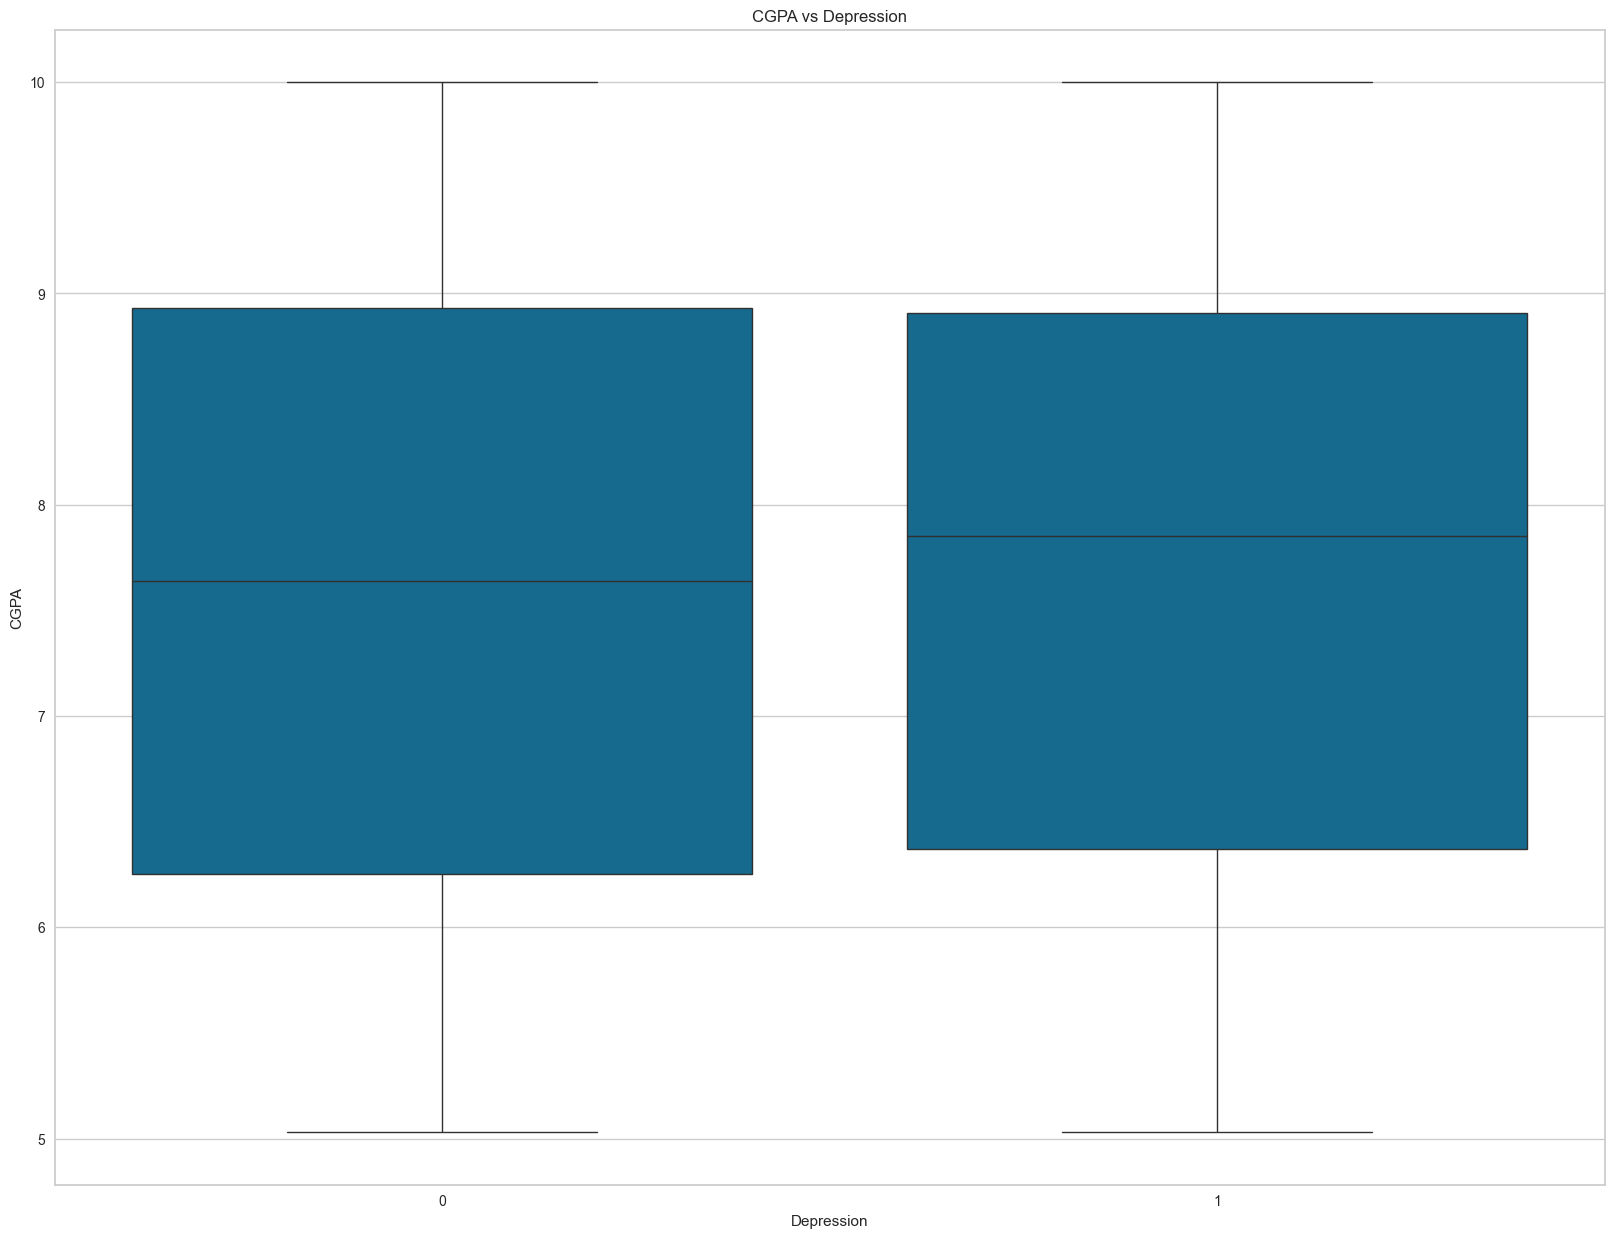

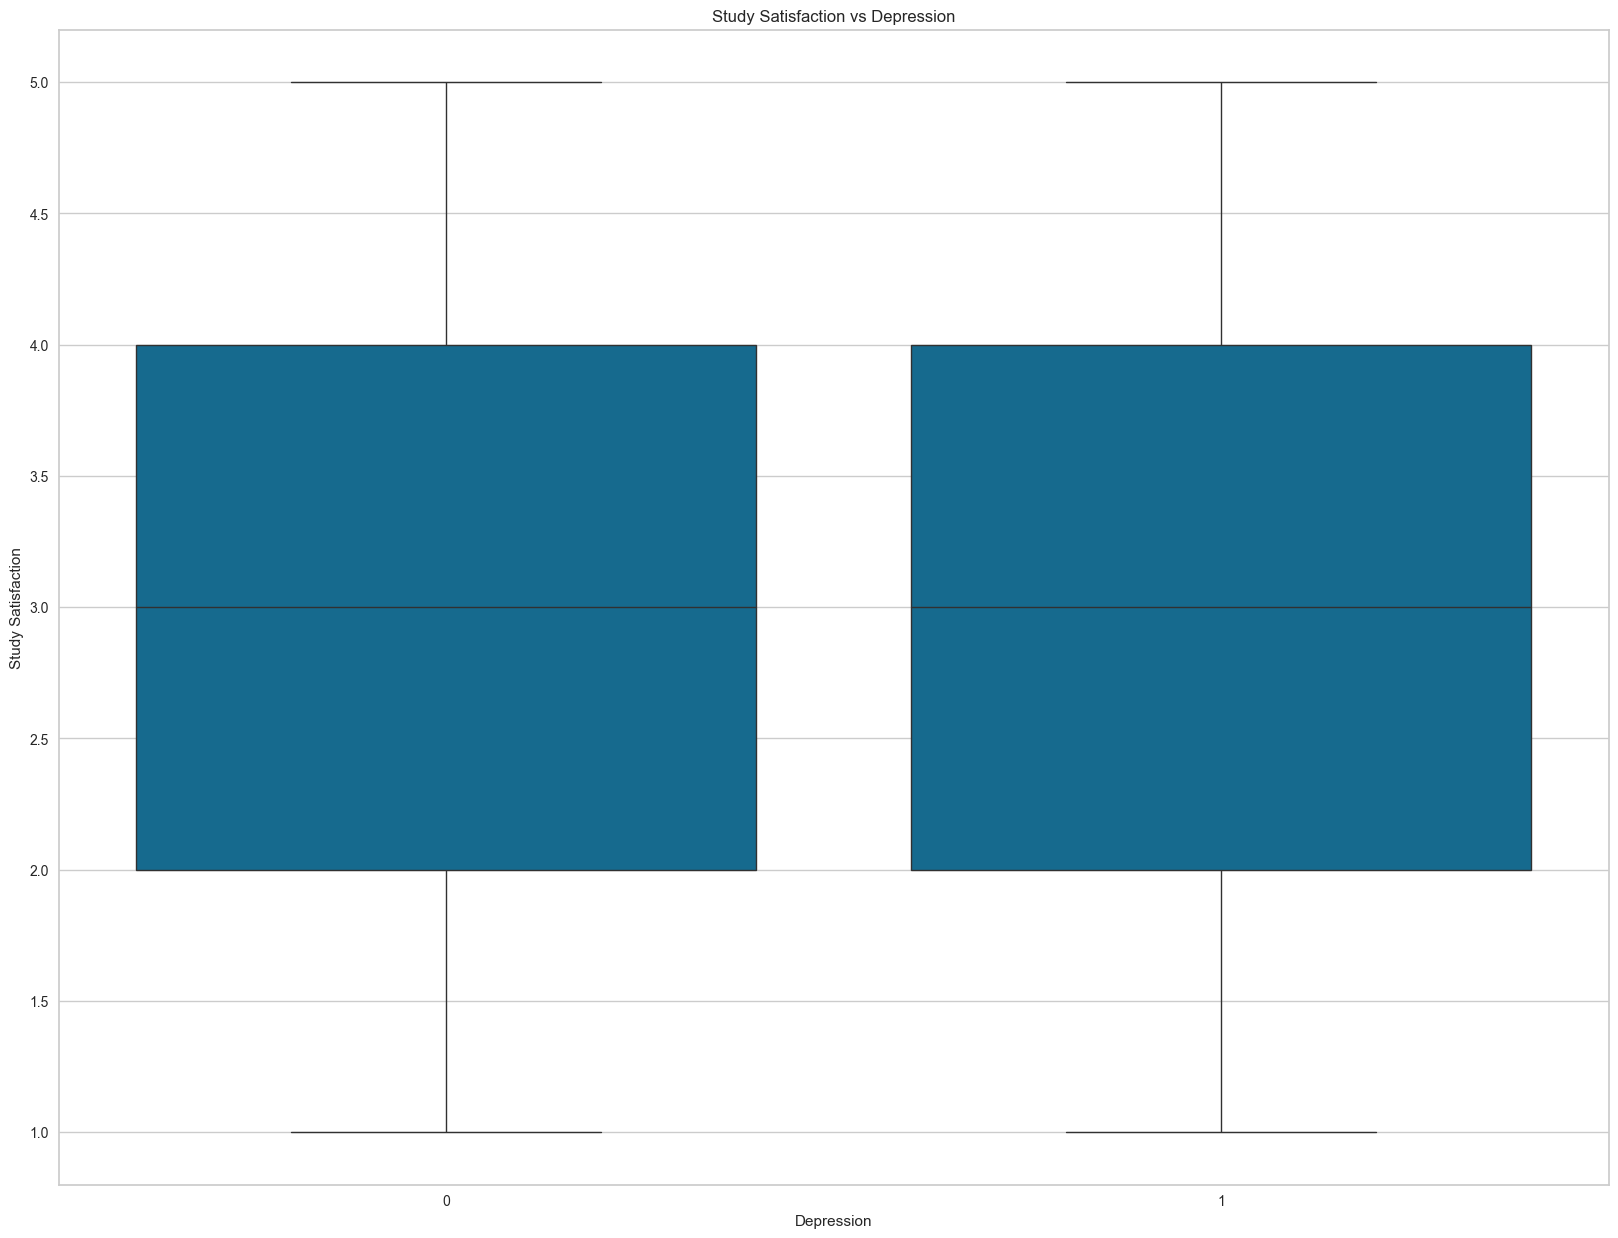

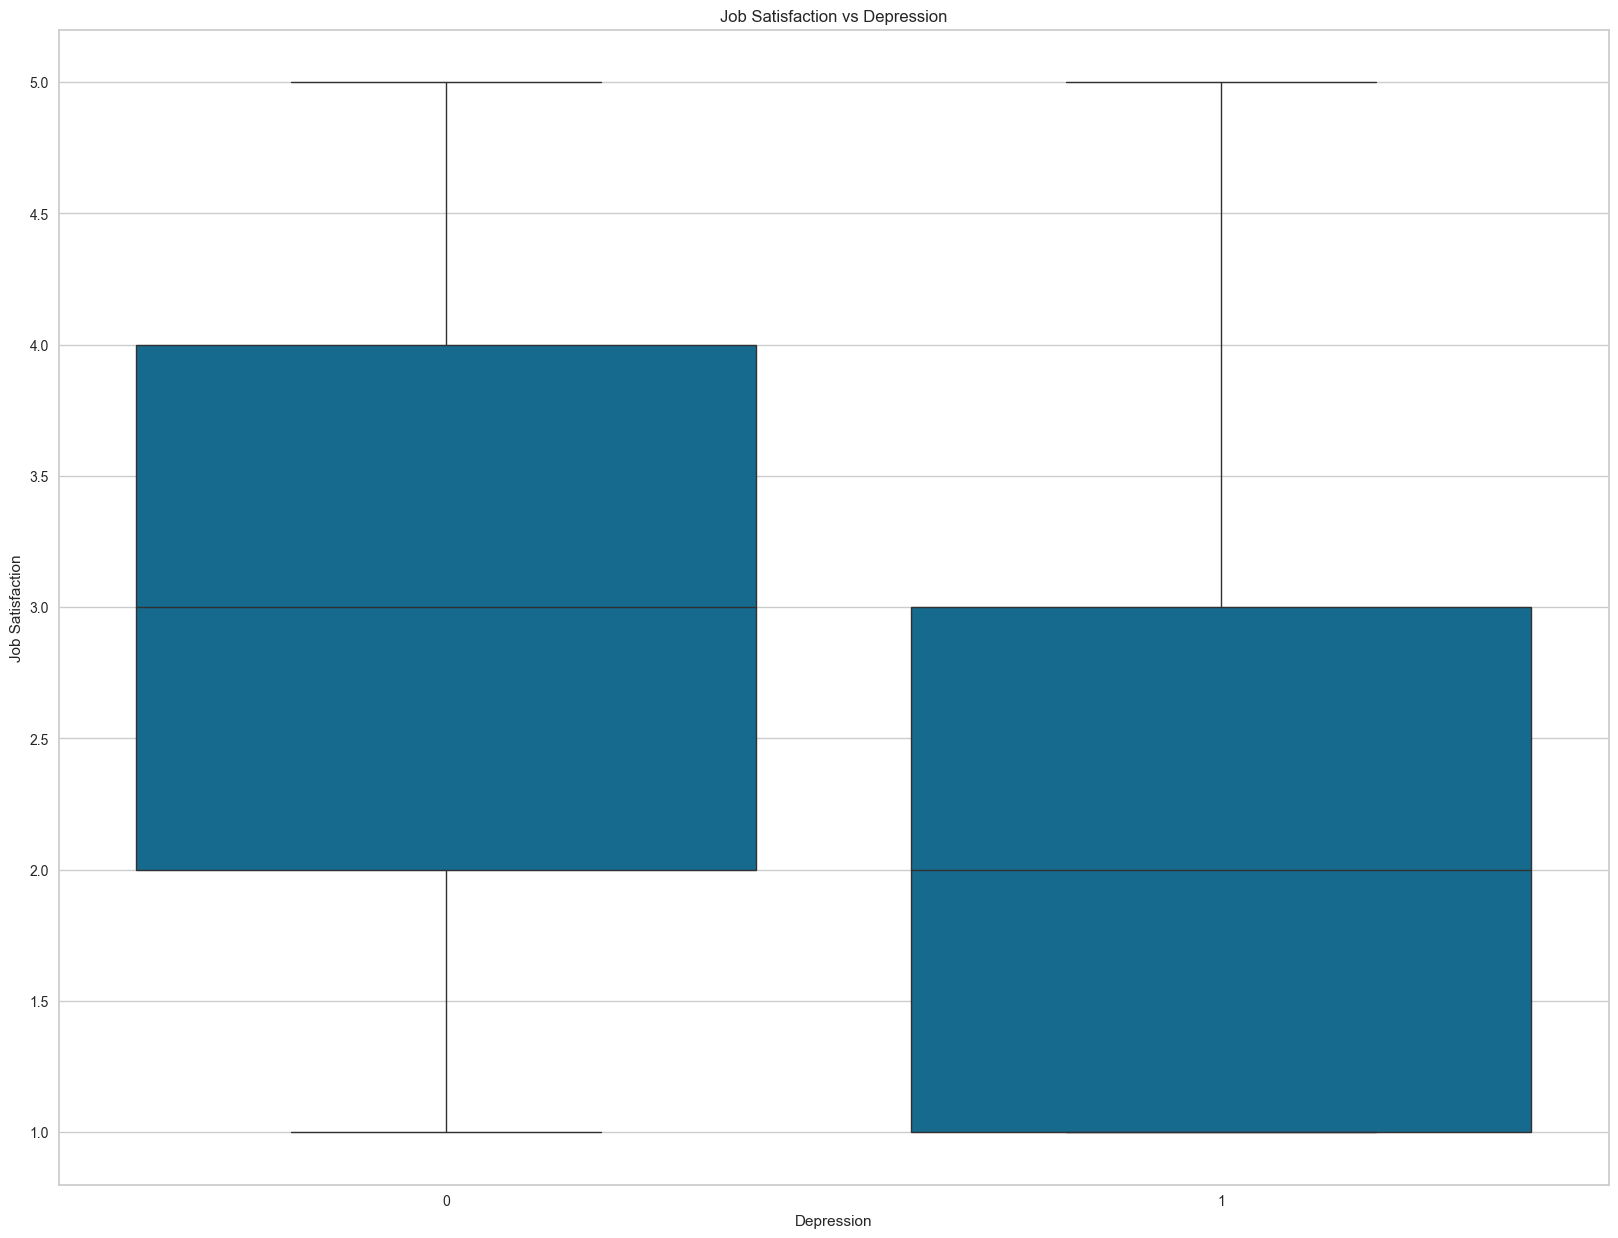

<Figure size 2000x1500 with 0 Axes>

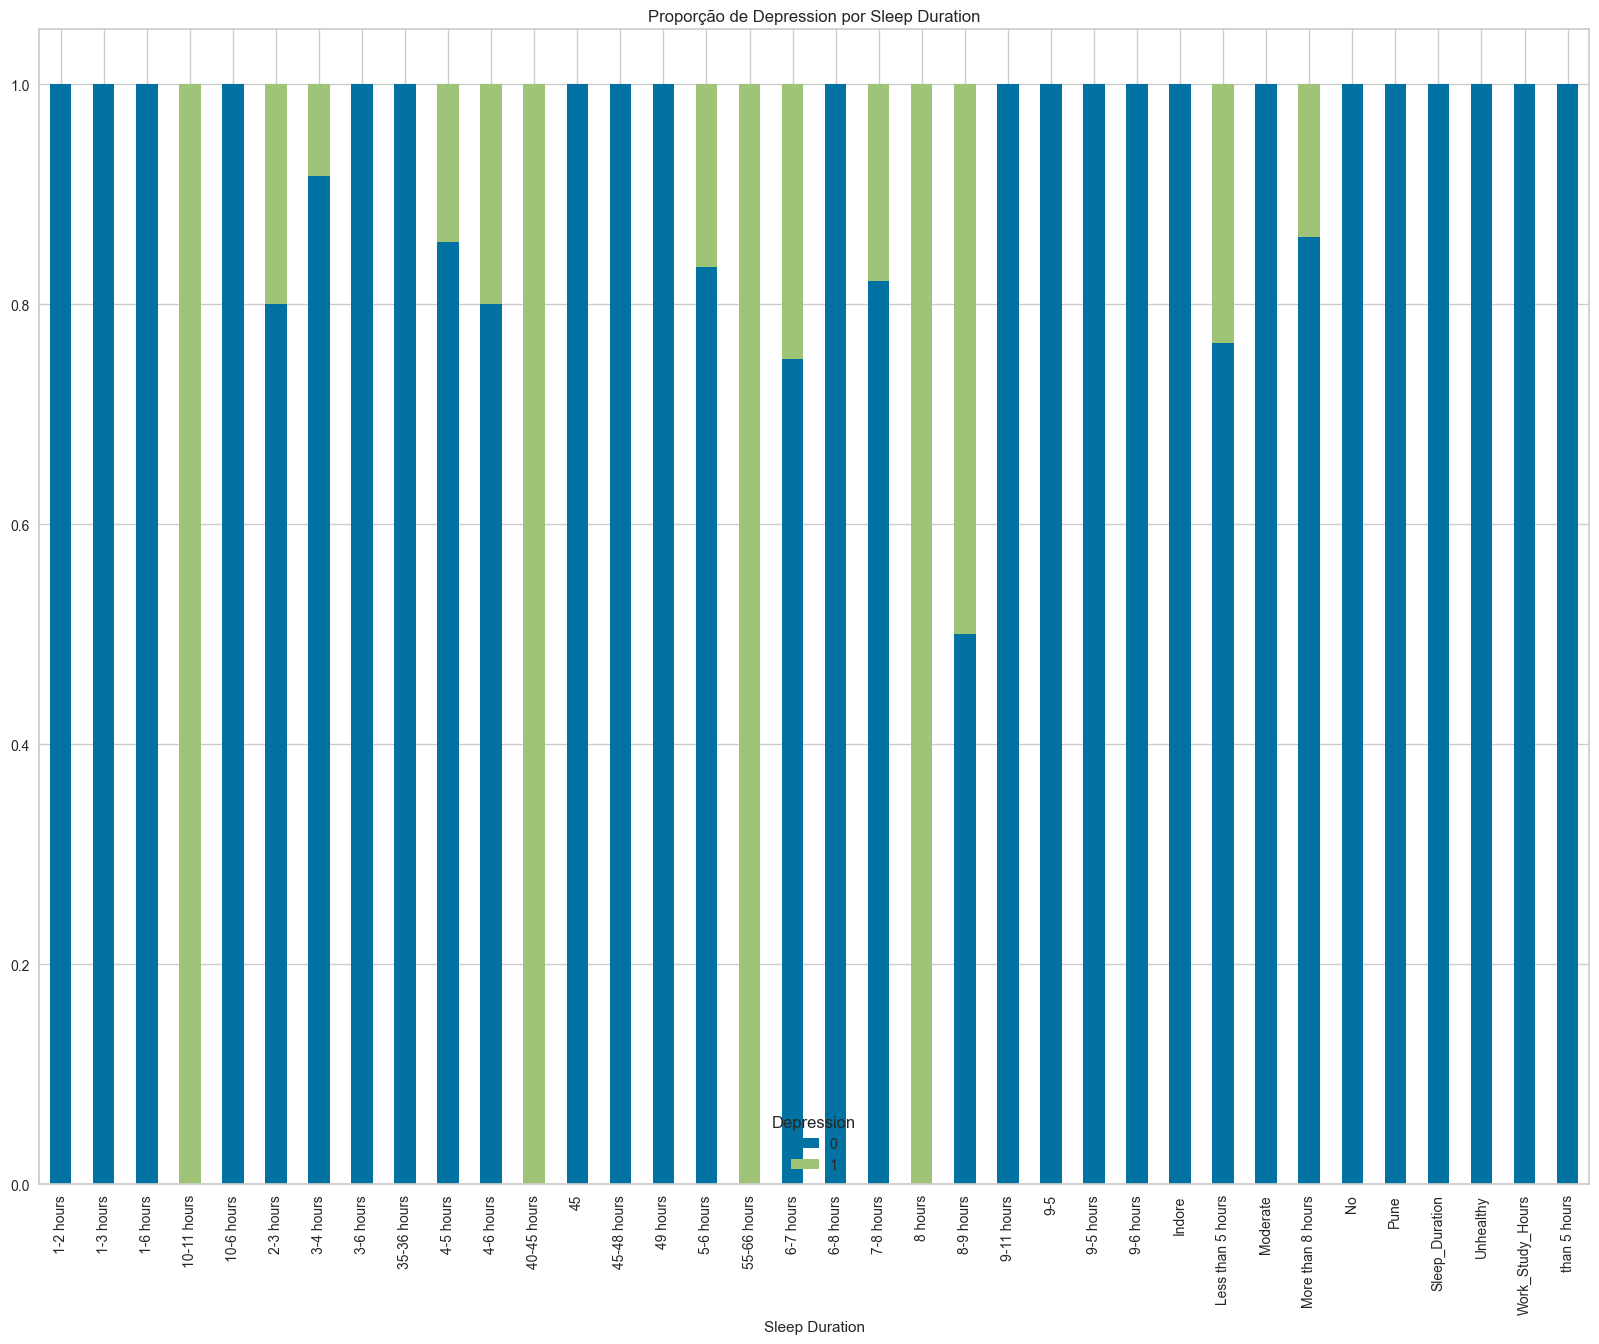

<Figure size 2000x1500 with 0 Axes>

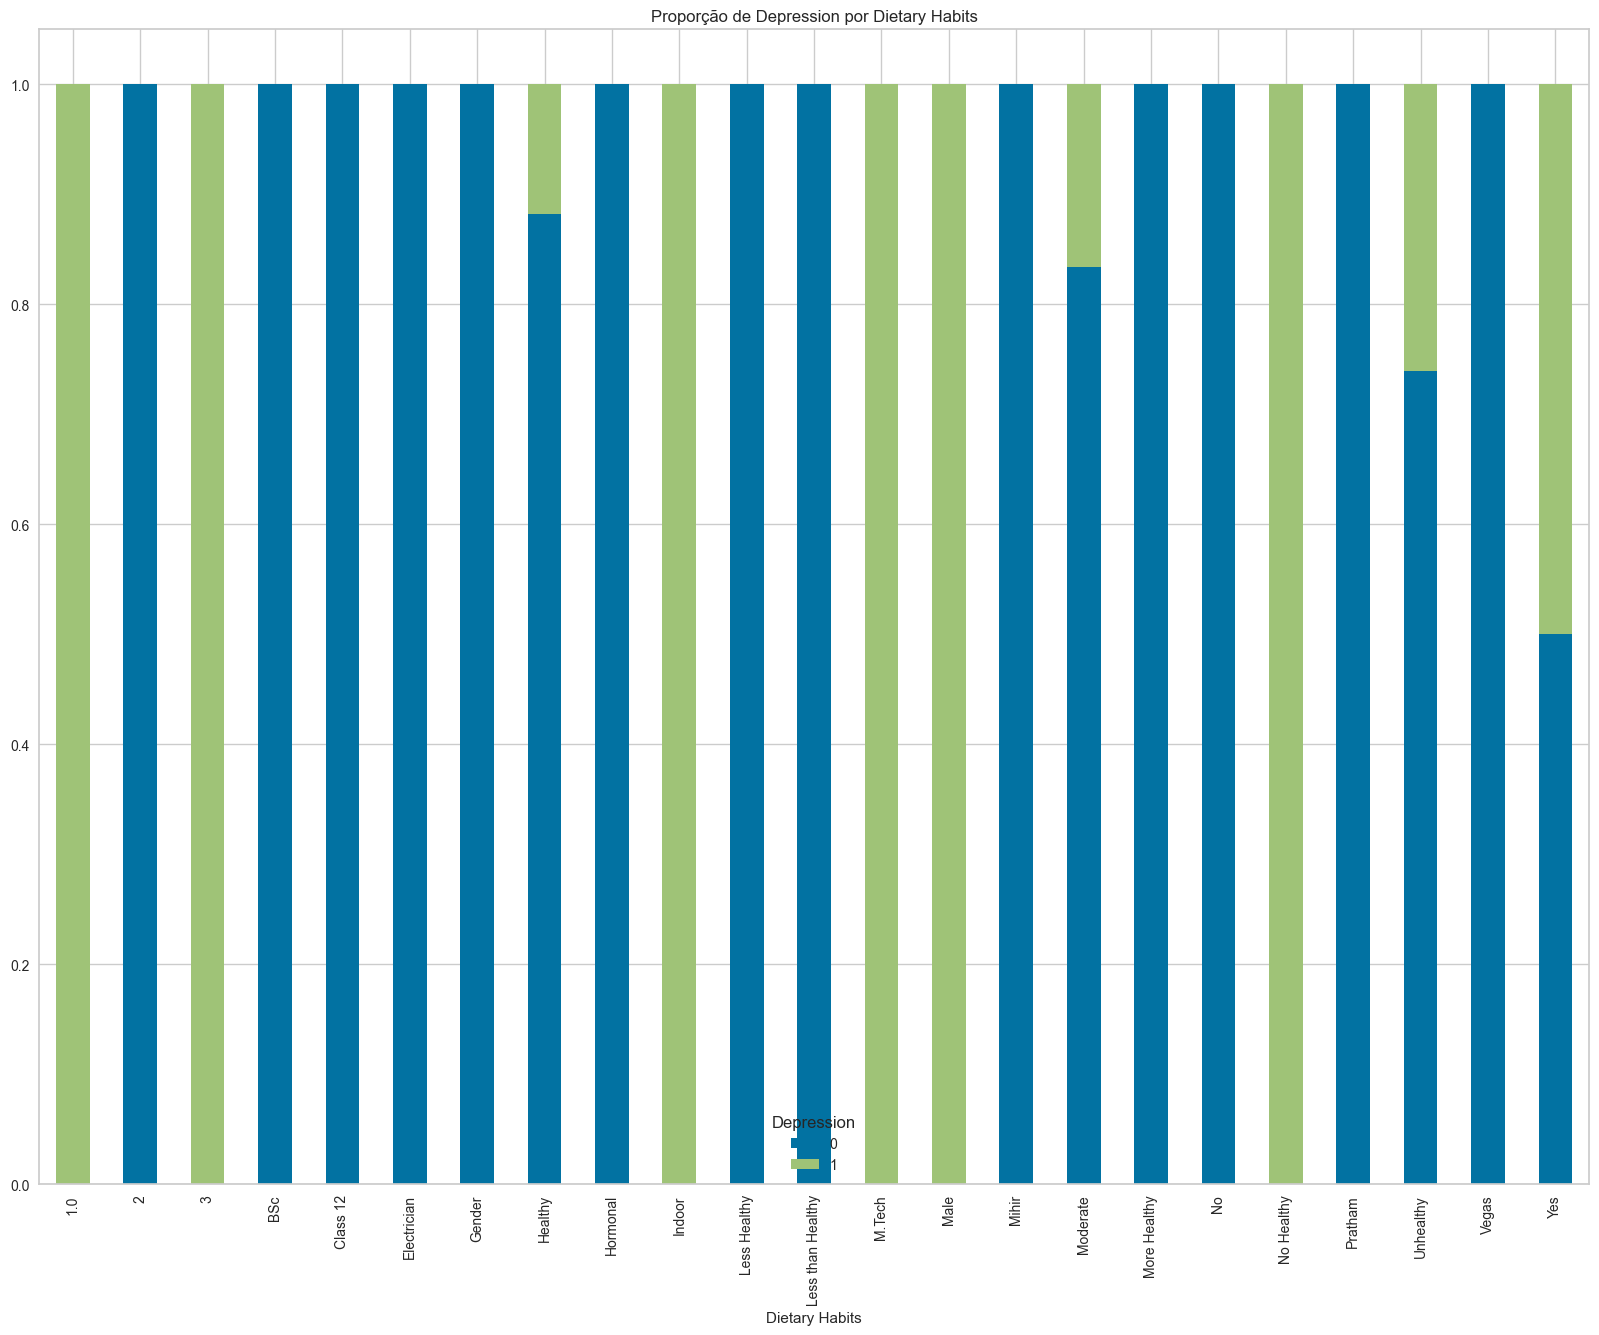

<Figure size 2000x1500 with 0 Axes>

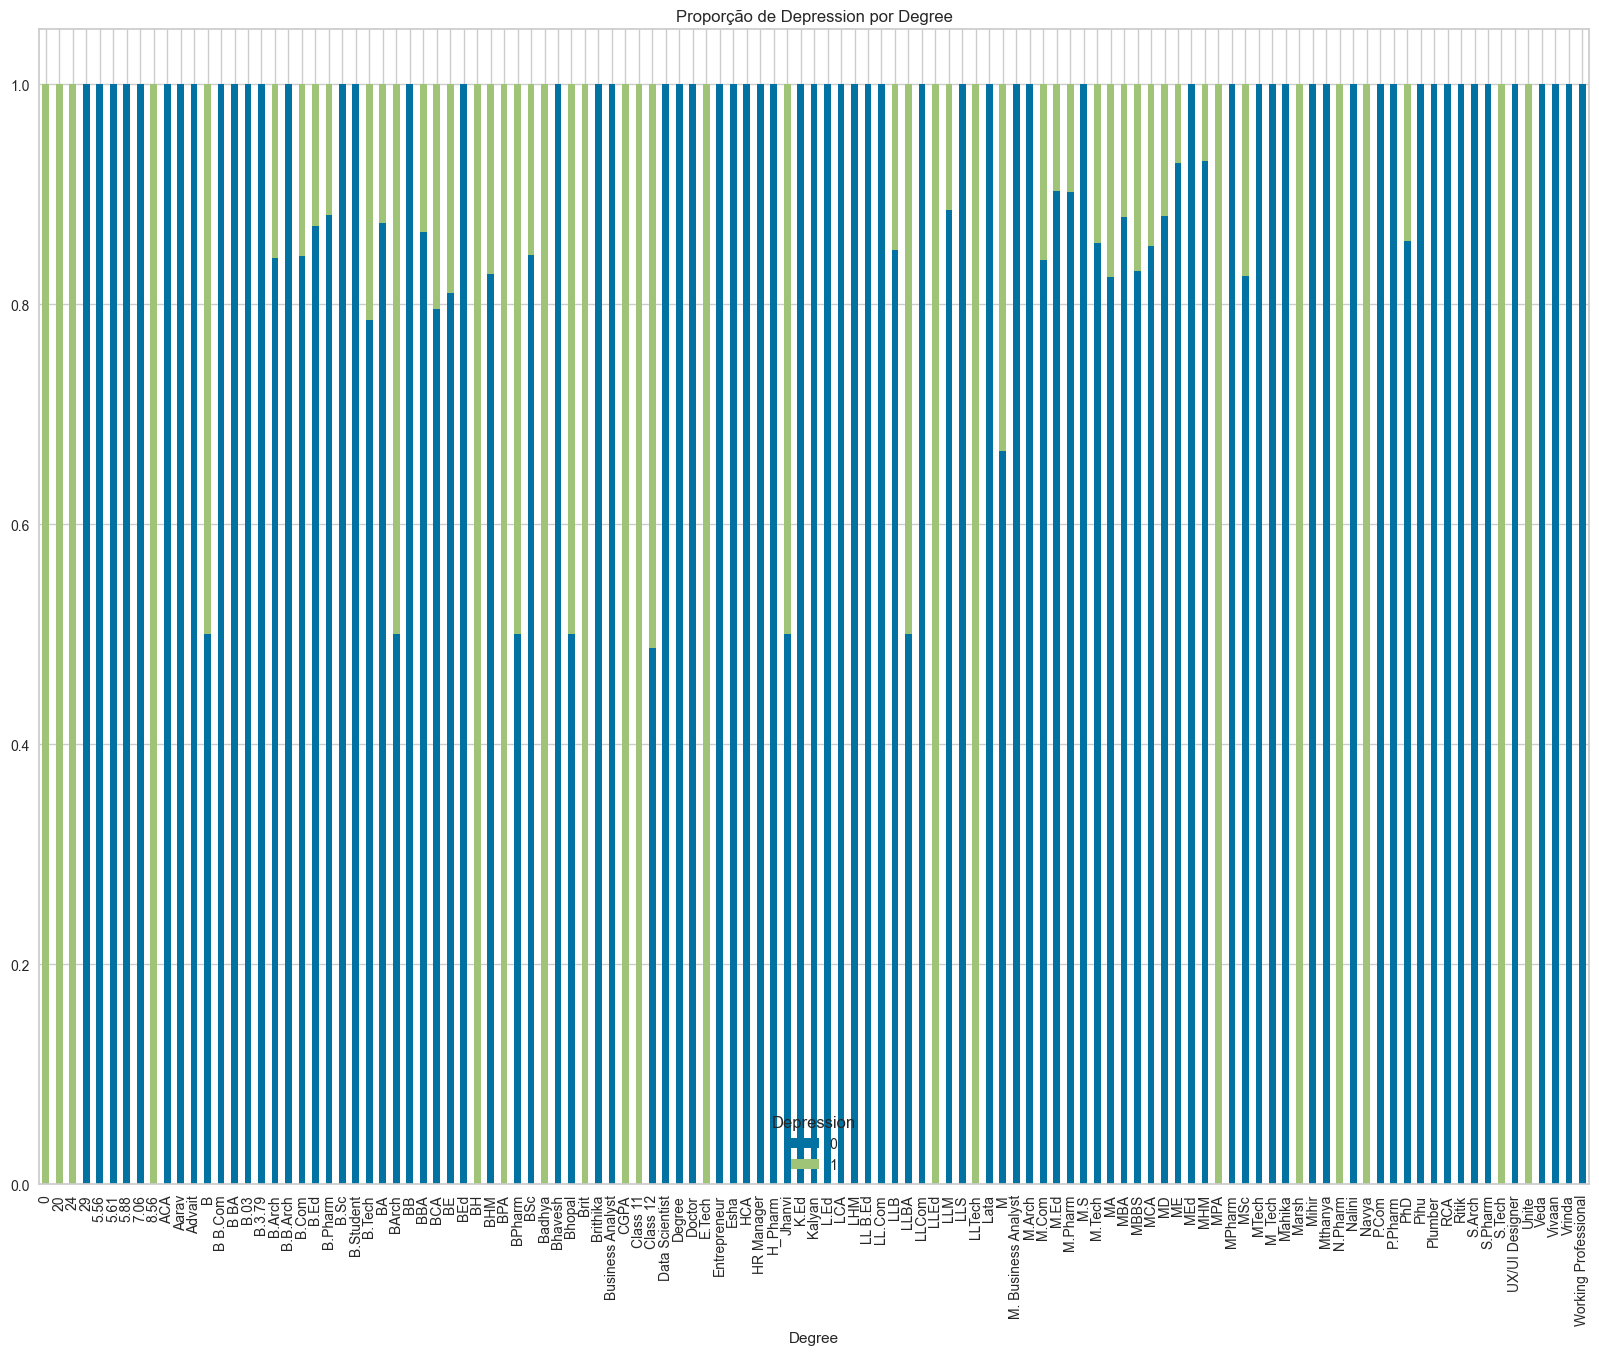

<Figure size 2000x1500 with 0 Axes>

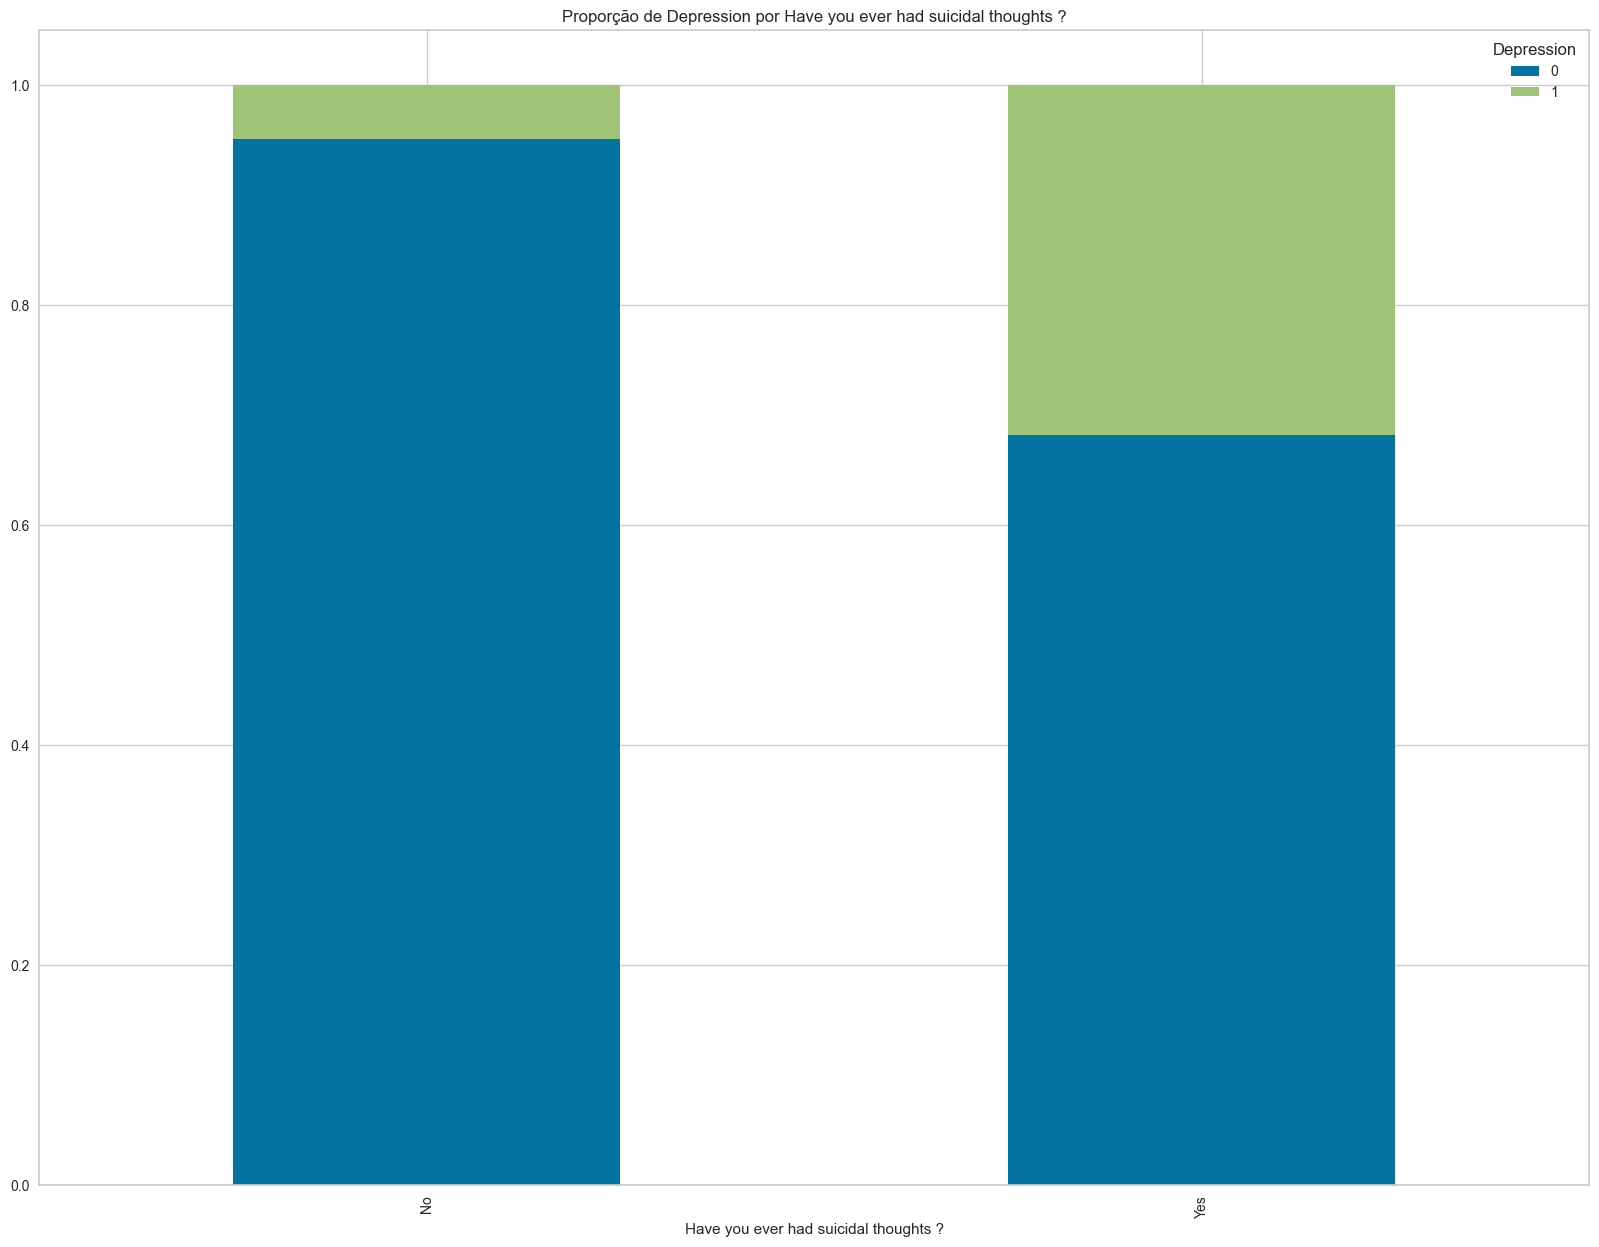

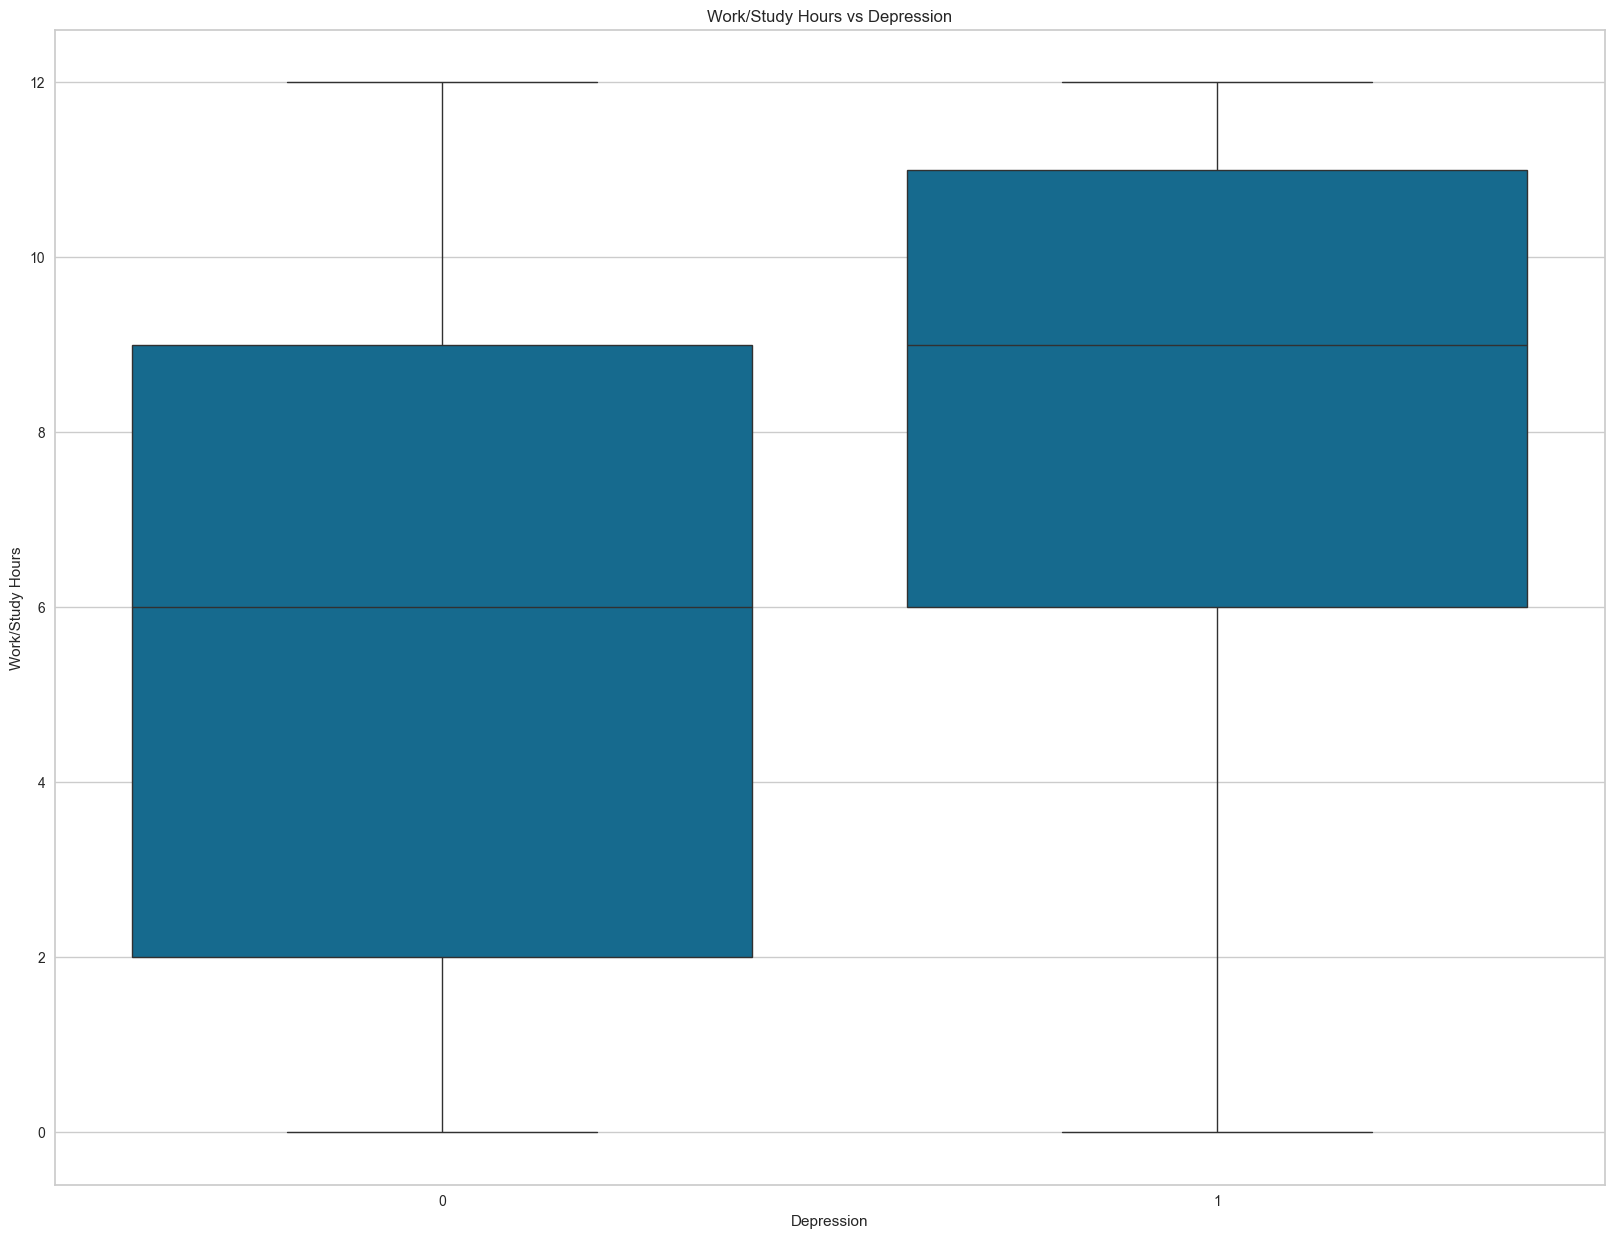

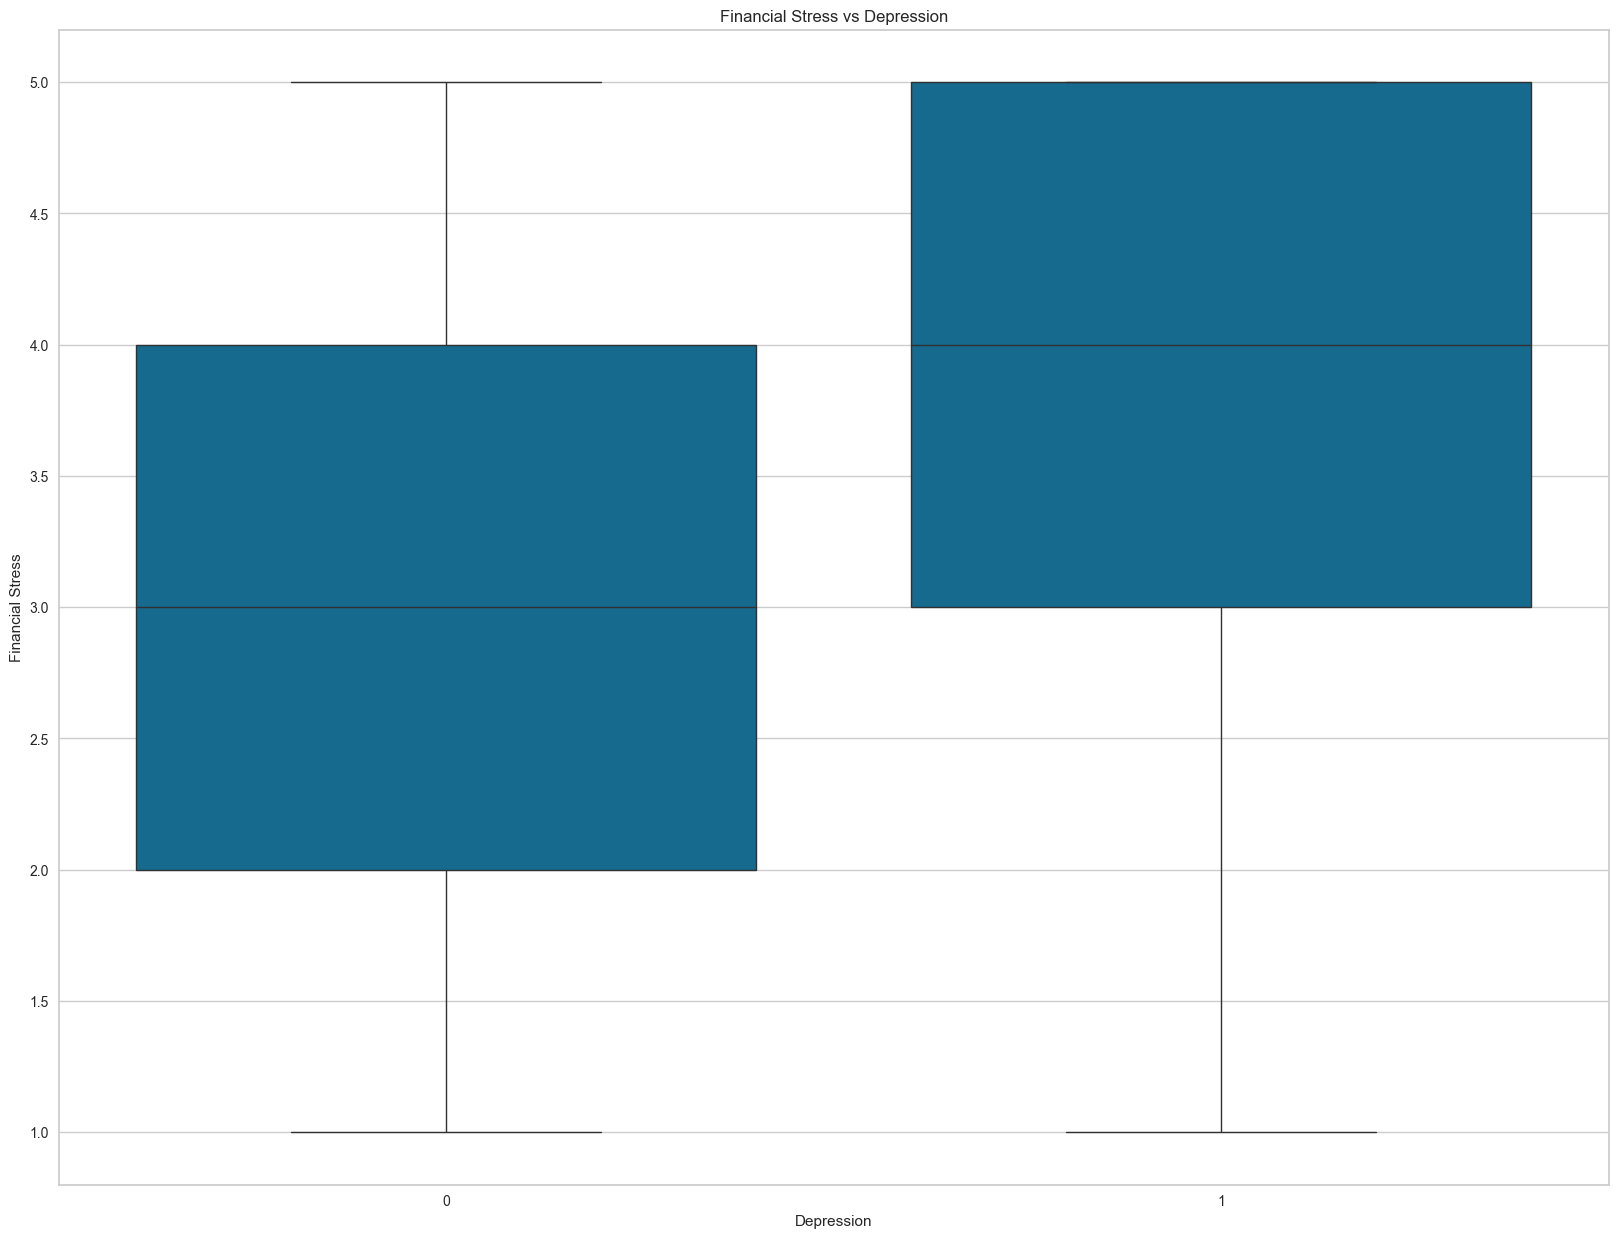

<Figure size 2000x1500 with 0 Axes>

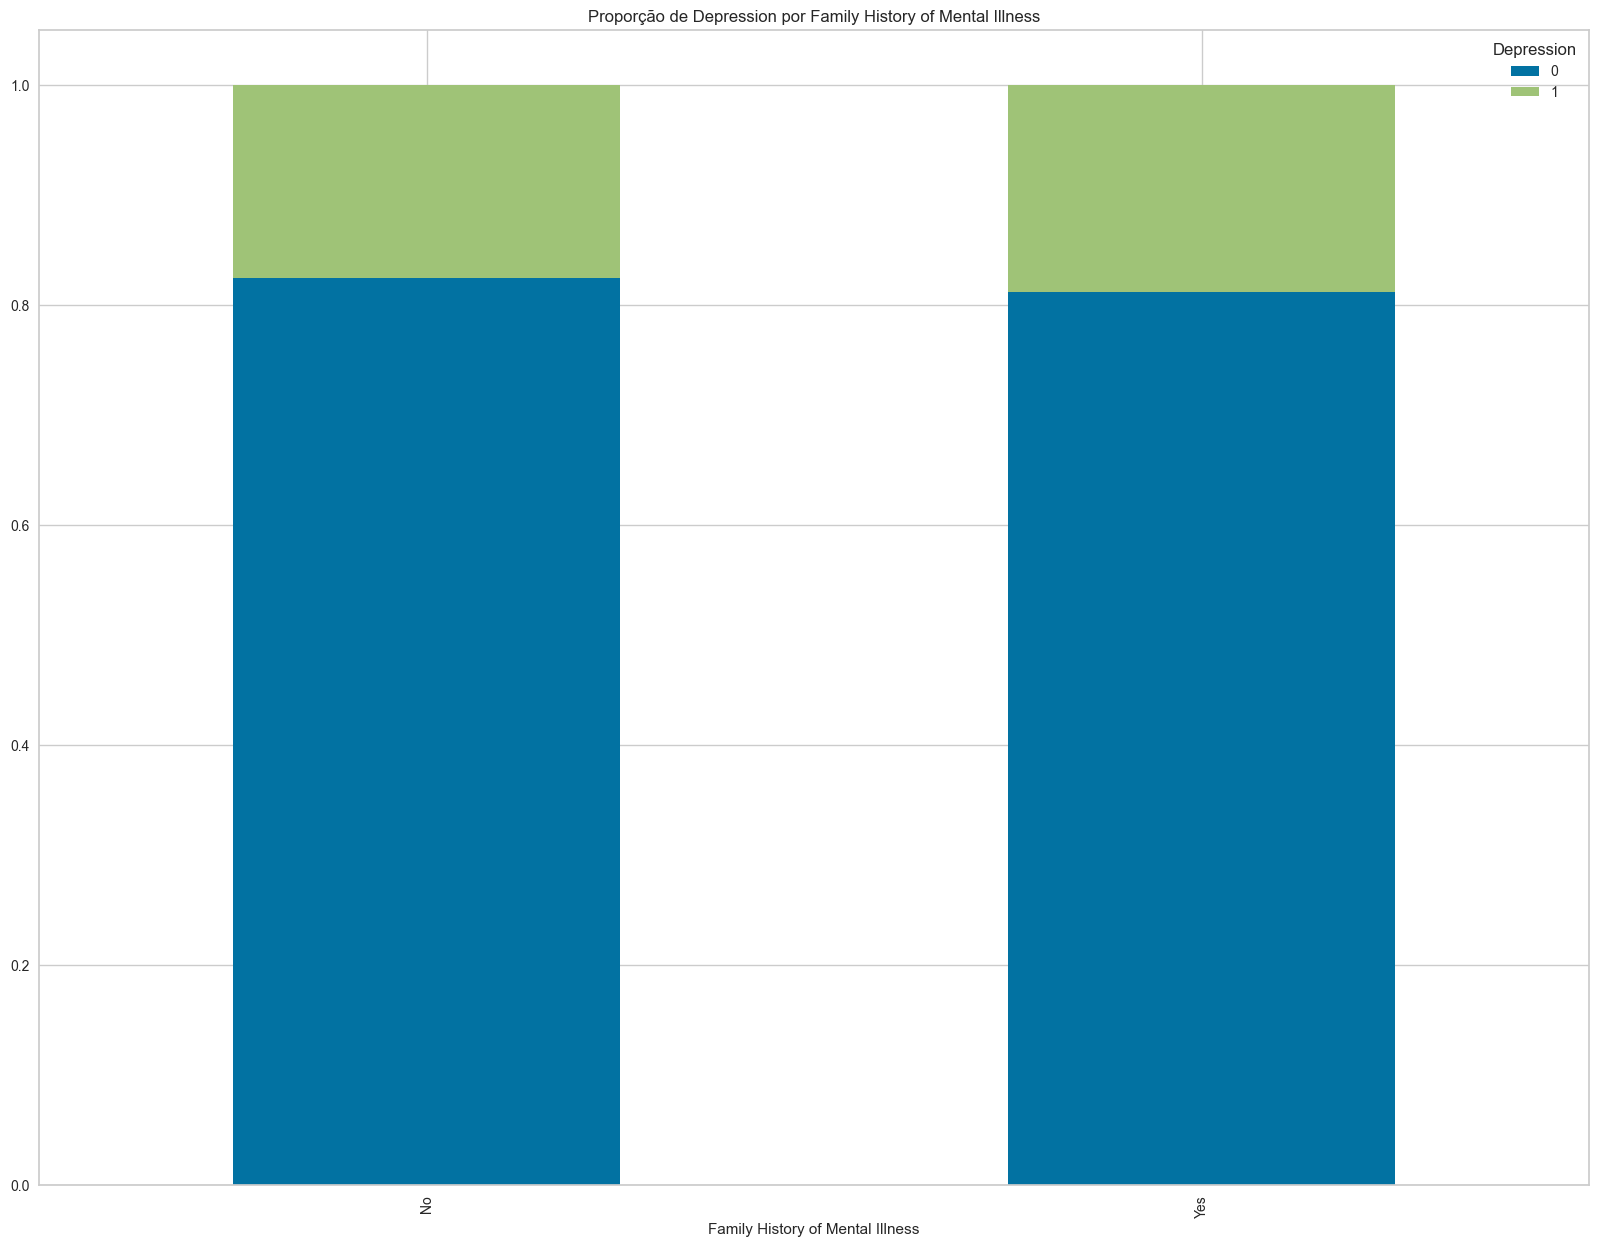

In [10]:
for coluna in df.drop(columns=['id', 'Name', 'City']).columns:
    if coluna == 'Depression':
        continue

    plt.figure(figsize=(20, 15))
    
    if df[coluna].dtype in ['int64', 'float64']:  
        sns.boxplot(x=df['Depression'], y=df[coluna])
        plt.title(f'{coluna} vs Depression')
    
    else:  
        prop_df = df.groupby(coluna)['Depression'].value_counts(normalize=True).unstack()
        prop_df.plot(kind='bar', stacked=True, figsize=(20, 15))
        plt.title(f'Proporção de Depression por {coluna}')
    
    plt.show()

### Analisando outliers

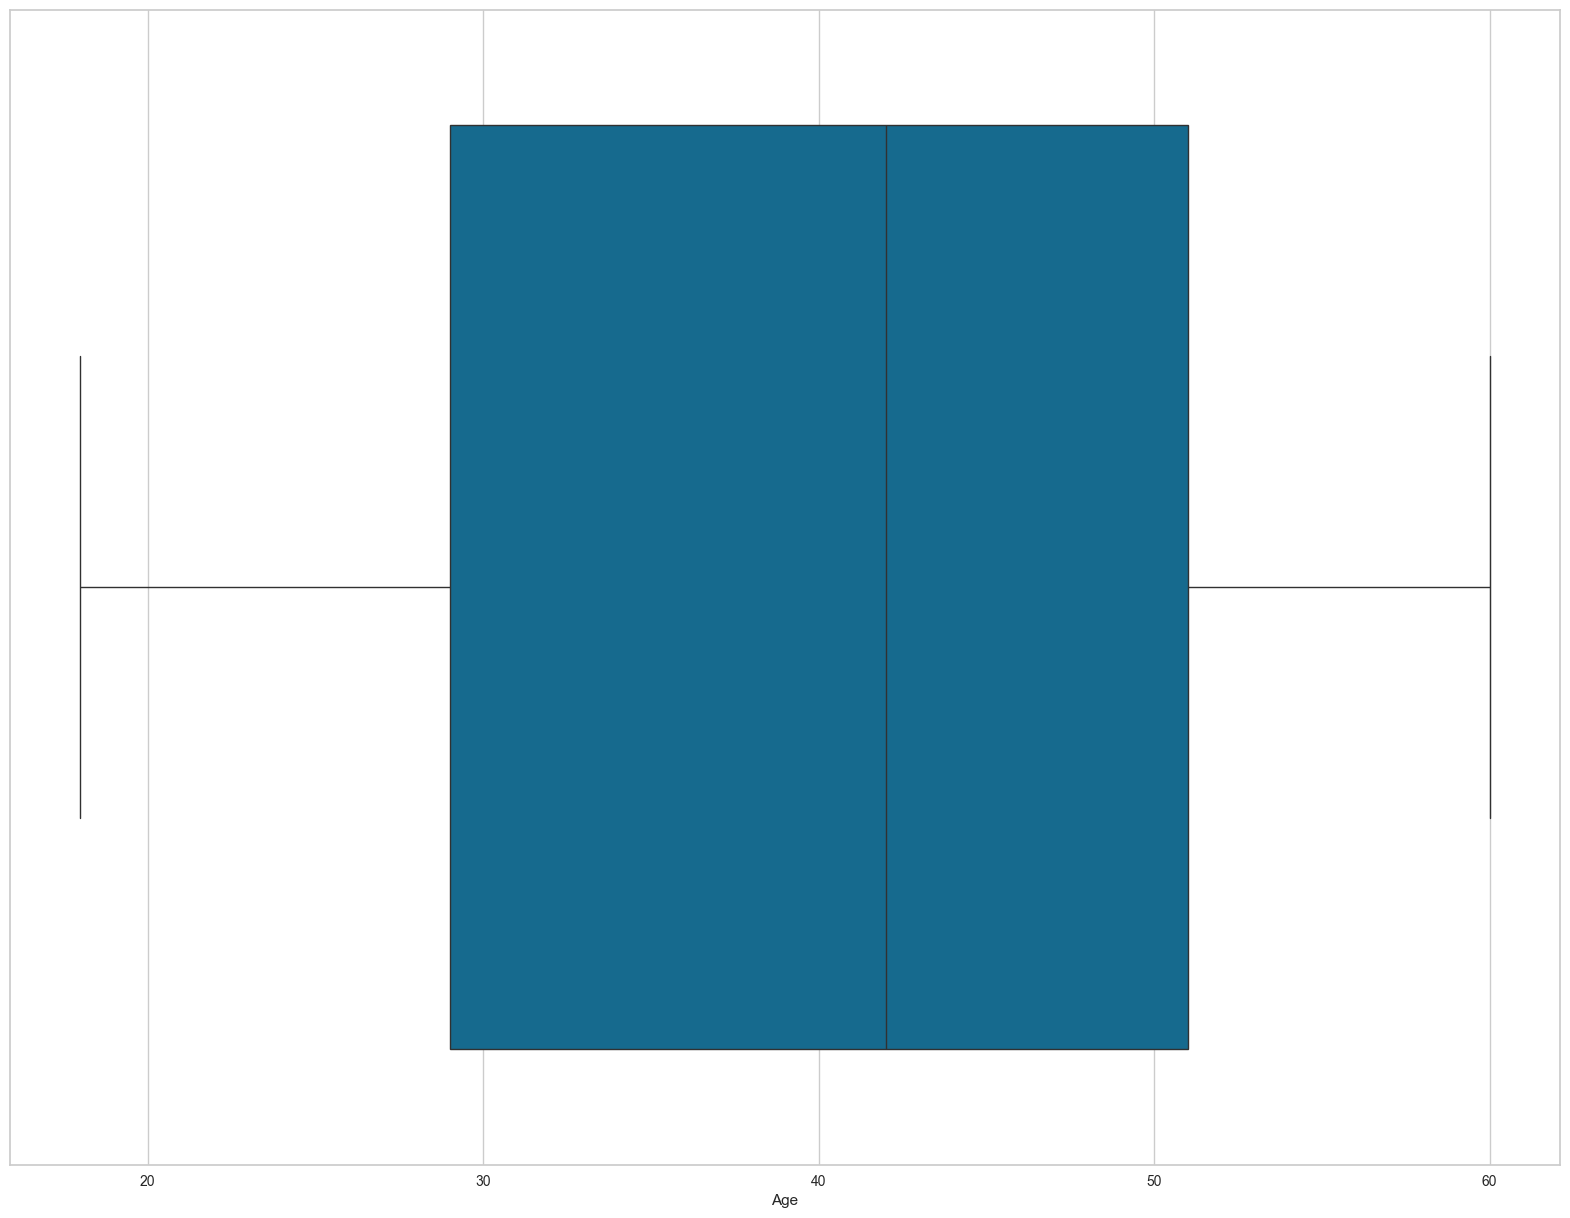

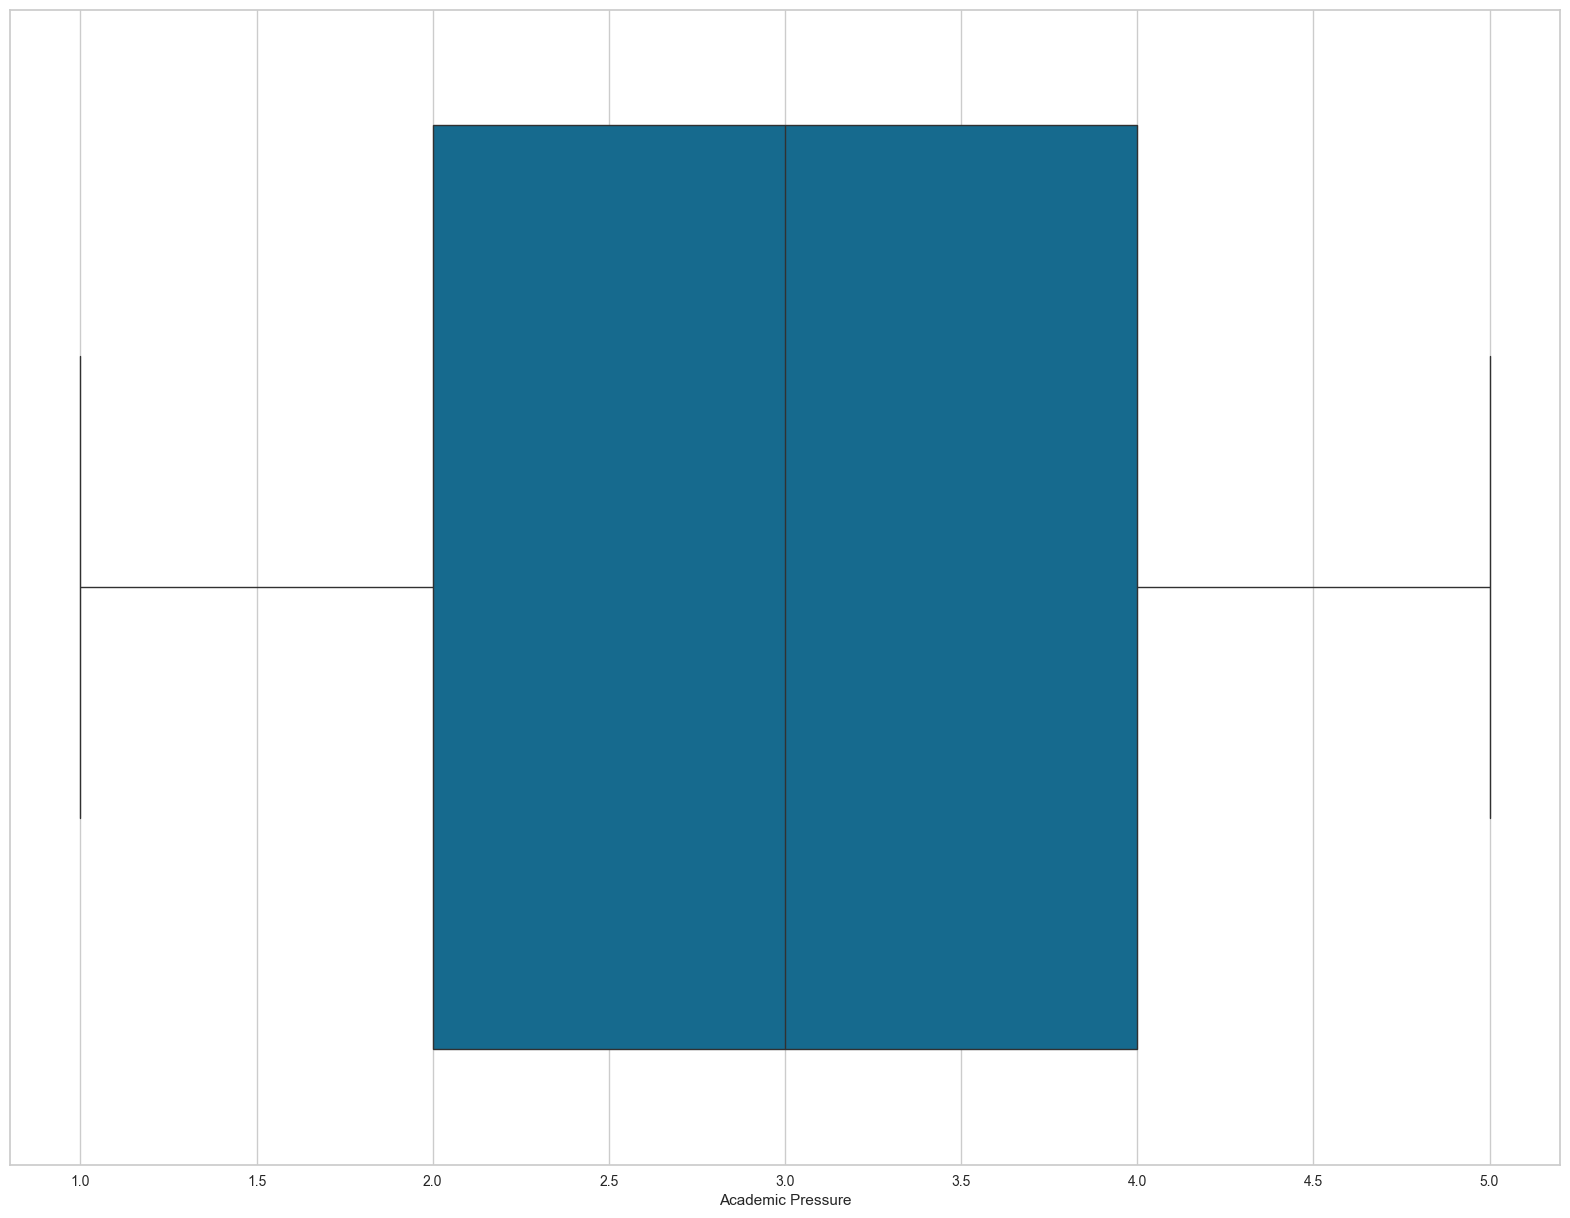

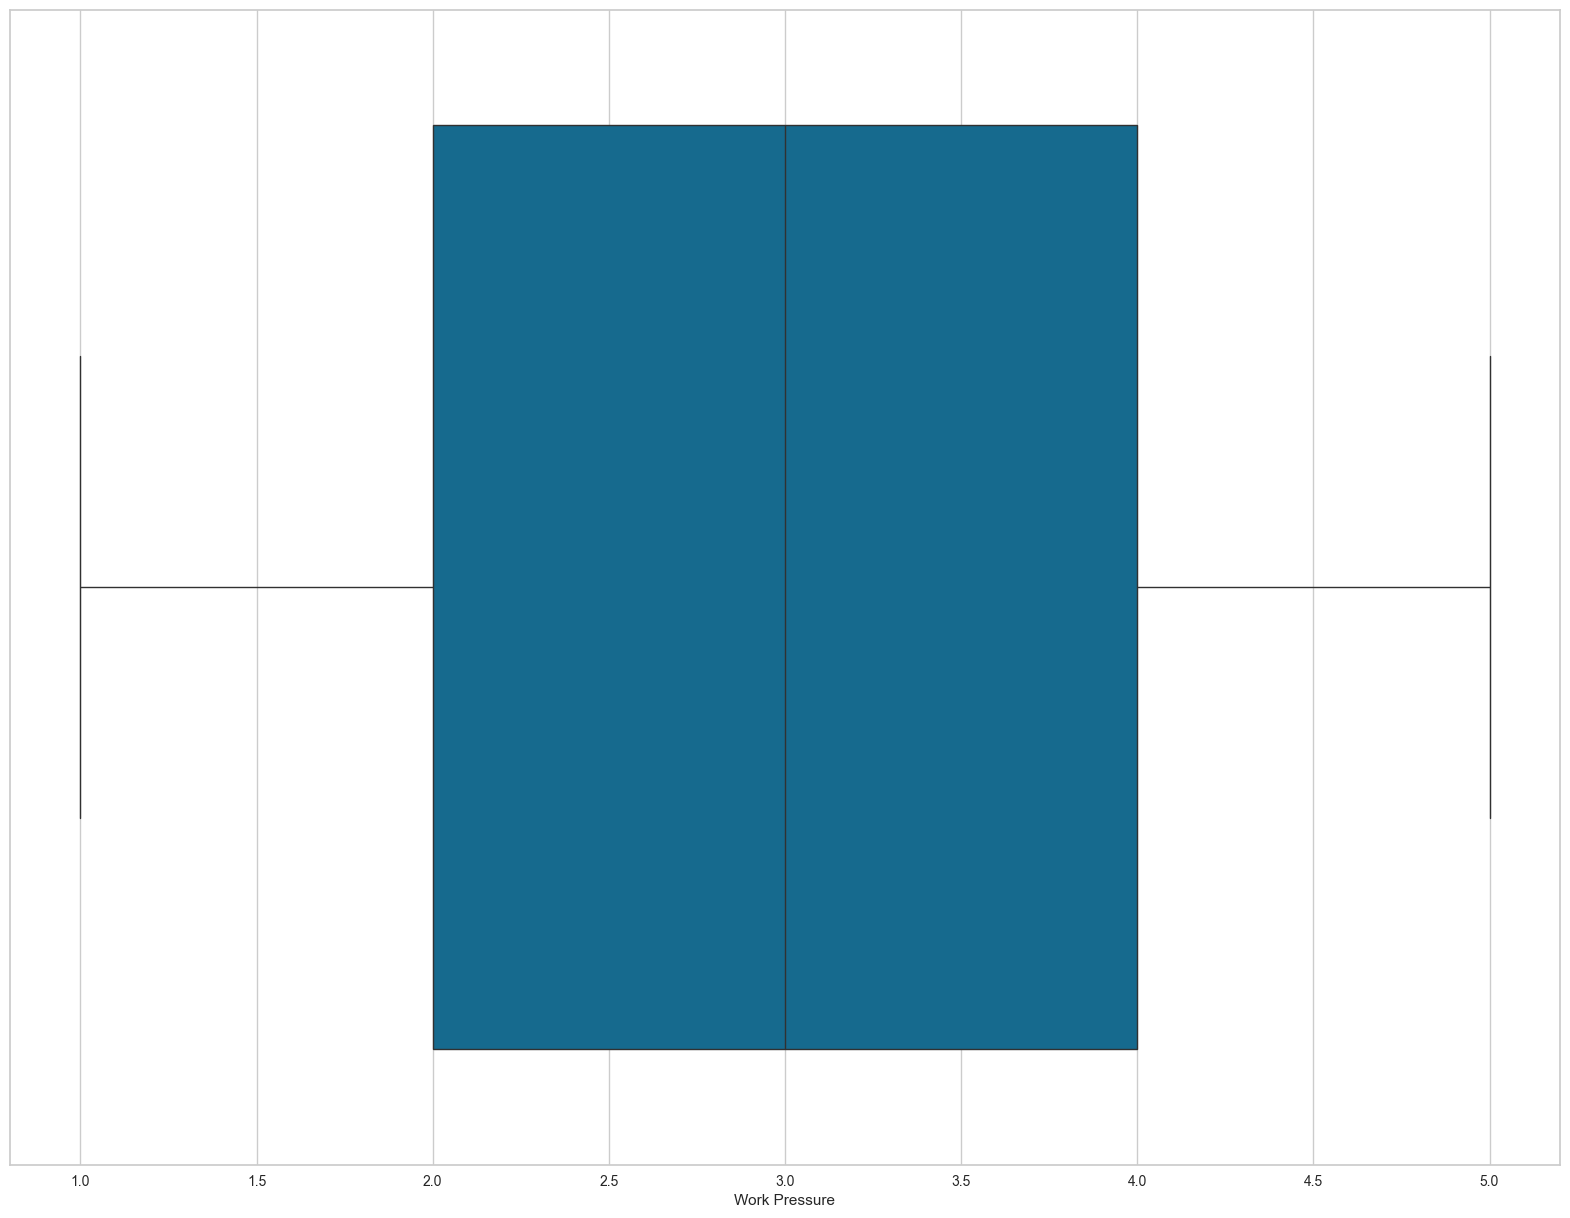

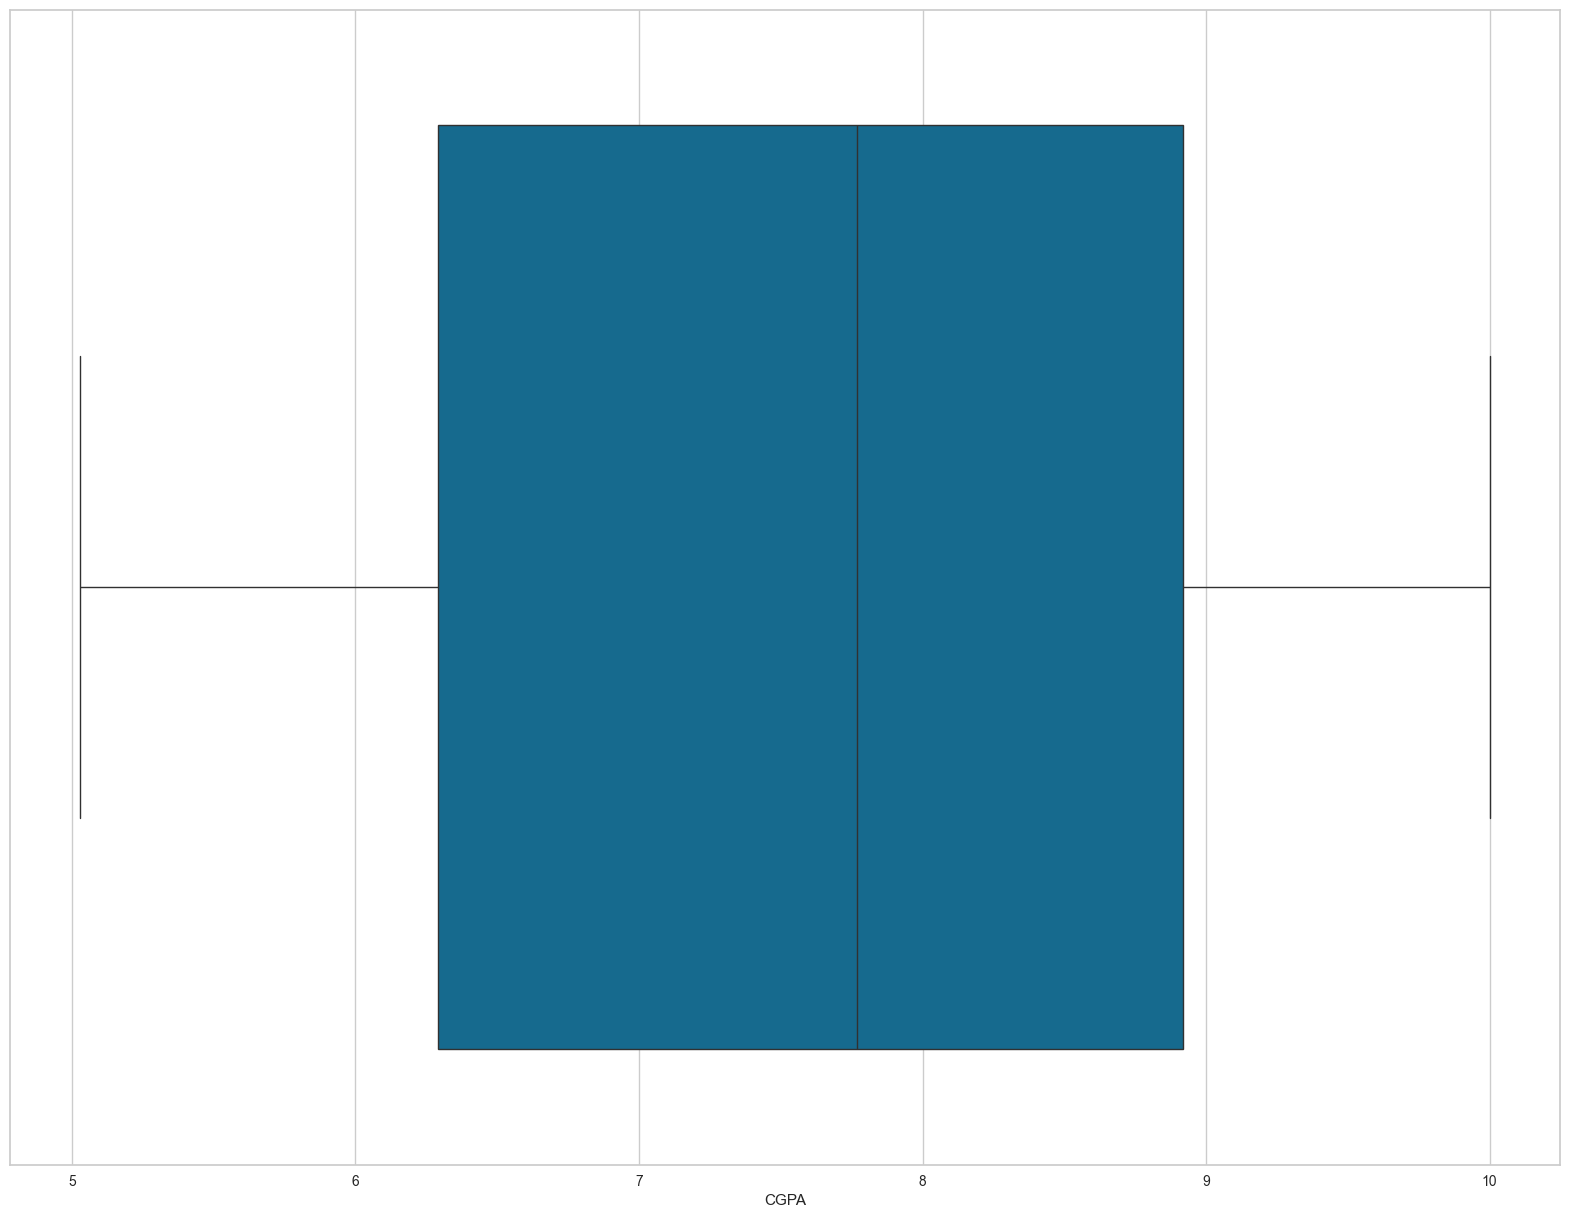

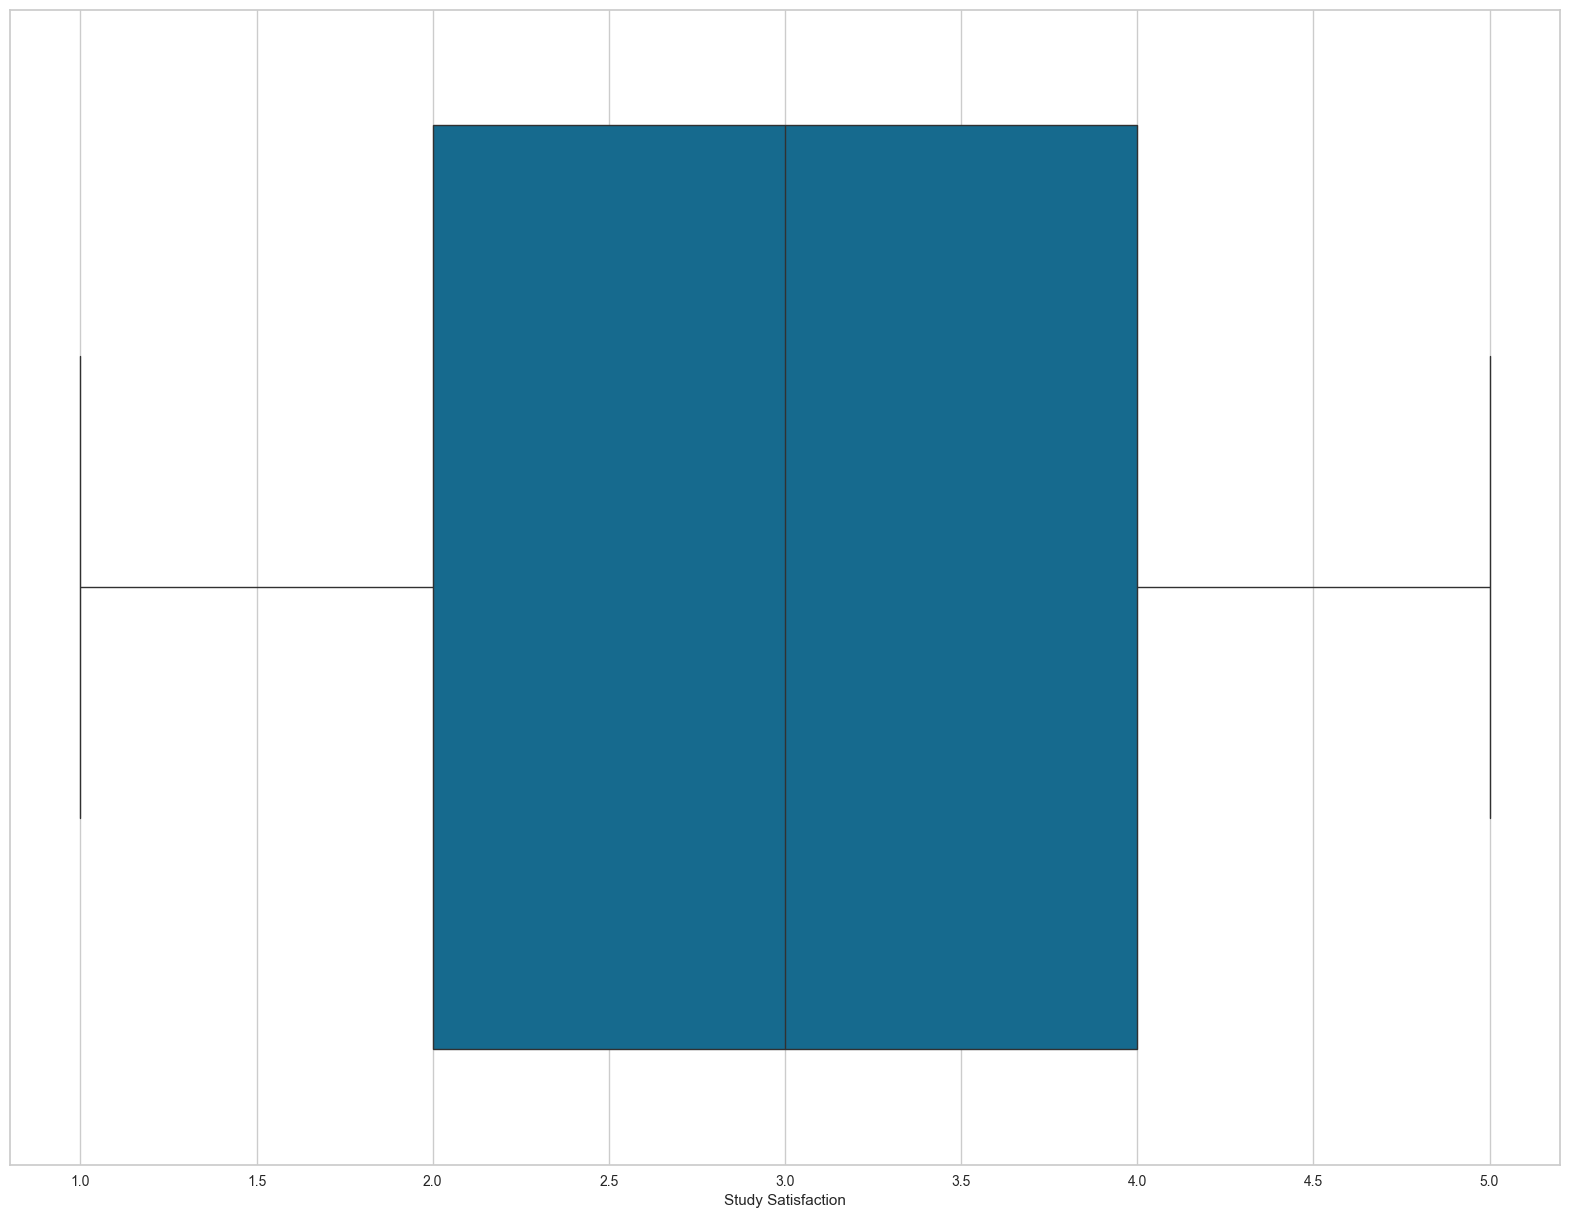

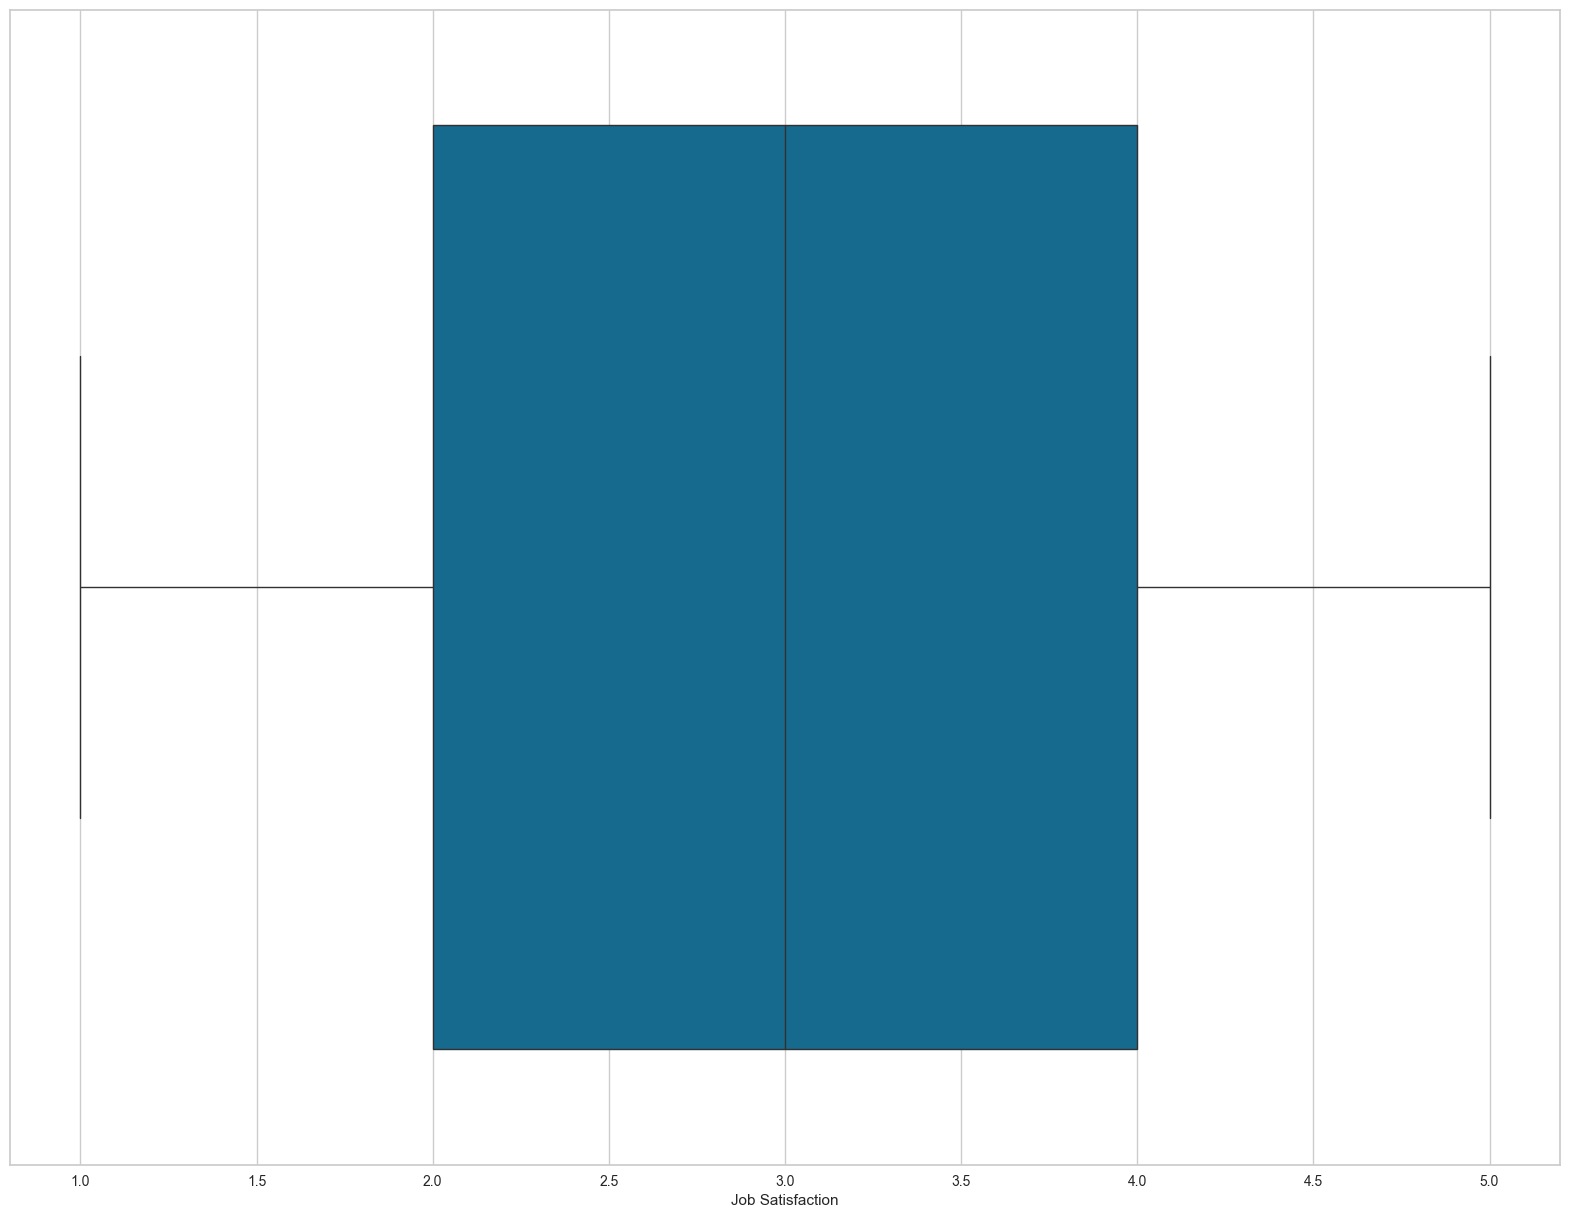

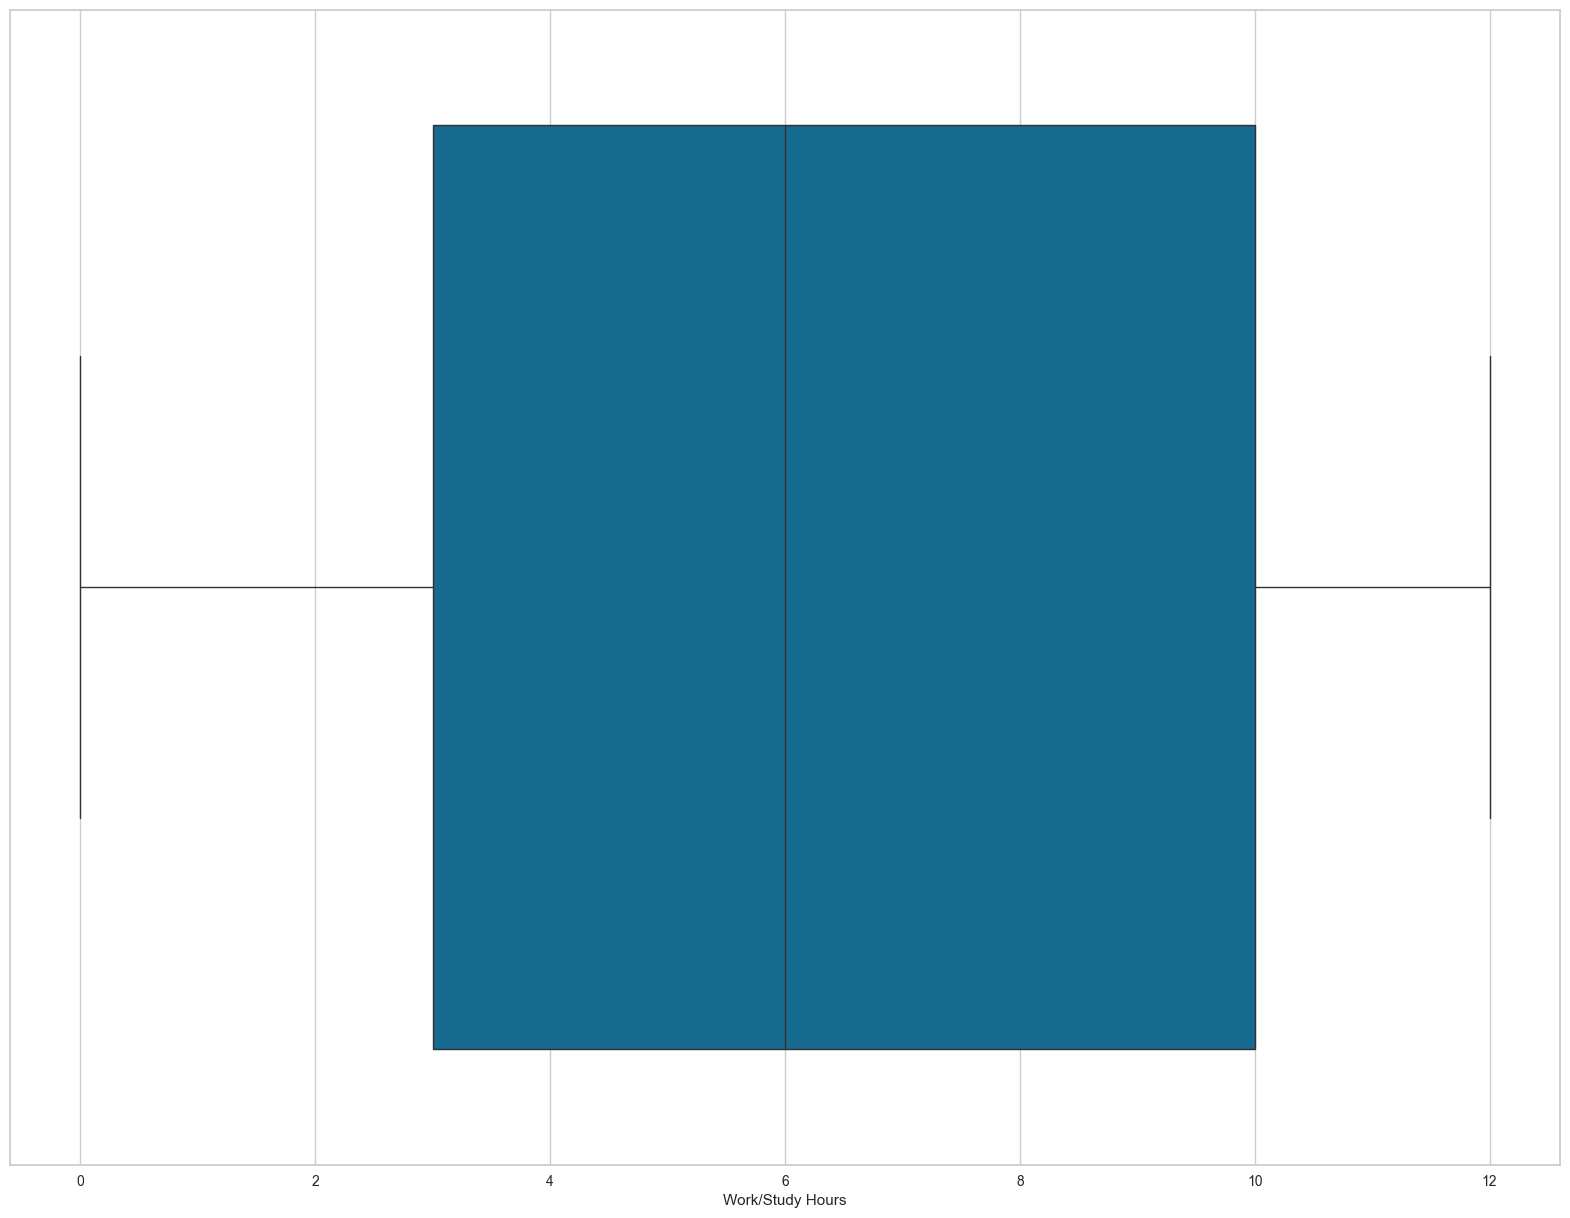

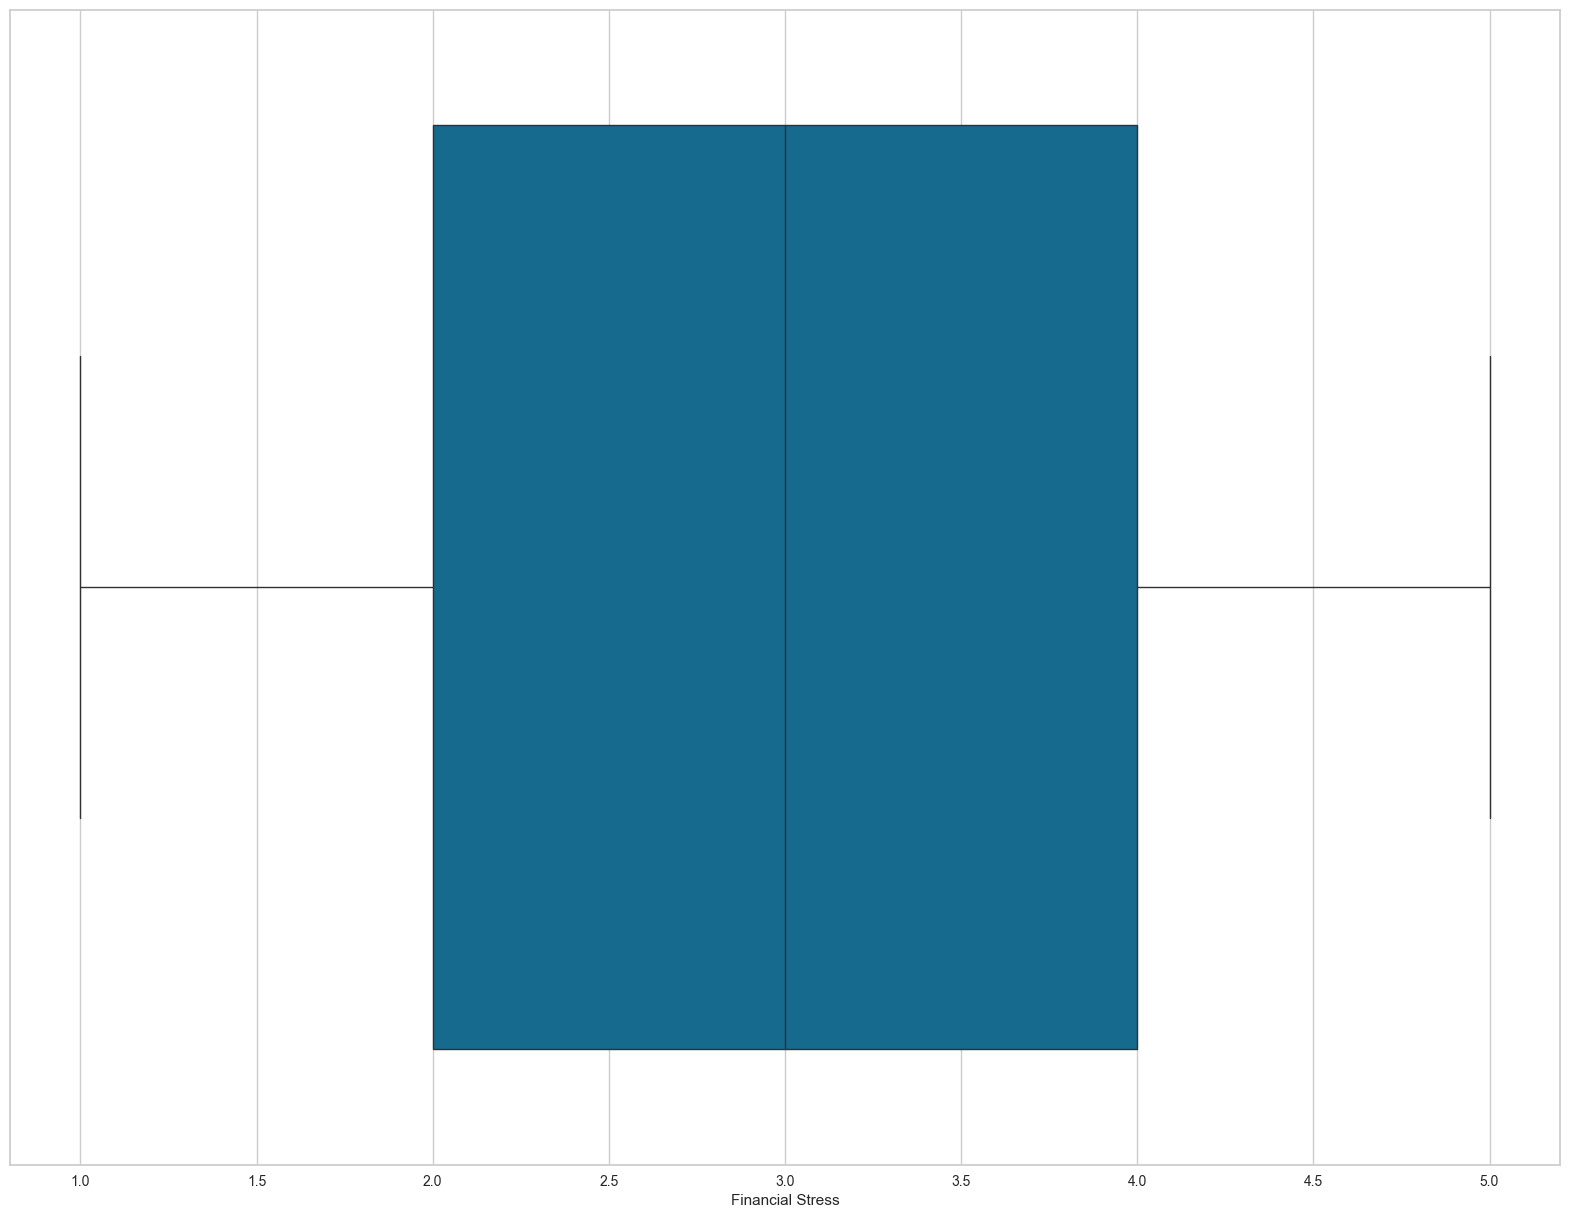

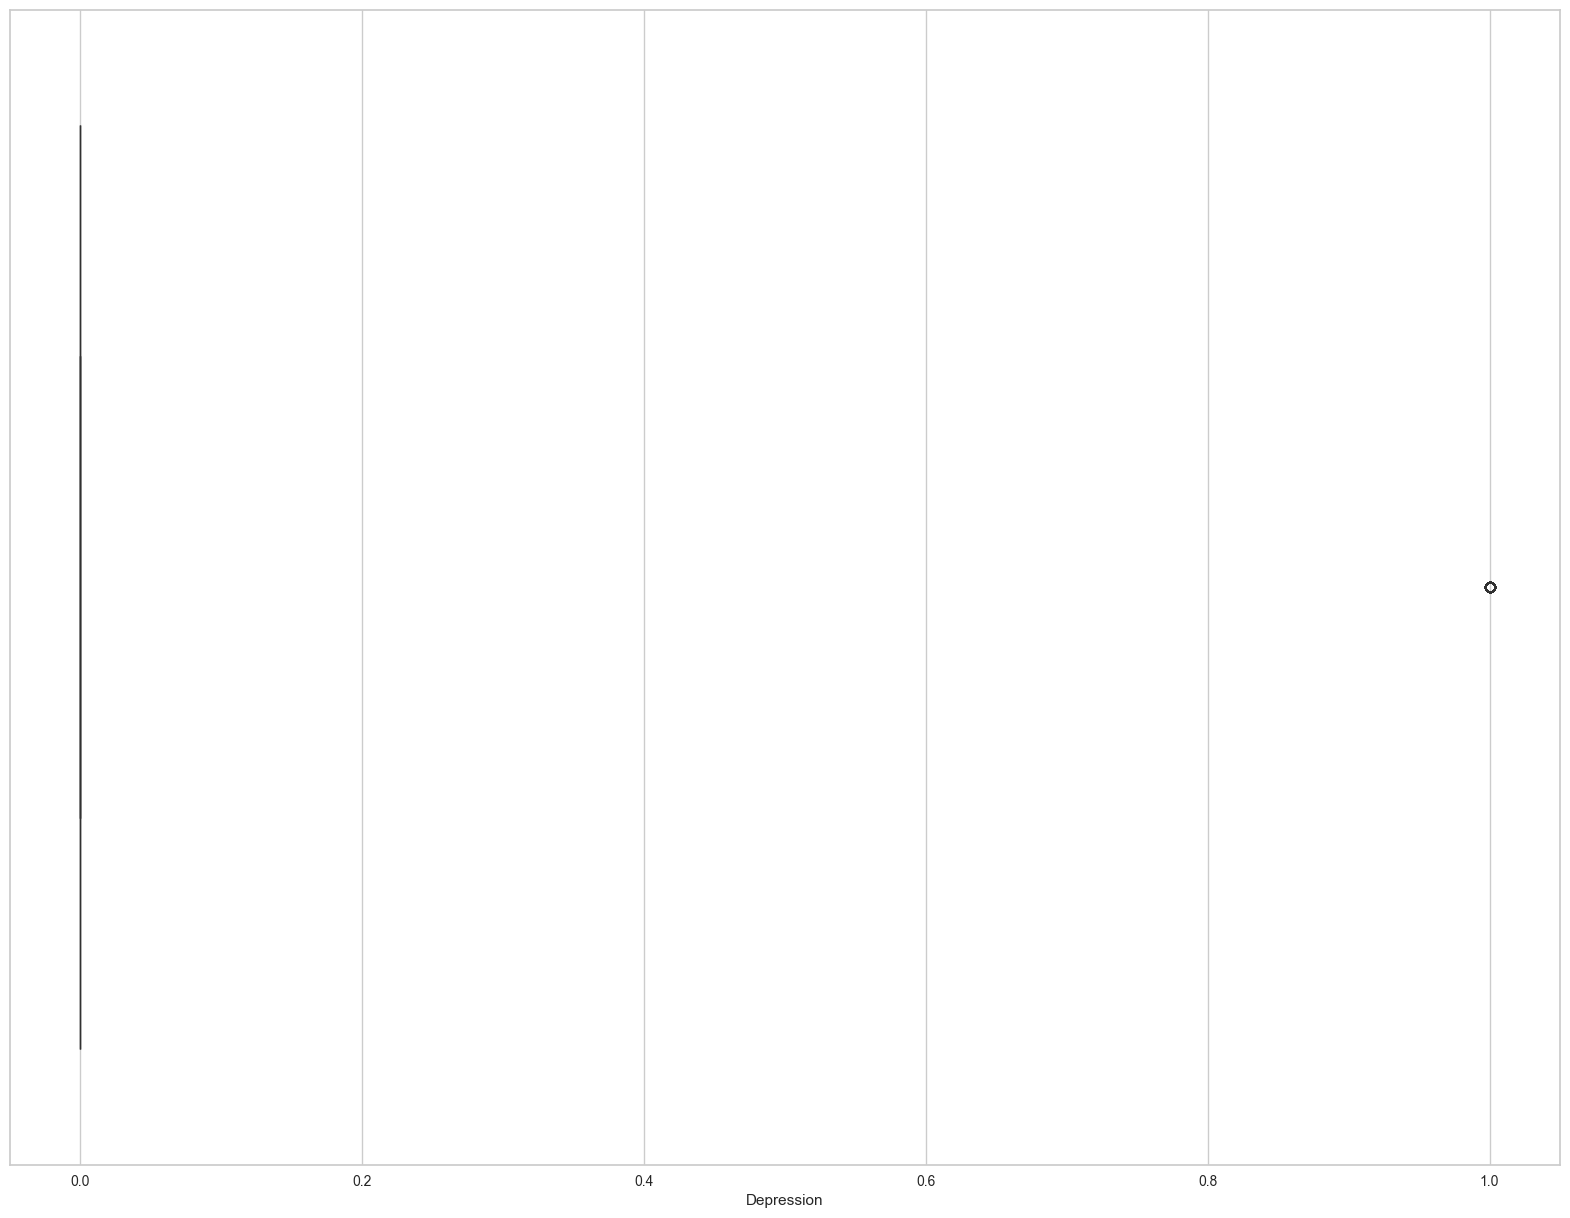

In [11]:
for coluna in df.drop(columns=['id', 'Name']).select_dtypes(include='number').columns:
    plt.figure(figsize=(20,15))
    sns.boxplot(x=df[coluna])
    plt.show()

### Analisando Correlação Entre Variáveis

<Axes: >

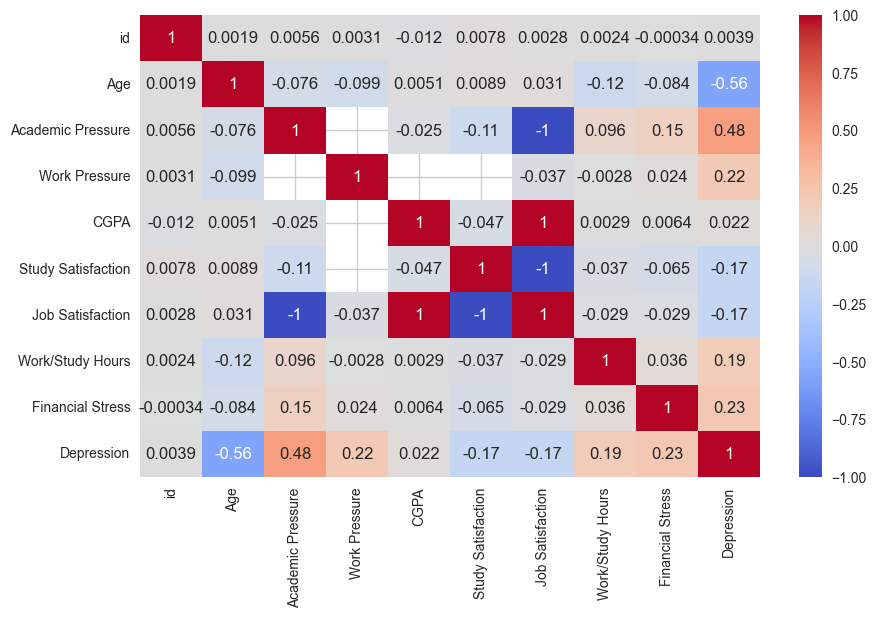

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [13]:
grupos = [df['Depression'][df['Working Professional or Student'] == cat] for cat in df['Working Professional or Student'].unique()]

stat, p_value = f_oneway(*grupos)

print(f"Estatística F: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estatística F: 52362.2345
Valor p: 0.0000


In [14]:
grupos = [df['Depression'][df['Gender'] == cat] for cat in df['Gender'].unique()]

stat, p_value = f_oneway(*grupos)

print(f"Estatística F: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estatística F: 9.3324
Valor p: 0.0023


In [15]:
grupos = [df['Depression'][df['Sleep Duration'] == cat] for cat in df['Sleep Duration'].unique()]

stat, p_value = f_oneway(*grupos)

print(f"Estatística F: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estatística F: 35.4527
Valor p: 0.0000


In [16]:
df1 = df.dropna(subset='Profession')

grupos = [df1.loc[df1['Profession'] == cat, 'Depression'] for cat in df1['Profession'].unique() if not df1.loc[df1['Profession'] == cat, 'Depression'].empty]

if len(grupos) < 2:
    print("Erro: Existem menos de dois grupos com dados válidos. ANOVA não pode ser executado.")
else:
    stat, p_value = f_oneway(*grupos)
    print(f"Estatística F: {stat:.4f}")
    print(f"Valor p: {p_value:.4f}")

Estatística F: 22.8985
Valor p: 0.0000


# 2. Justifique os principais pontos escolhidos para a solução do problema e descreva sua relevância. 

# 3. Criando o modelo

In [17]:
modelo = setup(data=df, target='Depression',
              ignore_features=['id', 'Name', 'Gender', 'Age', 'City', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Family History of Mental Illness', 'Profession'],
              remove_outliers=True,
              pca=True,
              imputation_type='iterative',
              fix_imbalance=True,
              remove_multicollinearity=True,
              session_id=42)

,Description,Value
0,Session id,42
1,Target,Depression
2,Target type,Binary
3,Original data shape,"(140700, 20)"
4,Transformed data shape,"(198160, 5)"
5,Transformed train set shape,"(155950, 5)"
6,Transformed test set shape,"(42210, 5)"
7,Ignore features,14
8,Numeric features,3
9,Categorical features,2


In [18]:
best = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8156,0.8858,0.7888,0.4954,0.6086,0.4961,0.5191
1,0.8240,0.8929,0.8022,0.5101,0.6237,0.5162,0.5387
2,0.8226,0.8894,0.7860,0.5078,0.6170,0.5084,0.5290
3,0.8306,0.8930,0.7911,0.5225,0.6293,0.5255,0.5444
4,0.8207,0.8906,0.8061,0.5042,0.6204,0.5110,0.5351
5,0.8232,0.8918,0.8050,0.5086,0.6234,0.5155,0.5387
6,0.8205,0.8869,0.7804,0.5040,0.6125,0.5026,0.5229
7,0.8291,0.8972,0.7831,0.5197,0.6247,0.5199,0.5382
8,0.8217,0.8930,0.8038,0.5058,0.6209,0.5121,0.5356


In [21]:
custom_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
tuned_model = tune_model(best, custom_grid=custom_grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8163,0.8863,0.7905,0.4967,0.6100,0.4980,0.5210
1,0.8261,0.8939,0.8017,0.5138,0.6262,0.5199,0.5417
2,0.8219,0.8895,0.7838,0.5065,0.6154,0.5064,0.5268
3,0.8292,0.8932,0.7916,0.5198,0.6275,0.5229,0.5423
4,0.8220,0.8911,0.8039,0.5065,0.6215,0.5128,0.5362
5,0.8282,0.8916,0.7966,0.5178,0.6276,0.5224,0.5429
6,0.8214,0.8868,0.7804,0.5056,0.6137,0.5043,0.5244
7,0.8417,0.8981,0.7742,0.5453,0.6399,0.5423,0.5560
8,0.8239,0.8931,0.8016,0.5098,0.6232,0.5157,0.5381


Fitting 10 folds for each of 9 candidates, totalling 90 fits


# Avalindo o modolo

In [22]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

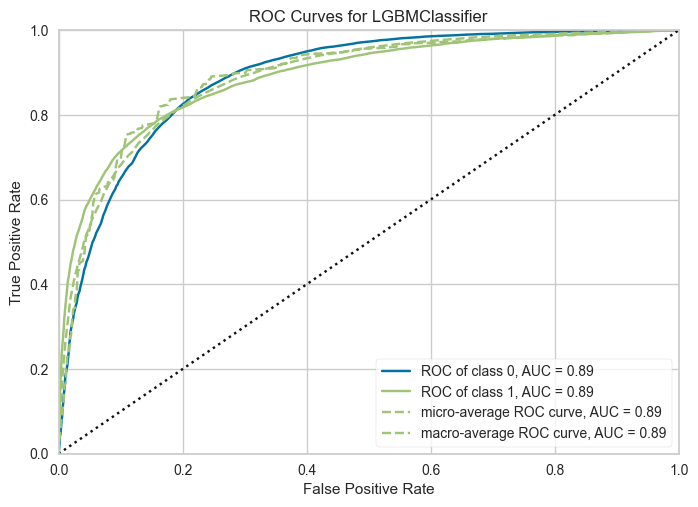

In [23]:
plot_model(tuned_model, plot='auc')

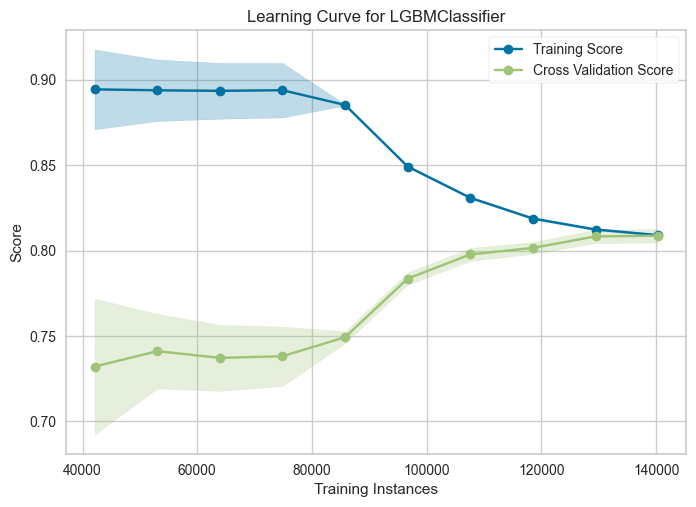

In [24]:
plot_model(tuned_model, plot='learning')

In [25]:
test = pd.read_csv('./Input/test.csv')

In [26]:
resultado = predict_model(tuned_model, data=test)

In [27]:
resultado

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,prediction_label,prediction_score
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,...,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,0,0.8448
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,...,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,0,0.7723
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,...,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,0,0.6111
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,...,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,1,0.9670
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,...,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,1,0.5720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,...,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,0,0.8372
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,...,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,0,0.5242
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,...,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,0,0.7610
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,...,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,1,0.5528


In [36]:
df_final = resultado[['id', 'prediction_label']].rename(columns={'prediction_label': 'Depression'})

In [37]:
df_final

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,1
...,...,...
93795,234495,0
93796,234496,0
93797,234497,0
93798,234498,1


In [38]:
save_model(tuned_model, 'modelo_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('iterative_imputer',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=IterativeImputer(add_indicator=False,
                                                                  cat_estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                               class_weight=None,
                                                                                               colsample_bytree=1.0,
                                                                                               importance_type='split',
                                                                                               learning_rate=0.1,
                                                                                               max_depth=-1,
                                                                              